# Exploratory Data Analysis of the Dataset | Part 02

## Master's Dissertation

### Diogo Miguel Alvito | 89576

## Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

## Import Subrelevant Libraries

In [2]:
import os
import os.path
import json
from pathlib import Path
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("omw-1.4")
from IPython.display import display_html
from scipy import stats
# Gensim
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

# spacy for lemmatization

import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from pprint import pprint
import matplotlib.colors as mcolors

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_lda.py:28:

# ___________________________________________________________________________________________________________________

## Trying to correlate points to zones

### Importing Datasets

In [3]:
anomaly_ellipses = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\anomaly_location_ellipses.csv')
fixations = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\fixations.csv')
timestamp_transcriptions = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\REFLACX\P300R081391\timestamps_transcription.csv')

In [4]:
cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')

### Importing Image

In [5]:
from PIL import Image

im = Image.open(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')
width, height = im.size
print(width)
print(height)

2544
3056


In [6]:
data = image.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10002428\CXR-JPG\s59258773\fa771fa1-d9571d07-bff8f655-327734a7-6e10b29d.jpg')

In [7]:
x_coordinates = fixations['x_position'].tolist()
y_coordinates = fixations['y_position'].tolist()

In [8]:
x1 = anomaly_ellipses['xmin'].tolist()
x2 = anomaly_ellipses['xmax'].tolist()
y1 = anomaly_ellipses['ymin'].tolist()
y2 = anomaly_ellipses['ymax'].tolist()
len(x1)

4

### Plotting CXR

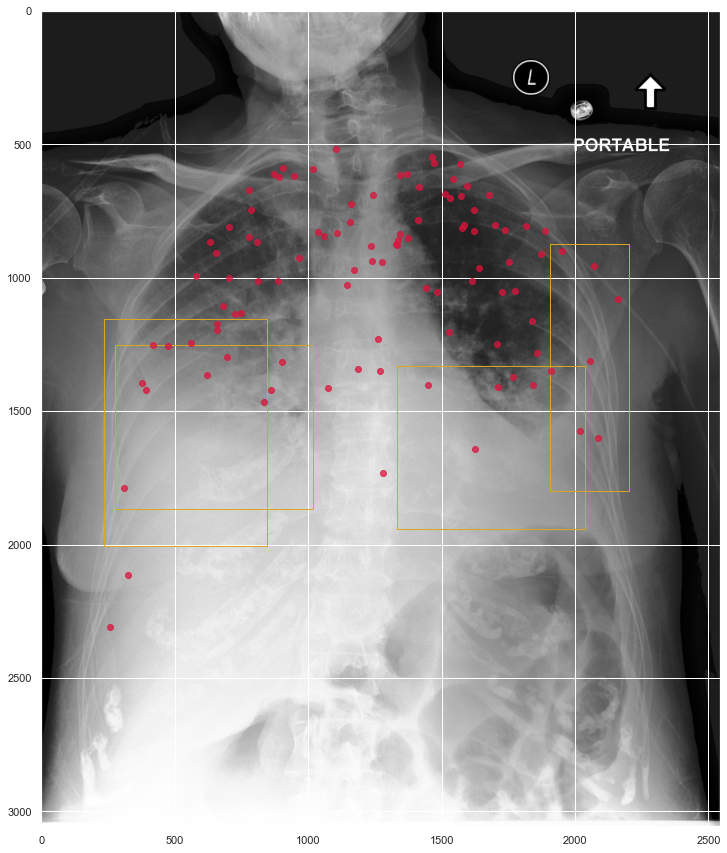

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(15,15))
cols = ['red', 'blue', 'green', 'purple', 'black', 'white', 'orange', 'yellow', 'brown', 'aqua', 'beige', 'crimson', 'cyan', 'fuchsia', 'goldenrod', 'indigo', 'pink']
cols = ['goldenrod', 'goldenrod', 'goldenrod', 'goldenrod']
for i in range(len(x1)):
    plt.plot([x1[i], x2[i]], [y1[i], y1[i]], color=cols[i], linewidth=1)
    plt.plot([x2[i], x2[i]], [y1[i], y2[i]], color=cols[i], linewidth=1)
    plt.plot([x2[i], x1[i]], [y2[i], y2[i]], color=cols[i], linewidth=1)
    plt.plot([x1[i], x1[i]], [y2[i], y1[i]], color=cols[i], linewidth=1)
    #plt.text(x1[i], y1[i], 'Ellipses', color='white', fontsize=15)
for i in range(len(x_coordinates)):
    plt.plot(x_coordinates[i], y_coordinates[i], marker='o', color='crimson', alpha=0.75)
    #plt.text(x[i]-30, y[i]-30, i, color='white', fontsize=14)
plt.imshow(data, cmap='gray')
plt.show()
plt.savefig('bounding_boxes.png')

## Assigning Bounding Boxes into each fixation point

### Assignment

In [10]:
fixations_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\fixations.csv')
bb_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\bounding_boxes.csv')

In [11]:
fixations_bb_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\fixations.csv')

In [12]:
def sorter(column):
    reorder = ['left lung', 'right lung', 'left upper lung zone', 'right upper lung zone', 'left mid lung zone', 'right mid lung zone', 'left lower lung zone', 'right lower lung zone', 'trachea', 'upper mediastinum', 'right hilar structures', 'left hilar structures', 'right costophrenic angle', 'left costophrenic angle', 'right clavicle', 'left clavicle', 'cardiac silhouette']
    cat = pd.Categorical(column, categories=reorder, ordered=True)
    return pd.Series(cat)

fixations_bb_df['Bounding Box'] = 'Area out of Bounding Boxes'
fixations_bb_df['Fixation Point Number'] = 0

for i in range(len(fixations_bb_df)):
    query_value = fixations_bb_df['DICOM_ID'][i]
    aux_df = bb_df.loc[bb_df['dicom_id'] == query_value]
    aux_df = aux_df.sort_values(by='bbox_name', key=sorter)
    aux_df2 = fixations_bb_df.loc[fixations_bb_df['DICOM_ID'] == query_value]
    aux_df2.reset_index(inplace=True, drop=True)
    for k in range(len(aux_df2)):
        if fixations_bb_df['Time (in secs)'][i] == aux_df2['Time (in secs)'][k]:
            fixations_bb_df['Fixation Point Number'][i] = int(k+1)
    if len(aux_df) > 0:
        for j in range(len(aux_df)):
            if fixations_bb_df.iloc[i,36] >= aux_df.iloc[j, 3]:
                if fixations_bb_df.iloc[i,36] <= aux_df.iloc[j, 4]:
                    if fixations_bb_df.iloc[i,37] >= aux_df.iloc[j, 5]:
                        if fixations_bb_df.iloc[i,37] <= aux_df.iloc[j, 6]:
                            fixations_bb_df['Bounding Box'][i] = aux_df.iloc[j, 2]
    print('Progress -------> ', i+1, '/', len(fixations_bb_df))

writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Fixations_bb_df.xlsx', engine='xlsxwriter')
fixations_bb_df.to_excel(writer, sheet_name='Fixation Points with bb')
writer.save()

In [13]:
output_fixations_bb_df = pd.read_excel(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Fixations_bb_df.xlsx')

In [14]:
output_fixations_bb_df.head(1)

Unnamed: 0.1  Unnamed: 0  SESSION_ID  MEDIA_ID  \
0             0           0           1         0   

                                       DICOM_ID  CNT  Time (in secs)  \
0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b   45         0.72363   

   TIMETICK(f=10000000)    FPOGX    FPOGY    FPOGS    FPOGD  FPOGID  FPOGV  \
0          696216388878  0.45224  0.33879  0.01794  0.70569       2      1   

     BPOGX    BPOGY  BPOGV     LPCX    LPCY       LPD      LPS  LPV    RPCX  \
0  0.46134  0.26619      1  0.37859  0.5943  18.33718  1.05276    1  0.6379   

      RPCY       RPD      RPS  RPV  BKID  BKDUR  BKPMIN     LPMM  LPMMV  \
0  0.59798  18.19434  1.06068    1     0    0.0      20  3.50648      1   

      RPMM  RPMMV  SACCADE_MAG  SACCADE_DIR  VID_FRAME  X_ORIGINAL  \
0  3.56681      1          0.0          0.0        0.0         998   

   Y_ORIGINAL       Bounding Box  Fixation Point Number  
0        1035  upper mediastinum                      1

In [15]:
len(output_fixations_bb_df)

48959

### Counting all Fixation Points Bounding Boxes

In [16]:
output_fixations_bb_df['Count'] = 1
Bounding_Boxes_Count = pd.DataFrame(output_fixations_bb_df.groupby('Bounding Box')['Count'].count())
Bounding_Boxes_Count

Count
Bounding Box                     
Area out of Bounding Boxes   3361
cardiac silhouette           8222
left clavicle                2769
left costophrenic angle       330
left hilar structures        2845
left lower lung zone         2795
left lung                     354
left mid lung zone           2277
left upper lung zone         2106
right clavicle               3021
right costophrenic angle      243
right hilar structures       3936
right lower lung zone        4138
right lung                    366
right mid lung zone          2848
right upper lung zone        2366
trachea                       973
upper mediastinum            6009

#### First 5 fixation points most common locations

In [17]:
aux_fp1_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = output_fixations_bb_df.loc[output_fixations_bb_df['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

Fixation Point #01 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 Area out of Bounding Boxes 
 242 
 
 
 upper mediastinum 
 179 
 
 
 cardiac silhouette 
 157 
 
 
 right clavicle 
 96 
 
 
 left clavicle 
 90 
 
 
 

 
 Fixation Point #02 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 338 
 
 
 cardiac silhouette 
 192 
 
 
 right hilar structures 
 182 
 
 
 left hilar structures 
 114 
 
 
 Area out of Bounding Boxes 
 88 
 
 
 

 
 Fixation Point #03 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 371 
 
 
 upper mediastinum 
 278 
 
 
 right hilar structures 
 156 
 
 
 left hilar structures 
 120 
 
 
 Area out of Bounding Boxes 
 63 
 
 
 

 
 Fixation Point #04 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 437 
 
 
 upper mediastinum 
 202 
 
 
 left hilar structures 
 123 
 
 
 right hilar structures 
 106 
 
 
 right lower lung zone 
 49 
 
 
 

 
 Fixation Point #05 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 328 
 
 
 upper mediastinum 
 246 
 
 
 left hilar structures 
 137 
 
 
 right hilar structures 
 68 
 
 
 right lower lung zone 
 62

#### Filtering this maps by outputs

In [18]:
outputs_df = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\speadsheets\EyeGaze\master_sheet_with_updated_stayId.csv')

In [19]:
normal_df = outputs_df.loc[outputs_df['Normal'] == 1]
chf_df = outputs_df.loc[outputs_df['CHF'] == 1]
pneumonia_df = outputs_df.loc[outputs_df['pneumonia'] == 1]

In [20]:
print('Output                      ||  Number of cases')
print('===============================================')
print('Normal                      ||      ', len(normal_df))
print('Congestive Heart Failure    ||      ', len(chf_df))
print('Pneumonia                   ||      ', len(pneumonia_df))

Output                      ||  Number of cases
Normal                      ||       360
Congestive Heart Failure    ||       363
Pneumonia                   ||       360


##### Getting Dicoms Id's for each output

In [21]:
normal_dicom_ids = normal_df['dicom_id'].tolist()
chf_dicom_ids = chf_df['dicom_id'].tolist()
pneumonia_dicom_ids = pneumonia_df['dicom_id'].tolist()

##### Bounding Boxes in Normal Pathology

In [22]:
for i in range(len(normal_dicom_ids)):
    if i == 0:
        fp_normal = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == normal_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == normal_dicom_ids[i]]
        fp_normal = pd.concat([fp_normal, aux_df], axis=0)

In [23]:
aux_fp1_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_normal.loc[fp_normal['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

Fixation Point #01 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 Area out of Bounding Boxes 
 58 
 
 
 upper mediastinum 
 57 
 
 
 cardiac silhouette 
 44 
 
 
 right clavicle 
 36 
 
 
 left clavicle 
 35 
 
 
 

 
 Fixation Point #02 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 124 
 
 
 right hilar structures 
 70 
 
 
 cardiac silhouette 
 50 
 
 
 left hilar structures 
 27 
 
 
 right upper lung zone 
 19 
 
 
 

 
 Fixation Point #03 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 110 
 
 
 cardiac silhouette 
 104 
 
 
 right hilar structures 
 57 
 
 
 left hilar structures 
 34 
 
 
 right upper lung zone 
 15 
 
 
 

 
 Fixation Point #04 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 120 
 
 
 upper mediastinum 
 83 
 
 
 right hilar structures 
 53 
 
 
 left hilar structures 
 39 
 
 
 right lower lung zone 
 16 
 
 
 

 
 Fixation Point #05 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 111 
 
 
 cardiac silhouette 
 88 
 
 
 left hilar structures 
 35 
 
 
 right lower lung zone 
 29 
 
 
 right hilar structures 
 27

##### Bounding Boxes in Congestive Heart Failure Pathology

In [24]:
for i in range(len(chf_dicom_ids)):
    if i == 0:
        fp_chf = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == chf_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == chf_dicom_ids[i]]
        fp_chf = pd.concat([fp_chf, aux_df], axis=0)

In [25]:
aux_fp1_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_chf.loc[fp_chf['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

Fixation Point #01 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 66 
 
 
 Area out of Bounding Boxes 
 65 
 
 
 upper mediastinum 
 62 
 
 
 right clavicle 
 33 
 
 
 left clavicle 
 26 
 
 
 

 
 Fixation Point #02 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 113 
 
 
 cardiac silhouette 
 73 
 
 
 right hilar structures 
 51 
 
 
 left hilar structures 
 47 
 
 
 right clavicle 
 21 
 
 
 

 
 Fixation Point #03 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 138 
 
 
 upper mediastinum 
 96 
 
 
 left hilar structures 
 54 
 
 
 right hilar structures 
 40 
 
 
 right lower lung zone 
 7 
 
 
 

 
 Fixation Point #04 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 185 
 
 
 upper mediastinum 
 57 
 
 
 left hilar structures 
 45 
 
 
 right hilar structures 
 19 
 
 
 right lower lung zone 
 16 
 
 
 

 
 Fixation Point #05 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 141 
 
 
 left hilar structures 
 69 
 
 
 upper mediastinum 
 48 
 
 
 right lower lung zone 
 18 
 
 
 right hilar structures 
 17

##### Bounding Boxes in Pneumonia Pathology

In [26]:
for i in range(len(pneumonia_dicom_ids)):
    if i == 0:
        fp_pneumonia = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == pneumonia_dicom_ids[0]]
    else:
        aux_df = output_fixations_bb_df.loc[output_fixations_bb_df['DICOM_ID'] == pneumonia_dicom_ids[i]]
        fp_pneumonia = pd.concat([fp_pneumonia, aux_df], axis=0)

In [27]:
aux_fp1_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 1]
aux_fp1_df_count = pd.DataFrame(aux_fp1_df.groupby('Bounding Box')['Count'].count())
aux_fp1_df_count = aux_fp1_df_count.sort_values(by='Count', ascending=False)

aux_fp2_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 2]
aux_fp2_df_count = pd.DataFrame(aux_fp2_df.groupby('Bounding Box')['Count'].count())
aux_fp2_df_count = aux_fp2_df_count.sort_values(by='Count', ascending=False)

aux_fp3_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 3]
aux_fp3_df_count = pd.DataFrame(aux_fp3_df.groupby('Bounding Box')['Count'].count())
aux_fp3_df_count = aux_fp3_df_count.sort_values(by='Count', ascending=False)

aux_fp4_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 4]
aux_fp4_df_count = pd.DataFrame(aux_fp4_df.groupby('Bounding Box')['Count'].count())
aux_fp4_df_count = aux_fp4_df_count.sort_values(by='Count', ascending=False)

aux_fp5_df = fp_pneumonia.loc[fp_pneumonia['Fixation Point Number'] == 5]
aux_fp5_df_count = pd.DataFrame(aux_fp5_df.groupby('Bounding Box')['Count'].count())
aux_fp5_df_count = aux_fp5_df_count.sort_values(by='Count', ascending=False)

df1_styler = aux_fp1_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #01')
df2_styler = aux_fp2_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #02')
df3_styler = aux_fp3_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #03')
df4_styler = aux_fp4_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #04')
df5_styler = aux_fp5_df_count.head(5).style.set_table_attributes("style='display:inline'").set_caption('Fixation Point #05')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_()+df5_styler._repr_html_(), raw=True)

Fixation Point #01 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 Area out of Bounding Boxes 
 60 
 
 
 upper mediastinum 
 60 
 
 
 cardiac silhouette 
 47 
 
 
 left clavicle 
 29 
 
 
 right clavicle 
 27 
 
 
 

 
 Fixation Point #02 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 101 
 
 
 cardiac silhouette 
 69 
 
 
 right hilar structures 
 61 
 
 
 left hilar structures 
 40 
 
 
 left clavicle 
 15 
 
 
 

 
 Fixation Point #03 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 129 
 
 
 upper mediastinum 
 72 
 
 
 right hilar structures 
 59 
 
 
 left hilar structures 
 32 
 
 
 right lower lung zone 
 12 
 
 
 

 
 Fixation Point #04 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 132 
 
 
 upper mediastinum 
 62 
 
 
 left hilar structures 
 39 
 
 
 right hilar structures 
 34 
 
 
 right lower lung zone 
 17 
 
 
 

 
 Fixation Point #05 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 99 
 
 
 upper mediastinum 
 87 
 
 
 left hilar structures 
 33 
 
 
 right hilar structures 
 24 
 
 
 left lower lung zone 
 16

## Lung Zones Ranking by Pathology

In [28]:
Lung_Zones_Normal = pd.DataFrame(fp_normal.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))
Lung_Zones_CHF = pd.DataFrame(fp_chf.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))
Lung_Zones_Pneumonia = pd.DataFrame(fp_pneumonia.groupby('Bounding Box')['Count'].count().sort_values(ascending=False))

df1_styler = Lung_Zones_Normal.style.set_table_attributes("style='display:inline'").set_caption('Normal')
df2_styler = Lung_Zones_CHF.style.set_table_attributes("style='display:inline'").set_caption('Congestive Heart Failure')
df3_styler = Lung_Zones_Pneumonia.style.set_table_attributes("style='display:inline'").set_caption('Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Normal 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 upper mediastinum 
 1916 
 
 
 cardiac silhouette 
 1808 
 
 
 Area out of Bounding Boxes 
 857 
 
 
 right lower lung zone 
 851 
 
 
 right clavicle 
 839 
 
 
 left clavicle 
 834 
 
 
 right hilar structures 
 833 
 
 
 left lower lung zone 
 742 
 
 
 left hilar structures 
 656 
 
 
 right mid lung zone 
 561 
 
 
 right upper lung zone 
 528 
 
 
 left mid lung zone 
 464 
 
 
 left upper lung zone 
 454 
 
 
 trachea 
 350 
 
 
 right lung 
 94 
 
 
 left lung 
 93 
 
 
 left costophrenic angle 
 28 
 
 
 right costophrenic angle 
 22 
 
 
 

 
 Congestive Heart Failure 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 3596 
 
 
 upper mediastinum 
 2035 
 
 
 right hilar structures 
 1627 
 
 
 right lower lung zone 
 1616 
 
 
 left hilar structures 
 1233 
 
 
 right mid lung zone 
 1145 
 
 
 Area out of Bounding Boxes 
 1141 
 
 
 right clavicle 
 1091 
 
 
 left clavicle 
 957 
 
 
 left mid lung zone 
 900 
 
 
 left lower lung zone 
 880 
 
 
 right upper lung zone 
 789 
 
 
 left upper lung zone 
 779 
 
 
 trachea 
 290 
 
 
 left costophrenic angle 
 175 
 
 
 left lung 
 154 
 
 
 right lung 
 138 
 
 
 right costophrenic angle 
 125 
 
 
 

 
 Pneumonia 
 
 
   
 Count 
 
 
 Bounding Box 
   
 
 
 
 
 cardiac silhouette 
 2818 
 
 
 upper mediastinum 
 2058 
 
 
 right lower lung zone 
 1671 
 
 
 right hilar structures 
 1476 
 
 
 left lower lung zone 
 1173 
 
 
 Area out of Bounding Boxes 
 1151 
 
 
 right mid lung zone 
 1142 
 
 
 right clavicle 
 1091 
 
 
 right upper lung zone 
 1049 
 
 
 left clavicle 
 978 
 
 
 left hilar structures 
 956 
 
 
 left mid lung zone 
 913 
 
 
 left upper lung zone 
 873 
 
 
 trachea 
 333 
 
 
 right lung 
 134 
 
 
 left costophrenic angle 
 127 
 
 
 left lung 
 107 
 
 
 right costophrenic angle 
 96

## Words by Pathology

### Importing Transcripts

#### Stop Words

In [29]:
stop_words = stopwords.words('english')
stop_words.extend(['.', ',', 'the', 'of', 'a', 'is', 'on', 'are', 'in', 'at', 'or', 'with', 'could', 'there', 'a', 'be'])

#### Normal Transcripts

In [30]:
normal_patients_id = normal_df['patient_id'].tolist()

words_normal = pd.DataFrame()
transcripts_normal = []

for i in range(len(normal_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(normal_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(normal_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = normal_patients_id[i]
                aux_df['dicom_id'] = normal_dicom_ids[i]
                words_normal = pd.concat([words_normal, aux_df], axis=0)
                transcripts_normal.append(data['full_text'][1:])
words_normal.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10457182\EyeGaze\audio_segmentation_transcripts\16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_13967837\EyeGaze\audio_segmentation_transcripts\b772f053-63468411-84270890-1c3c09b7-ea75dee6
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10737228\EyeGaze\audio_segmentation_transcripts\7a55cc24-af056803-8afcb8bc-a571dd98-09be561f
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_11508844\EyeGaze\audio_segmentation_transcripts\3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12497543\EyeGaze\audio_segmentation_transcripts\27840b57-a464ffbc-d6e7d071-9b5643e7-44a9afe0
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [31]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_normal)):
    for ele in transcripts_normal[i]:
        if ele in punc:
            transcripts_normal[i] = transcripts_normal[i].replace(ele, "")

words_dict = dict()


for line in transcripts_normal:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_normal_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [32]:
transcripts_normal_tokens = []

for s in transcripts_normal:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_normal_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_normal_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_normal_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_normal_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_normal_bigrams.append(temp_lemma)
  
print(lemmatized_normal_bigrams[0:10])

[['appear', 'clear', 'completely', 'effusion', 'heart', 'included', 'large', 'lung', 'lung', 'mediastinum', 'normal', 'pneumothorax', 'right'], ['bone', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'normal', 'soft', 'tissue'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['bone', 'clear', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'soft', 'tissue'], ['atelectastis', 'bilaterally', 'heart', 'lower', 'lung', 'mediastinum', 'normal', 'opacity', 'patchy', 'probably', 'represents', 'slight'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['bone', 'clear', 'heart', 'lung', 'mediastinum', 'normal', 'normal', 'soft', 'tissue'], ['heart', 'lung', 'mediastinum', 'normal', 'normal'], ['clear', 'heart', 'lung', 'mediastinum', 'normal'], ['clear', 'heart', 'lung', 'mediastinum', 'normal']]


In [33]:
id2word_normal = corpora.Dictionary(lemmatized_normal_bigrams)

texts = lemmatized_normal_bigrams
corpus_normal = [id2word_normal.doc2bow(text) for text in texts]

print(corpus_normal[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(4, 1), (7, 1), (8, 1), (9, 3), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 2), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 2), (12, 1), (13, 1), (14, 1)], [(4, 1), (7, 1), (8, 1), (9, 2)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 1)], [(1, 1), (4, 1), (7, 1), (8, 1), (9, 1)]]


##### N-Grams Analysis

In [34]:
transcripts_normal_ngrams_tokens = words_normal['phrase'].tolist()
normal_transcripts_ngrams = []

for token in transcripts_normal_ngrams_tokens:
    if (not token in stop_words):
        normal_transcripts_ngrams.append(token)

#### CHF Transcripts

In [35]:
chf_patients_id = chf_df['patient_id'].tolist()

words_chf = pd.DataFrame()
transcripts_chf = []

for i in range(len(chf_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(chf_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(chf_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = chf_patients_id[i]
                aux_df['dicom_id'] = chf_dicom_ids[i]
                words_chf = pd.concat([words_chf, aux_df], axis=0)
                transcripts_chf.append(data['full_text'][1:])
words_chf.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15628804\EyeGaze\audio_segmentation_transcripts\24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_19462352\EyeGaze\audio_segmentation_transcripts\78711a04-264d5305-d5feec9b-ebef1cec-fdc6db9c
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_11255143\EyeGaze\audio_segmentation_transcripts\a770d8d6-7b6a62ff-815ab876-c81709a8-9a654a54
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10526322\EyeGaze\audio_segmentation_transcripts\8e457921-bc1af8aa-a65073c1-aaac8247-c5ceb780
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12055181\EyeGaze\audio_segmentation_transcripts\62fe5d5a-1806ee3c-f4e742fa-f2b036ea-d390057a
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [36]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
 
# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_chf)):
    for ele in transcripts_chf[i]:
        if ele in punc:
            transcripts_chf[i] = transcripts_chf[i].replace(ele, "")

words_dict = dict()


for line in transcripts_chf:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_chf_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [37]:
transcripts_chf_tokens = []

for s in transcripts_chf:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_chf_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_chf_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_chf_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_chf_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_chf_bigrams.append(temp_lemma)
  
print(lemmatized_chf_bigrams[0:10])

[['basilar', 'cardiomegaly', 'edema', 'effusion', 'generalized', 'haziness', 'large', 'likely', 'lung', 'mild', 'mild', 'predominance', 'represents'], ['consolidation', 'effusion', 'focal', 'heart', 'interstitial_markings', 'mediastinum', 'nonspecific', 'normal', 'pleural', 'pneumothorax', 'prominent'], ['cardiac', 'cardiac', 'coronary_sinus', 'focal', 'lead', 'leftsided', 'opacity', 'pacer', 'prosthetic', 'pulmomary', 'right', 'sternotomy', 'valve', 'ventricle', 'wire'], ['atrium', 'bone', 'cardiac', 'clear', 'coronary_sinus', 'heart', 'lead', 'left', 'lung', 'normal', 'pacer', 'projecting', 'prominent', 'right', 'sided', 'soft_tissues', 'sternotomy', 'valve_replacement', 'wire'], ['appear', 'cardiac', 'clear', 'defibrillator', 'heart', 'lead', 'leftsided', 'lung', 'prominent', 'right', 'ventricle'], ['cardiomegaly', 'clear', 'lung'], ['also', 'atelectasis', 'base', 'bilaterally', 'cardiomegaly', 'edema', 'effusion', 'haziness', 'large', 'low', 'low', 'lung', 'lung', 'perihilar', 'rel

In [38]:
id2word_chf = corpora.Dictionary(lemmatized_chf_bigrams)

texts = lemmatized_chf_bigrams
corpus_chf = [id2word_chf.doc2bow(text) for text in texts]

print(corpus_chf[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1)], [(3, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(13, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(8, 1), (14, 1), (18, 1), (21, 1), (22, 1), (23, 1), (24, 1), (27, 1), (30, 1), (31, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(8, 1), (14, 1), (21, 1), (22, 1), (24, 1), (25, 1), (30, 1), (33, 1), (37, 1), (43, 1), (44, 1)], [(1, 1), (8, 1), (37, 1)], [(1, 1), (2, 1), (3, 1), (5, 1), (6, 1), (8, 2), (30, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2)], [(1, 1), (3, 1), (4, 1), (5, 1), (8, 1), (20, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(1, 1), (3, 1), (5, 1), (12, 1), (13, 1), (19, 1), (20, 1), (21, 1), (50, 1), (55, 1), (59, 1), (61, 1), (62, 1), (63

##### N-Grams Analysis

In [39]:
transcripts_chf_ngrams_tokens = words_chf['phrase'].tolist()
chf_transcripts_ngrams = []

for token in transcripts_chf_ngrams_tokens:
    if (not token in stop_words):
        chf_transcripts_ngrams.append(token)

#### Pneumonia Transcripts

In [40]:
pneumonia_patients_id = pneumonia_df['patient_id'].tolist()

words_pneumonia = pd.DataFrame()
transcripts_pneumonia = []

for i in range(len(pneumonia_dicom_ids)):
    path = 'F:\DIOGO ALVITO\IST\MECD - Mestrado\\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_'+str(pneumonia_patients_id[i])+'\EyeGaze\\audio_segmentation_transcripts\\'+str(pneumonia_dicom_ids[i])
    os.chdir(path)
    print(path)
    for file in os.listdir():
        if file.endswith("transcript.json"):
            file_path = f"{path}\{file}"
            if os.path.exists(file_path) == True: 
                f = open(file_path)
                data = json.load(f)
                aux_df = pd.DataFrame(data['time_stamped_text'])
                aux_df['patient_id'] = pneumonia_patients_id[i]
                aux_df['dicom_id'] = pneumonia_dicom_ids[i]
                words_pneumonia = pd.concat([words_pneumonia, aux_df], axis=0)
                transcripts_pneumonia.append(data['full_text'][1:])
words_pneumonia.reset_index(inplace=True, drop=True)

F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_14523345\EyeGaze\audio_segmentation_transcripts\036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15392198\EyeGaze\audio_segmentation_transcripts\88add503-768d401f-dc6cf7ea-a26d9f59-42c41462
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_10321410\EyeGaze\audio_segmentation_transcripts\d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_19166723\EyeGaze\audio_segmentation_transcripts\25dc631e-e6ca9eb5-acbe4eda-82070bca-4c679f56
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_15831991\EyeGaze\audio_segmentation_transcripts\b9709691-b4ef6ad8-7aaef7da-f6290d28-a924fc3d
F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MI

In [41]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''


# Removing punctuations in string
# Using loop + punctuation string
for i in range(len(transcripts_pneumonia)):
    for ele in transcripts_pneumonia[i]:
        if ele in punc:
            transcripts_pneumonia[i] = transcripts_pneumonia[i].replace(ele, "")

words_dict = dict()


for line in transcripts_pneumonia:
    line = line.strip()
    line = line.lower()

    words = line.split(" ")
  
    
    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1

words_count_pneumonia_df = pd.DataFrame(list(words_dict.items()))

##### Tokenization

In [42]:
transcripts_pneumonia_tokens = []

for s in transcripts_pneumonia:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_pneumonia_tokens.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_pneumonia_tokens, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_pneumonia_tokens)

lemmatizer = WordNetLemmatizer()

lemmatized_pneumonia_bigrams = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_pneumonia_bigrams.append(temp_lemma)
  
print(lemmatized_pneumonia_bigrams[0:10])


[['clear', 'heart', 'lung', 'mediastinum', 'normal'], ['bilateral', 'clear', 'heart', 'lung', 'mediastinum', 'nipple', 'normal', 'piercings'], ['angle', 'appear', 'bone', 'cardiomediastinal_silhouette', 'clear', 'costrophrenic', 'effusion', 'entirely', 'included', 'infection', 'lateral', 'left', 'left', 'lung', 'lung', 'lung', 'mid', 'normal', 'normal', 'opacity', 'pleural', 'represent', 'right', 'right', 'soft_tissues', 'triangular', 'visualized'], ['aspiration', 'base', 'heart', 'left', 'mediastinum', 'normal', 'opacity', 'patchy', 'pneumonia', 'primary_considerations', 'there'], ['atelectasis', 'bilaterally', 'heart', 'infection', 'low', 'lower', 'lung', 'lung', 'mediastinum', 'mid', 'normal', 'patchy', 'probably', 'volume'], ['although', 'clear', 'effusion', 'heart', 'hilum', 'lordotic_positioning', 'lung', 'mediastinum', 'normal', 'pleural', 'pneumothorax', 'prominent', 'related', 'somewhat'], ['atelectasis', 'base', 'clear', 'effusion', 'heart', 'left', 'lung', 'mediastinum', 'no

In [43]:
id2word_pneumonia = corpora.Dictionary(lemmatized_pneumonia_bigrams)

texts = lemmatized_pneumonia_bigrams
corpus_pneumonia = [id2word_pneumonia.doc2bow(text) for text in texts]

print(corpus_pneumonia[0:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (2, 3), (4, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1)], [(1, 1), (3, 1), (4, 1), (18, 1), (20, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(1, 1), (2, 2), (3, 1), (4, 1), (16, 1), (19, 1), (29, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (13, 1), (21, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (13, 1), (18, 1), (20, 1), (21, 1), (23, 1), (28, 1), (29, 1), (30, 1), (33, 1), (42, 1), (46, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(1, 1), (2, 1), (4, 1), (18, 2), (20, 1), (23, 1), (30, 1), (32, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1),

##### N-Grams Analysis

In [44]:
transcripts_pneumonia_ngrams_tokens = words_pneumonia['phrase'].tolist()
pneumonia_transcripts_ngrams = []

for token in transcripts_pneumonia_ngrams_tokens:
    if (not token in stop_words):
        pneumonia_transcripts_ngrams.append(token)

### Words Count by Pathology

#### Filter

In [45]:
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'and'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'are'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'the'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'or'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'at'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'in'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'is'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'no'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'not'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'of'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'with'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'could'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'there'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'a'].index, inplace = True)
words_count_normal_df.drop(words_count_normal_df[words_count_normal_df[0] == 'be'].index, inplace = True)

words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'and'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'are'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'the'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'or'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'at'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'in'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'is'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'no'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'not'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'of'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'with'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'could'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'there'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'a'].index, inplace = True)
words_count_chf_df.drop(words_count_chf_df[words_count_chf_df[0] == 'be'].index, inplace = True)

words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'and'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'are'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'the'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'or'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'at'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'in'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'is'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'no'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'not'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'of'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'with'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'could'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'there'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'a'].index, inplace = True)
words_count_pneumonia_df.drop(words_count_pneumonia_df[words_count_pneumonia_df[0] == 'be'].index, inplace = True)

#### Plot

In [46]:
df1_styler = words_count_normal_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal Words')
df2_styler = words_count_chf_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 CHF Words')
df3_styler = words_count_pneumonia_df.sort_values(1, ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Pneumonia Words')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Normal Words 
 
 
   
 0 
 1 
 
 
 
 
 14 
 normal 
 538 
 
 
 15 
 heart 
 342 
 
 
 6 
 lungs 
 320 
 
 
 17 
 mediastinum 
 266 
 
 
 8 
 clear 
 203 
 
 
 19 
 soft 
 84 
 
 
 18 
 bones 
 82 
 
 
 1 
 lung 
 80 
 
 
 20 
 tissues 
 79 
 
 
 0 
 right 
 76 
 
 
 11 
 effusion 
 69 
 
 
 13 
 pneumothorax 
 56 
 
 
 5 
 included 
 49 
 
 
 48 
 pleural 
 45 
 
 
 58 
 left 
 43 
 
 
 4 
 completely 
 36 
 
 
 37 
 prominent 
 34 
 
 
 76 
 aortic 
 33 
 
 
 77 
 calcifications 
 33 
 
 
 90 
 degeneration 
 26 
 
 
 

 
 Top 20 CHF Words 
 
 
   
 0 
 1 
 
 
 
 
 36 
 right 
 327 
 
 
 11 
 effusion 
 232 
 
 
 20 
 prominent 
 195 
 
 
 45 
 left 
 192 
 
 
 1 
 cardiomegaly 
 184 
 
 
 17 
 heart 
 175 
 
 
 60 
 lung 
 163 
 
 
 79 
 pulmonary 
 159 
 
 
 5 
 lungs 
 151 
 
 
 118 
 small 
 143 
 
 
 43 
 opacity 
 121 
 
 
 65 
 atelectasis 
 120 
 
 
 15 
 edema 
 120 
 
 
 108 
 aortic 
 111 
 
 
 109 
 calcifications 
 107 
 
 
 26 
 pneumothorax 
 97 
 
 
 69 
 represent 
 94 
 
 
 24 
 pleural 
 85 
 
 
 137 
 patchy 
 81 
 
 
 67 
 base 
 78 
 
 
 

 
 Top 20 Pneumonia Words 
 
 
   
 0 
 1 
 
 
 
 
 14 
 right 
 321 
 
 
 1 
 heart 
 299 
 
 
 0 
 normal 
 262 
 
 
 16 
 lung 
 248 
 
 
 21 
 left 
 216 
 
 
 12 
 opacity 
 190 
 
 
 32 
 effusion 
 164 
 
 
 5 
 lungs 
 161 
 
 
 3 
 mediastinum 
 156 
 
 
 7 
 clear 
 133 
 
 
 55 
 atelectasis 
 111 
 
 
 41 
 patchy 
 99 
 
 
 59 
 prominent 
 94 
 
 
 43 
 base 
 93 
 
 
 31 
 pleural 
 89 
 
 
 19 
 represent 
 82 
 
 
 66 
 pneumothorax 
 78 
 
 
 86 
 small 
 72 
 
 
 20 
 infection 
 72 
 
 
 54 
 probably 
 64

## LDA by Pathology

### LDA Normal Pathology Bigrams

In [47]:
normal_tokens = words_normal['phrase'].tolist()

In [48]:
normal_tokens_cleaned = []

for s in normal_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      normal_tokens_cleaned.append(word)

bigrams_normal_tokens = []

for i in range(len(normal_tokens_cleaned)-1):
    aux2 = str(normal_tokens_cleaned[i]+'_'+normal_tokens_cleaned[i+1])
    bigrams_normal_tokens.append(aux2)

In [49]:
transcripts_normal_tokens_bi = []

for s in bigrams_normal_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_normal_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_normal_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_normal_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_normal_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_normal_bigrams_bi.append(temp_lemma)
  
print(lemmatized_normal_bigrams_bi[0:10])

[['right_lung'], ['lung_completely'], ['completely_included'], ['included_lungs'], ['lungs_appear'], ['appear_clear'], ['clear_large'], ['large_effusion'], ['effusion_pneumothorax'], ['pneumothorax_normal']]


In [50]:
id2word_normal_bi = corpora.Dictionary(lemmatized_normal_bigrams_bi)

texts = lemmatized_normal_bigrams_bi
corpus_normal_bi = [id2word_normal_bi.doc2bow(text) for text in texts]

print(corpus_normal_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)]]


In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_normal_bi,
                                           id2word=id2word_normal_bi,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_normal_bi]

[(0,
  '0.096*"normal_heart" + 0.063*"lungs_clear" + 0.043*"normal_lungs" + '
  '0.036*"effusion_pneumothorax" + 0.035*"pleural_effusion" + '
  '0.031*"mediastinum_lungs" + 0.022*"normal_bones" + '
  '0.020*"mediastinum_normal" + 0.018*"completely_included" + '
  '0.016*"lungs_pleural"'),
 (1,
  '0.075*"heart_mediastinum" + 0.036*"soft_tissues" + 0.032*"clear_normal" + '
  '0.031*"bones_soft" + 0.030*"lung_base" + 0.028*"pneumothorax_normal" + '
  '0.022*"aortic_calcifications" + 0.020*"spinal_degeneration" + '
  '0.020*"left_lung" + 0.020*"right_lung"')]


In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_normal_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_normal_bigrams_bi, dictionary=id2word_normal_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.7021973273830335

Coherence Score:  0.8396314766598991


In [54]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_normal_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.097997 -0.082902       1        1  53.98448
1     -0.097997  0.082902       2        1  46.01552, topic_info=                  Term        Freq       Total Category  logprob  loglift
10        normal_heart  172.000000  172.000000  Default  30.0000  30.0000
11   heart_mediastinum  115.000000  115.000000  Default  29.0000  29.0000
20         lungs_clear  112.000000  112.000000  Default  28.0000  28.0000
13        normal_lungs   78.000000   78.000000  Default  27.0000  27.0000
17        soft_tissues   56.000000   56.000000  Default  26.0000  26.0000
..                 ...         ...         ...      ...      ...      ...
732       tissues_mild   12.663957   28.475829   Topic2  -4.7916  -0.0341
733     mild_scoliosis   12.663921   28.475834   Topic2  -4.7916  -0.0341
79         heart_lungs    6.083442    9.778485   Topic2  -5.5248   0.3016
679      elevated_left   12.414109   31.163267   Topic2  -4.8115  -0.1442
337  slightly_elevated    8.012547   35.023021   Topic2  -5.2493  -0.6988

[106 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
64        1  0.923175       angle_completely
64        2  0.184635       angle_completely
111       1  0.056989  aortic_calcifications
111       2  0.940321  aortic_calcifications
158       1  0.195191          appear_normal
...     ...       ...                    ...
732       2  0.456528           tissues_mild
18        1  0.053246         tissues_normal
18        2  0.958420         tissues_normal
66        1  0.971827      visualized_normal
66        2  0.107981      visualized_normal

[140 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [55]:
aux_df_lda_normal_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_normal_bi

Term        Freq       Total Category  logprob  loglift
10        normal_heart  172.000000  172.000000  Default  30.0000  30.0000
11   heart_mediastinum  115.000000  115.000000  Default  29.0000  29.0000
20         lungs_clear  112.000000  112.000000  Default  28.0000  28.0000
13        normal_lungs   78.000000   78.000000  Default  27.0000  27.0000
17        soft_tissues   56.000000   56.000000  Default  26.0000  26.0000
..                 ...         ...         ...      ...      ...      ...
732       tissues_mild   12.663957   28.475829   Topic2  -4.7916  -0.0341
733     mild_scoliosis   12.663921   28.475834   Topic2  -4.7916  -0.0341
79         heart_lungs    6.083442    9.778485   Topic2  -5.5248   0.3016
679      elevated_left   12.414109   31.163267   Topic2  -4.8115  -0.1442
337  slightly_elevated    8.012547   35.023021   Topic2  -5.2493  -0.6988

[106 rows x 6 columns]

### LDA CHF Pathology Bigram

In [56]:
chf_tokens = words_chf['phrase'].tolist()

In [57]:
chf_tokens_cleaned = []

for s in chf_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      chf_tokens_cleaned.append(word)

bigrams_chf_tokens = []

for i in range(len(chf_tokens_cleaned)-1):
    aux2 = str(chf_tokens_cleaned[i]+'_'+chf_tokens_cleaned[i+1])
    bigrams_chf_tokens.append(aux2)

In [58]:
transcripts_chf_tokens_bi = []

for s in bigrams_chf_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_chf_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_chf_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_chf_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_chf_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_chf_bigrams_bi.append(temp_lemma)
  
print(lemmatized_chf_bigrams_bi[0:10])

[['mild_cardiomegaly'], ['cardiomegaly_generalized'], ['generalized_haziness'], ['haziness_lungs'], ['lungs_basilar'], ['basilar_predominance'], ['predominance_large'], ['large_effusion'], ['effusion_likely'], ['likely_represents']]


In [59]:
id2word_chf_bi = corpora.Dictionary(lemmatized_chf_bigrams_bi)

texts = lemmatized_chf_bigrams_bi
corpus_chf_bi = [id2word_chf_bi.doc2bow(text) for text in texts]

print(corpus_chf_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)]]


In [60]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_chf_bi,
                                           id2word=id2word_chf_bi,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [61]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_chf_bi]

[(0,
  '0.034*"pulmonary_edema" + 0.028*"right_minor" + 0.028*"minor_fissure" + '
  '0.027*"fluid_right" + 0.022*"amount_fluid" + 0.018*"cardiomegaly_aortic" + '
  '0.015*"right_effusion" + 0.015*"heart_aortic" + 0.014*"patchy_opacity" + '
  '0.013*"small_right"'),
 (1,
  '0.032*"small_amount" + 0.022*"lung_base" + 0.018*"right_lung" + '
  '0.016*"prominent_pulmonary" + 0.015*"pulmonary_vessels" + '
  '0.015*"large_effusion" + 0.014*"effusion_pneumothorax" + '
  '0.011*"opacity_right" + 0.011*"lungs_small" + 0.010*"probably_represents"'),
 (2,
  '0.052*"aortic_calcifications" + 0.032*"prominent_heart" + '
  '0.030*"sternotomy_wires" + 0.016*"left_lung" + 0.013*"right_base" + '
  '0.012*"completely_included" + 0.011*"small_left" + 0.011*"lungs_small" + '
  '0.011*"cardiac_pacer" + 0.010*"wires_cardiac"')]


In [62]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_chf_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_chf_bigrams_bi, dictionary=id2word_chf_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.181475572416224

Coherence Score:  0.8257210905699544


In [63]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_chf_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058948  0.133900       1        1  34.724240
1      0.062428 -0.107470       2        1  32.661405
2     -0.121376 -0.026431       3        1  32.614354, topic_info=                       Term        Freq       Total Category  logprob  loglift
158   aortic_calcifications  113.000000  113.000000  Default  30.0000  30.0000
427         pulmonary_edema   79.000000   79.000000  Default  29.0000  29.0000
51          prominent_heart   68.000000   68.000000  Default  28.0000  28.0000
36         sternotomy_wires   65.000000   65.000000  Default  27.0000  27.0000
213            small_amount   72.000000   72.000000  Default  26.0000  26.0000
...                     ...         ...         ...      ...      ...      ...
949     generalized_opacity    6.584950    7.572370   Topic3  -5.7936   0.9807
1824            lungs_small   23.597141   65.961460   Topic3  -4.5172   0.0925
1351   consistent_pulmonary   22.166802   63.483671   Topic3  -4.5797   0.0682
1350     fissure_consistent   22.166772   63.483664   Topic3  -4.5797   0.0682
193      effusion_prominent    8.326666   12.803675   Topic3  -5.5589   0.6901

[140 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
393       1  0.928458                  's
261       1  0.953119       also_possible
588       1  0.823539        amount_fluid
588       2  0.158373        amount_fluid
588       3  0.015837        amount_fluid
...     ...       ...                 ...
412       1  0.951626     thoracic_spinal
41        3  0.946274       wires_cardiac
858       2  0.916838  wires_cardiomegaly
1050      2  0.944065     wires_prominent
1050      3  0.078672     wires_prominent

[152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [64]:
aux_df_lda_chf_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_chf_bi

Term        Freq       Total Category  logprob  loglift
158   aortic_calcifications  113.000000  113.000000  Default  30.0000  30.0000
427         pulmonary_edema   79.000000   79.000000  Default  29.0000  29.0000
51          prominent_heart   68.000000   68.000000  Default  28.0000  28.0000
36         sternotomy_wires   65.000000   65.000000  Default  27.0000  27.0000
213            small_amount   72.000000   72.000000  Default  26.0000  26.0000
...                     ...         ...         ...      ...      ...      ...
949     generalized_opacity    6.584950    7.572370   Topic3  -5.7936   0.9807
1824            lungs_small   23.597141   65.961460   Topic3  -4.5172   0.0925
1351   consistent_pulmonary   22.166802   63.483671   Topic3  -4.5797   0.0682
1350     fissure_consistent   22.166772   63.483664   Topic3  -4.5797   0.0682
193      effusion_prominent    8.326666   12.803675   Topic3  -5.5589   0.6901

[140 rows x 6 columns]

### LDA Pneumonia Pathology Bigram

In [65]:
pneumonia_tokens = words_pneumonia['phrase'].tolist()

In [66]:
pneumonia_tokens_cleaned = []

for s in pneumonia_tokens:
  word_token = word_tokenize(s)
  for word in word_token:
    if (not word in stop_words):
      pneumonia_tokens_cleaned.append(word)

bigrams_pneumonia_tokens = []

for i in range(len(pneumonia_tokens_cleaned)-1):
    aux2 = str(pneumonia_tokens_cleaned[i]+'_'+pneumonia_tokens_cleaned[i+1])
    bigrams_pneumonia_tokens.append(aux2)

In [67]:
transcripts_pneumonia_tokens_bi = []

for s in bigrams_pneumonia_tokens:
  word_token = word_tokenize(s)
  new_sentence = []
  for word in word_token:
    if (not word in stop_words):
      new_sentence.append(word)
  transcripts_pneumonia_tokens_bi.append(new_sentence)

bigram = gensim.models.Phrases(transcripts_pneumonia_tokens_bi, min_count=2, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

bigrams = make_bigrams(transcripts_pneumonia_tokens_bi)

lemmatizer = WordNetLemmatizer()

lemmatized_pneumonia_bigrams_bi = []
for tokens in  bigrams:
  temp_lemma = []
  for token in tokens:
    temp_lemma.append( lemmatizer.lemmatize(token) )
  temp_lemma.sort()
  lemmatized_pneumonia_bigrams_bi.append(temp_lemma)
  
print(lemmatized_pneumonia_bigrams_bi[0:10])

[['normal_heart'], ['heart_mediastinum'], ['mediastinum_lungs'], ['lungs_clear'], ['clear_bilateral'], ['bilateral_nipple'], ['nipple_piercings'], ['piercings_normal'], ['normal_heart'], ['heart_mediastinum']]


In [68]:
id2word_pneumonia_bi = corpora.Dictionary(lemmatized_pneumonia_bigrams_bi)

texts = lemmatized_pneumonia_bigrams_bi
corpus_pneumonia_bi = [id2word_pneumonia_bi.doc2bow(text) for text in texts]

print(corpus_pneumonia_bi[0:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(0, 1)], [(1, 1)]]


In [69]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_pneumonia_bi,
                                           id2word=id2word_pneumonia_bi,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [70]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_pneumonia_bi]

[(0,
  '0.033*"aortic_calcifications" + 0.023*"heart_aortic" + 0.019*"left_lung" + '
  '0.019*"thoracic_spinal" + 0.018*"spinal_degeneration" + '
  '0.015*"heart_mediastinum" + 0.012*"lungs_clear" + '
  '0.012*"effusion_pneumothorax" + 0.010*"elevated_right" + '
  '0.008*"represent_atelectasis"'),
 (1,
  '0.032*"right_lung" + 0.023*"patchy_opacity" + 0.023*"large_effusion" + '
  '0.021*"pleural_effusion" + 0.020*"completely_included" + 0.011*"lower_lung" '
  '+ 0.009*"mid_lung" + 0.009*"costophrenic_angle" + 0.008*"lung_volumes" + '
  '0.008*"left_effusion"'),
 (2,
  '0.038*"normal_heart" + 0.036*"prominent_heart" + 0.028*"lung_base" + '
  '0.018*"opacity_right" + 0.009*"lung_clear" + 0.009*"low_lung" + 0.008*"\'s" '
  '+ 0.007*"right_lower" + 0.006*"focal_consolidation" + 0.005*"heart_size"')]


In [71]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_pneumonia_bi))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_pneumonia_bigrams_bi, dictionary=id2word_pneumonia_bi, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.155252554355203

Coherence Score:  0.8289974830895247


In [72]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_pneumonia_bi, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.039917  0.104987       1        1  37.464788
1      0.047968 -0.085997       2        1  31.525858
2     -0.087885 -0.018990       3        1  31.009355, topic_info=                          Term       Freq      Total Category  logprob  \
0                 normal_heart  69.000000  69.000000  Default  30.0000   
317            prominent_heart  67.000000  67.000000  Default  29.0000   
516      aortic_calcifications  72.000000  72.000000  Default  28.0000   
79                  right_lung  59.000000  59.000000  Default  27.0000   
200                  lung_base  51.000000  51.000000  Default  26.0000   
...                        ...        ...        ...      ...      ...   
1243     calcifications_patchy   6.221140  14.251387   Topic3  -5.6834   
1381             greater_right   5.268569  13.693002   Topic3  -5.8496   
1380              left_greater   5.268540  13.693001   Topic3  -5.8496   
1540  calcifications_prominent   4.362522  11.539955   Topic3  -6.0383   
1164      retrocardiac_opacity   4.273395  12.204721   Topic3  -6.0589   

      loglift  
0     30.0000  
317   29.0000  
516   28.0000  
79    27.0000  
200   26.0000  
...       ...  
1243   0.3420  
1381   0.2158  
1380   0.2157  
1540   0.1981  
1164   0.1215  

[131 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
38        3  0.955609                   's
267       1  0.287783     accentuate_heart
267       2  0.479639     accentuate_heart
267       3  0.191855     accentuate_heart
947       1  0.963202        also_possible
...     ...       ...                  ...
241       1  0.964535          small_right
416       1  0.975355  spinal_degeneration
805       1  0.947800     sternotomy_wires
415       1  0.974259      thoracic_spinal
340       1  0.956243           upper_lung

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [73]:
aux_df_lda_pneumonia_bi = pd.DataFrame(vis.topic_info)
aux_df_lda_pneumonia_bi

Term       Freq      Total Category  logprob  \
0                 normal_heart  69.000000  69.000000  Default  30.0000   
317            prominent_heart  67.000000  67.000000  Default  29.0000   
516      aortic_calcifications  72.000000  72.000000  Default  28.0000   
79                  right_lung  59.000000  59.000000  Default  27.0000   
200                  lung_base  51.000000  51.000000  Default  26.0000   
...                        ...        ...        ...      ...      ...   
1243     calcifications_patchy   6.221140  14.251387   Topic3  -5.6834   
1381             greater_right   5.268569  13.693002   Topic3  -5.8496   
1380              left_greater   5.268540  13.693001   Topic3  -5.8496   
1540  calcifications_prominent   4.362522  11.539955   Topic3  -6.0383   
1164      retrocardiac_opacity   4.273395  12.204721   Topic3  -6.0589   

      loglift  
0     30.0000  
317   29.0000  
516   28.0000  
79    27.0000  
200   26.0000  
...       ...  
1243   0.3420  
1381   0.2158  
1380   0.2157  
1540   0.1981  
1164   0.1215  

[131 rows x 6 columns]

### Normal Pathology

In [74]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_normal,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

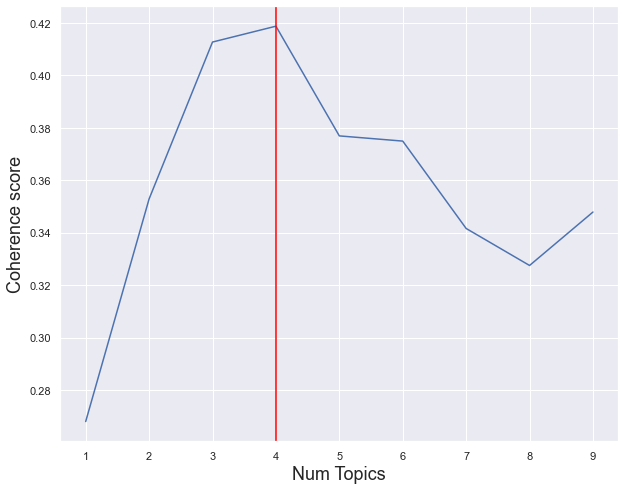

In [75]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_normal, corpus=corpus_normal, 
                                                        texts=lemmatized_normal_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8)) 
plt.plot(x, coherence_values)
plt.axvline(x=4, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [76]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.268
Num Topics = 2  has Coherence Value of 0.3529
Num Topics = 3  has Coherence Value of 0.4127
Num Topics = 4  has Coherence Value of 0.4187
Num Topics = 5  has Coherence Value of 0.3769
Num Topics = 6  has Coherence Value of 0.3749
Num Topics = 7  has Coherence Value of 0.3416
Num Topics = 8  has Coherence Value of 0.3275
Num Topics = 9  has Coherence Value of 0.3478

The optimum number of topics is 4



#### LDA Model

In [77]:
OPTIMAL_TOPICS = 4
#Experimentar valores diferentes

In [78]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_normal,
                                           id2word=id2word_normal,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [79]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_normal]

[(0,
  '0.133*"calcification" + 0.119*"aortic" + 0.096*"degeneration" + '
  '0.090*"spinal" + 0.085*"thoracic" + 0.068*"prominent" + 0.034*"slightly" + '
  '0.030*"mild" + 0.026*"low" + 0.026*"volume"'),
 (1,
  '0.053*"left" + 0.050*"right" + 0.033*"effusion" + 0.032*"focal" + '
  '0.028*"opacity" + 0.026*"prominent" + 0.025*"sided" + 0.025*"atelectasis" + '
  '0.023*"cardiac" + 0.022*"lead"'),
 (2,
  '0.158*"effusion" + 0.135*"pneumothorax" + 0.097*"pleural" + 0.050*"large" + '
  '0.029*"base" + 0.026*"slight" + 0.025*"lower" + 0.023*"scoliosis" + '
  '0.022*"elevated" + 0.018*"aorta"'),
 (3,
  '0.222*"normal" + 0.174*"lung" + 0.148*"heart" + 0.109*"mediastinum" + '
  '0.092*"clear" + 0.033*"soft" + 0.031*"bone" + 0.030*"tissue" + '
  '0.024*"right" + 0.019*"included"')]


In [80]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_normal))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_normal_bigrams, dictionary=id2word_normal, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.697018126388649

Coherence Score:  0.418715514698462


##### Visualization

In [81]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_normal, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.345444  0.145242       1        1  68.321407
1      0.057359 -0.236062       2        1  14.202747
2     -0.230647 -0.175897       3        1   8.791048
0     -0.172156  0.266717       4        1   8.684798, topic_info=             Term        Freq       Total Category  logprob  loglift
9          normal  502.000000  502.000000  Default  30.0000  30.0000
3        effusion   61.000000   61.000000  Default  29.0000  29.0000
10   pneumothorax   50.000000   50.000000  Default  28.0000  28.0000
56  calcification   38.000000   38.000000  Default  27.0000  27.0000
54         aortic   34.000000   34.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
20       probably    2.215723    6.710970   Topic4  -4.8658   1.3354
4           heart    3.383388  344.566390   Topic4  -4.4425  -2.1798
7            lung    2.507382  398.787768   Topic4  -4.7422  -2.6256
1           clear    1.477992  209.977865   Topic4  -5.2707  -2.5127
73        rotated    0.928852    3.338303   Topic4  -5.7352   1.1643

[181 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
149       4  0.677581         accentuate
130       2  0.732227  acromioclavicular
172       4  0.677777                air
39        1  0.772016              angle
39        2  0.205871              angle
...     ...       ...                ...
34        4  0.723009             vessel
82        1  0.865785               view
41        1  0.993963         visualized
86        4  0.976591             volume
213       3  0.799277              would

[167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [82]:
aux_df_lda_normal = pd.DataFrame(vis.topic_info)
aux_df_lda_normal

Term        Freq       Total Category  logprob  loglift
9          normal  502.000000  502.000000  Default  30.0000  30.0000
3        effusion   61.000000   61.000000  Default  29.0000  29.0000
10   pneumothorax   50.000000   50.000000  Default  28.0000  28.0000
56  calcification   38.000000   38.000000  Default  27.0000  27.0000
54         aortic   34.000000   34.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
20       probably    2.215723    6.710970   Topic4  -4.8658   1.3354
4           heart    3.383388  344.566390   Topic4  -4.4425  -2.1798
7            lung    2.507382  398.787768   Topic4  -4.7422  -2.6256
1           clear    1.477992  209.977865   Topic4  -5.2707  -2.5127
73        rotated    0.928852    3.338303   Topic4  -5.7352   1.1643

[181 rows x 6 columns]

##### Cluster 4 Analysis

In [83]:
aux_df_lda_normal_c2 = aux_df_lda_normal.loc[aux_df_lda_normal['Category'] == 'Topic2']
aux_df_lda_normal_c2

Term       Freq       Total Category  logprob  loglift
70               focal  15.157081   15.804754   Topic2  -3.4348   1.9099
110              sided  11.801925   12.425753   Topic2  -3.6850   1.9002
87         atelectasis  11.783396   12.409704   Topic2  -3.6866   1.8999
113            cardiac  10.849256   11.471109   Topic2  -3.7692   1.8960
144               lead  10.371887   10.993794   Topic2  -3.8142   1.8935
146          ventricle   9.515471   10.137341   Topic2  -3.9004   1.8884
78          projecting   9.663743   10.303104   Topic2  -3.8849   1.8877
61           represent   8.731583    9.381134   Topic2  -3.9863   1.8800
162             atrium   8.197639    8.820011   Topic2  -4.0494   1.8786
163              pacer   7.538066    8.161550   Topic2  -4.1333   1.8723
103      consolidation   7.605670    8.263767   Topic2  -4.1244   1.8687
101                tip   5.560310    6.184138   Topic2  -4.4376   1.8454
58                 may   9.514262   10.626790   Topic2  -3.9005   1.8411
108              chest   5.082608    5.706999   Topic2  -4.5274   1.8359
109               port   5.082608    5.706999   Topic2  -4.5274   1.8359
132     osteoarthritis   4.969934    5.611057   Topic2  -4.5499   1.8304
154           scarring   4.953808    5.594163   Topic2  -4.5531   1.8302
123       questionable   4.926329    5.616424   Topic2  -4.5587   1.8206
97                cava   4.423156    5.048287   Topic2  -4.6664   1.8195
100           superior   4.423156    5.048287   Topic2  -4.6664   1.8195
102               vena   4.423156    5.048287   Topic2  -4.6664   1.8195
18             opacity  12.983737   15.144634   Topic2  -3.5896   1.7978
112      hyperinflated   4.989926    5.829439   Topic2  -4.5458   1.7962
88                band   3.463447    4.094062   Topic2  -4.9110   1.7845
130  acromioclavicular   3.447644    4.097090   Topic2  -4.9156   1.7791
189       glenohumeral   3.194450    3.813436   Topic2  -4.9919   1.7746
63              subtle   3.159368    3.780872   Topic2  -5.0029   1.7722
145          leftsided   2.996513    3.616203   Topic2  -5.0558   1.7638
104          infection   2.811990    3.434881   Topic2  -5.1194   1.7516
115   sternotomy_wires   3.206492    3.927270   Topic2  -4.9881   1.7490
33               small   8.771130   12.651620   Topic2  -3.9818   1.5854
42                left  24.811884   43.536910   Topic2  -2.9419   1.3894
32           pulmonary   6.603478    9.407312   Topic2  -4.2657   1.5978
11               right  23.462435   77.536135   Topic2  -2.9979   0.7564
31           prominent  12.289367   33.155863   Topic2  -3.6445   0.9592
3             effusion  15.293803   61.713123   Topic2  -3.4258   0.5567
36             pleural  10.188877   38.957598   Topic2  -3.8320   0.6106
10        pneumothorax  10.204048   50.058624   Topic2  -3.8305   0.3613
24                base   6.055075   30.983928   Topic2  -4.3524   0.3192
5             included   6.024680   49.083036   Topic2  -4.3574  -0.1459
4                heart   7.244485  344.566390   Topic2  -4.1730  -1.9103

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2198442013.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


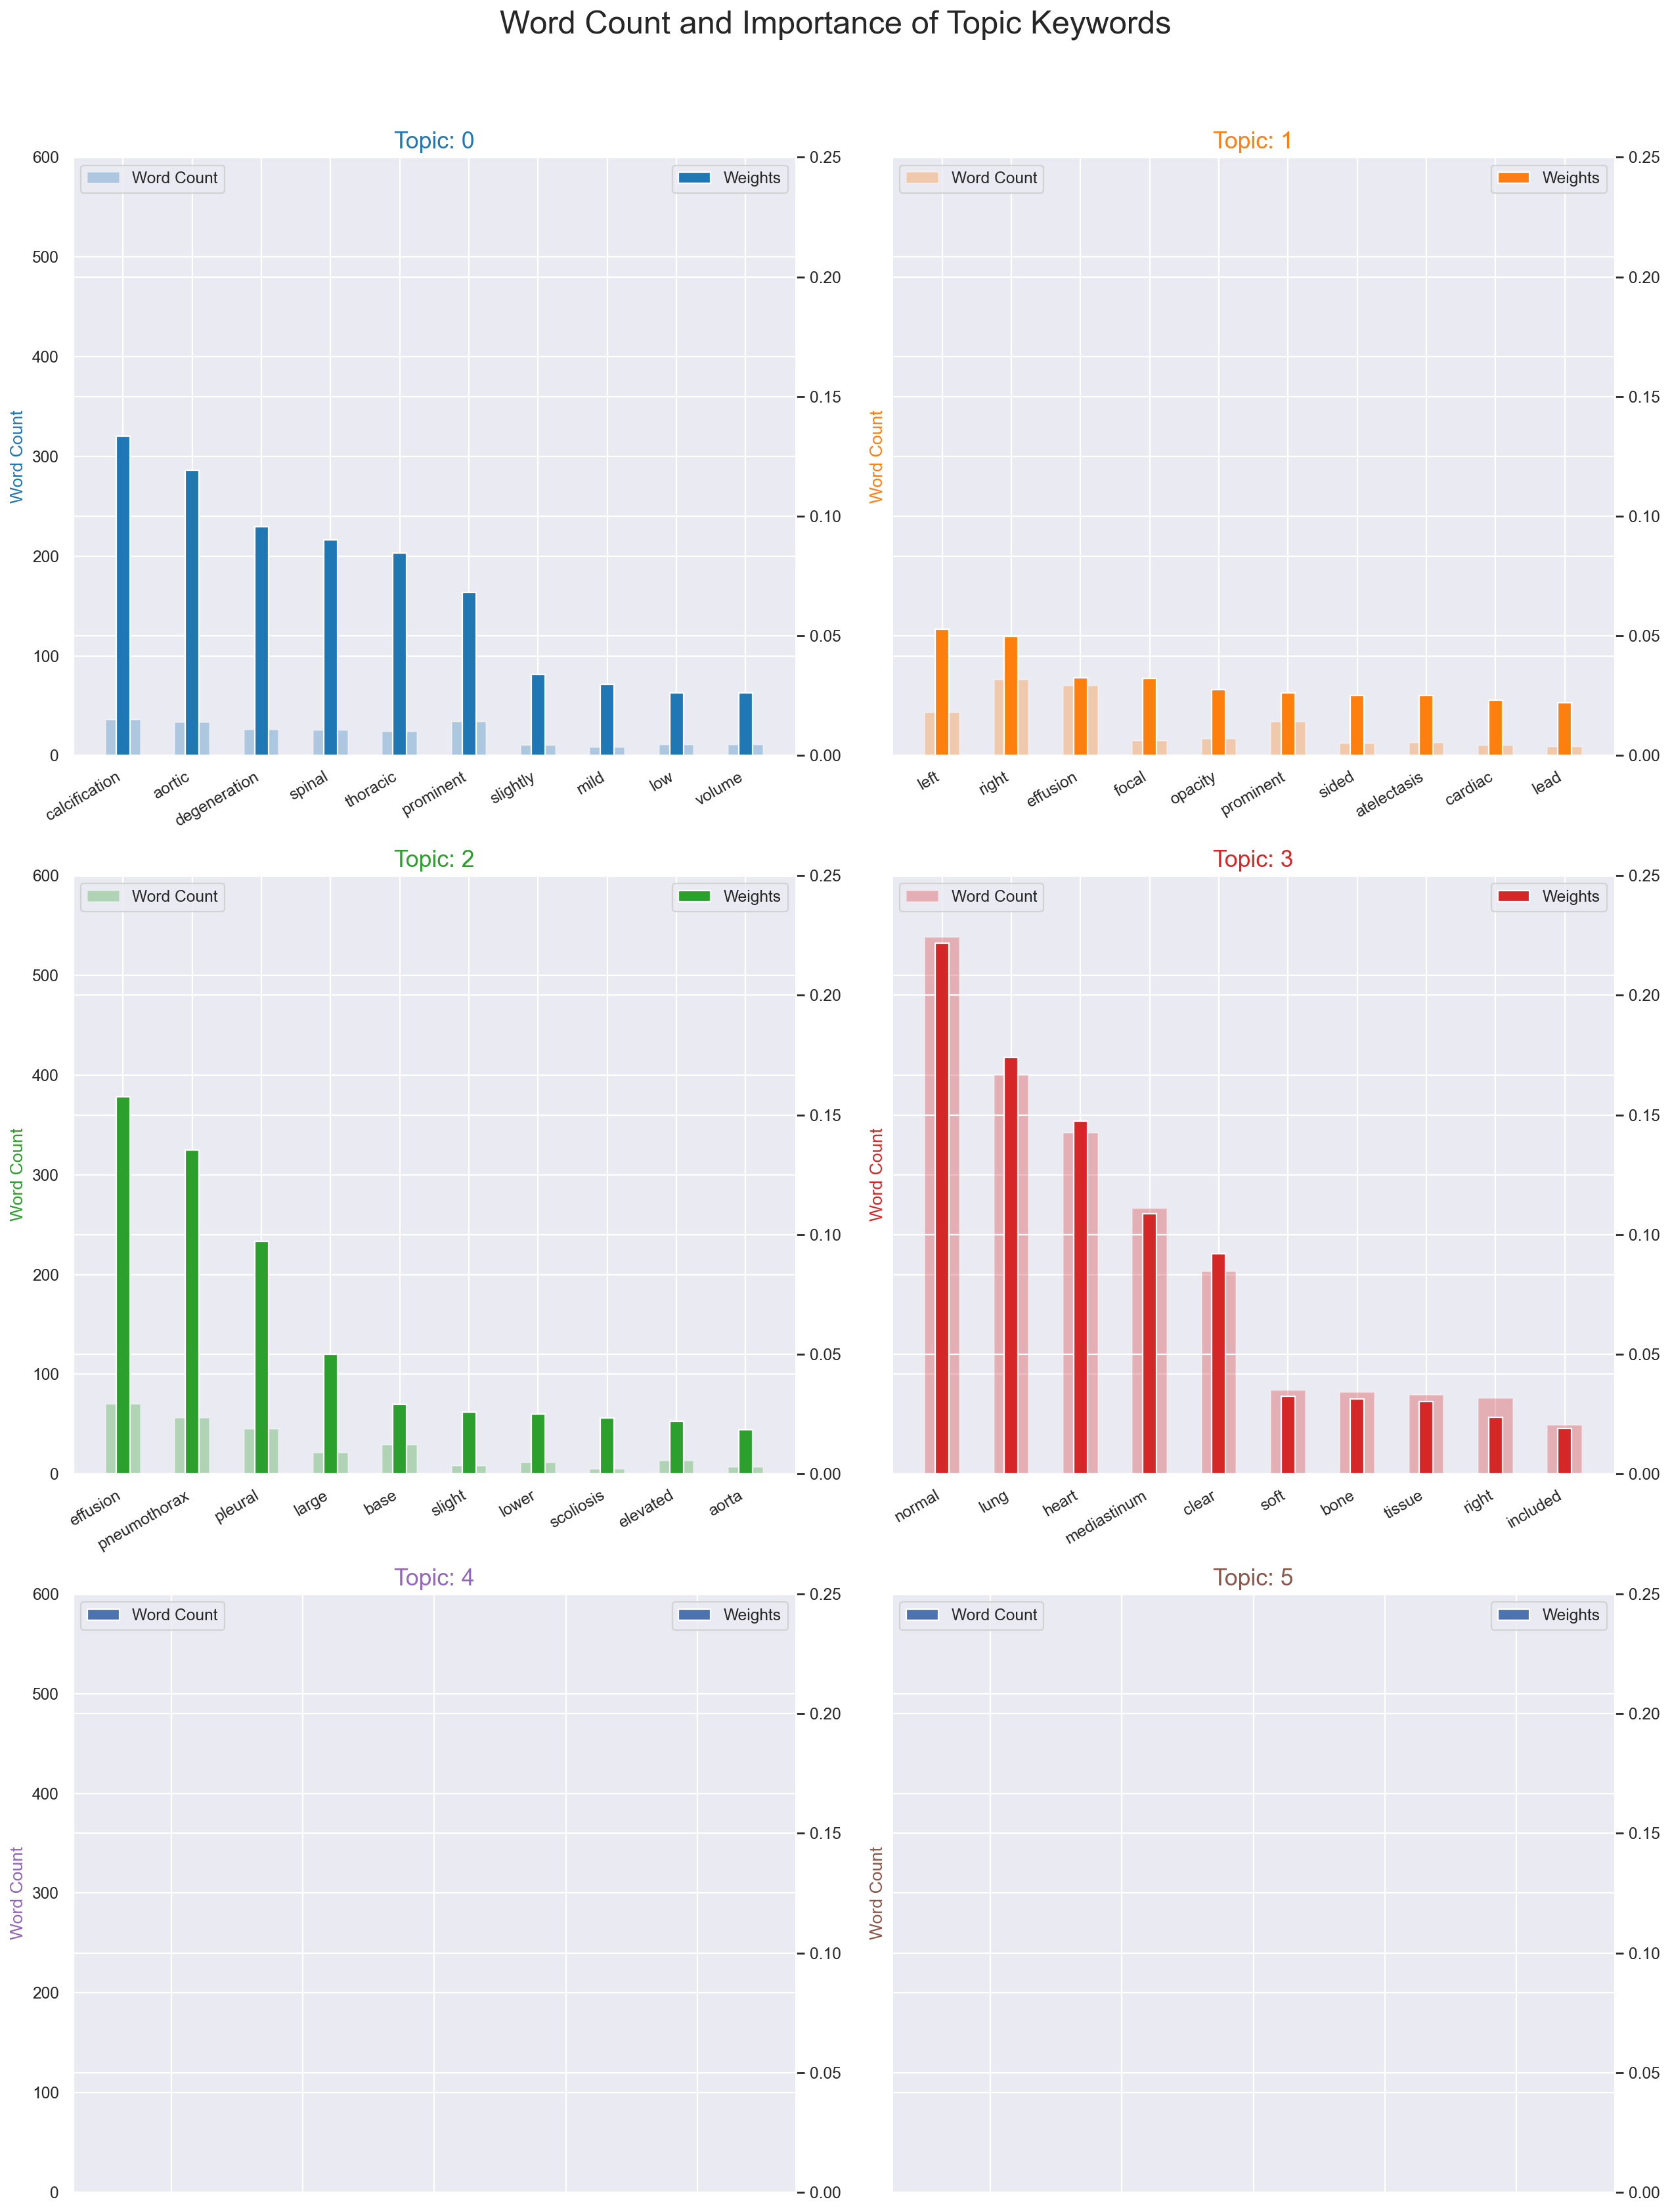

In [84]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_normal_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 600)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

### CHF

In [85]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_chf,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

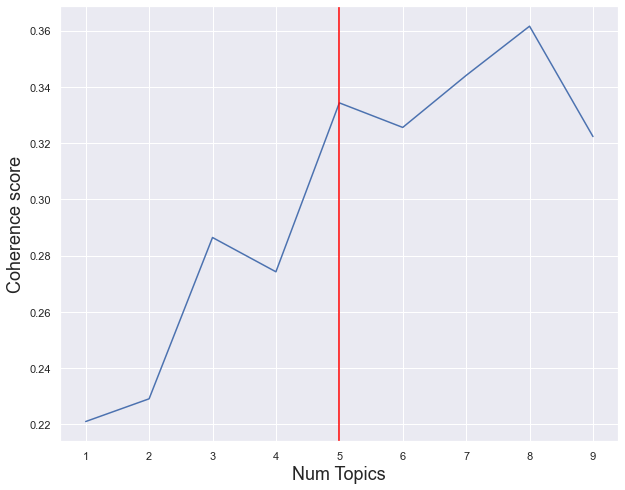

In [86]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_chf, corpus=corpus_chf, 
                                                        texts=lemmatized_chf_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8))
plt.plot(x, coherence_values)
plt.axvline(x=5, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [87]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.2209
Num Topics = 2  has Coherence Value of 0.229
Num Topics = 3  has Coherence Value of 0.2864
Num Topics = 4  has Coherence Value of 0.2742
Num Topics = 5  has Coherence Value of 0.3343
Num Topics = 6  has Coherence Value of 0.3256
Num Topics = 7  has Coherence Value of 0.3441
Num Topics = 8  has Coherence Value of 0.3616
Num Topics = 9  has Coherence Value of 0.3223

The optimum number of topics is 8



#### LDA Model

In [88]:
OPTIMAL_TOPICS = 5
#Experimentar valores diferentes

In [89]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_chf,
                                           id2word=id2word_chf,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

##### Visualization

In [90]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_chf, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.201249 -0.146077       1        1  56.285256
2      0.021178  0.023616       2        1  14.095891
0     -0.124949 -0.231311       3        1  12.646155
4     -0.195423  0.177391       4        1  11.843934
3      0.097945  0.176381       5        1   5.128764, topic_info=            Term        Freq       Total Category  logprob  loglift
8           lung  151.000000  151.000000  Default  30.0000  30.0000
30         right   95.000000   95.000000  Default  29.0000  29.0000
59     pulmonary  199.000000  199.000000  Default  28.0000  28.0000
14         heart   67.000000   67.000000  Default  27.0000  27.0000
38          left   52.000000   52.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
62           may    1.497643   13.655975   Topic5  -4.7308   0.7600
2          edema    1.907819   83.536828   Topic5  -4.4887  -0.8090
43        appear    1.082354    6.696180   Topic5  -5.0556   1.1479
93     congested    1.039135    7.292014   Topic5  -5.0963   1.0219
20  pneumothorax    1.152255   45.597261   Topic5  -4.9930  -0.7078

[290 rows x 6 columns], token_table=      Topic      Freq                              Term
term                                                   
265       4  0.757046                          ac_joint
87        1  0.965666                        accentuate
133       4  0.716261  acromioclavicular_osteoarthritis
262       1  0.993431                             acute
45        2  0.751944                              also
...     ...       ...                               ...
152       2  0.143964                              well
152       5  0.719819                              well
34        1  0.048107                              wire
34        2  0.240534                              wire
34        4  0.721602                              wire

[317 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

In [91]:
vis.topic_info

Term        Freq       Total Category  logprob  loglift
8           lung  151.000000  151.000000  Default  30.0000  30.0000
30         right   95.000000   95.000000  Default  29.0000  29.0000
59     pulmonary  199.000000  199.000000  Default  28.0000  28.0000
14         heart   67.000000   67.000000  Default  27.0000  27.0000
38          left   52.000000   52.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
62           may    1.497643   13.655975   Topic5  -4.7308   0.7600
2          edema    1.907819   83.536828   Topic5  -4.4887  -0.8090
43        appear    1.082354    6.696180   Topic5  -5.0556   1.1479
93     congested    1.039135    7.292014   Topic5  -5.0963   1.0219
20  pneumothorax    1.152255   45.597261   Topic5  -4.9930  -0.7078

[290 rows x 6 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2065363533.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


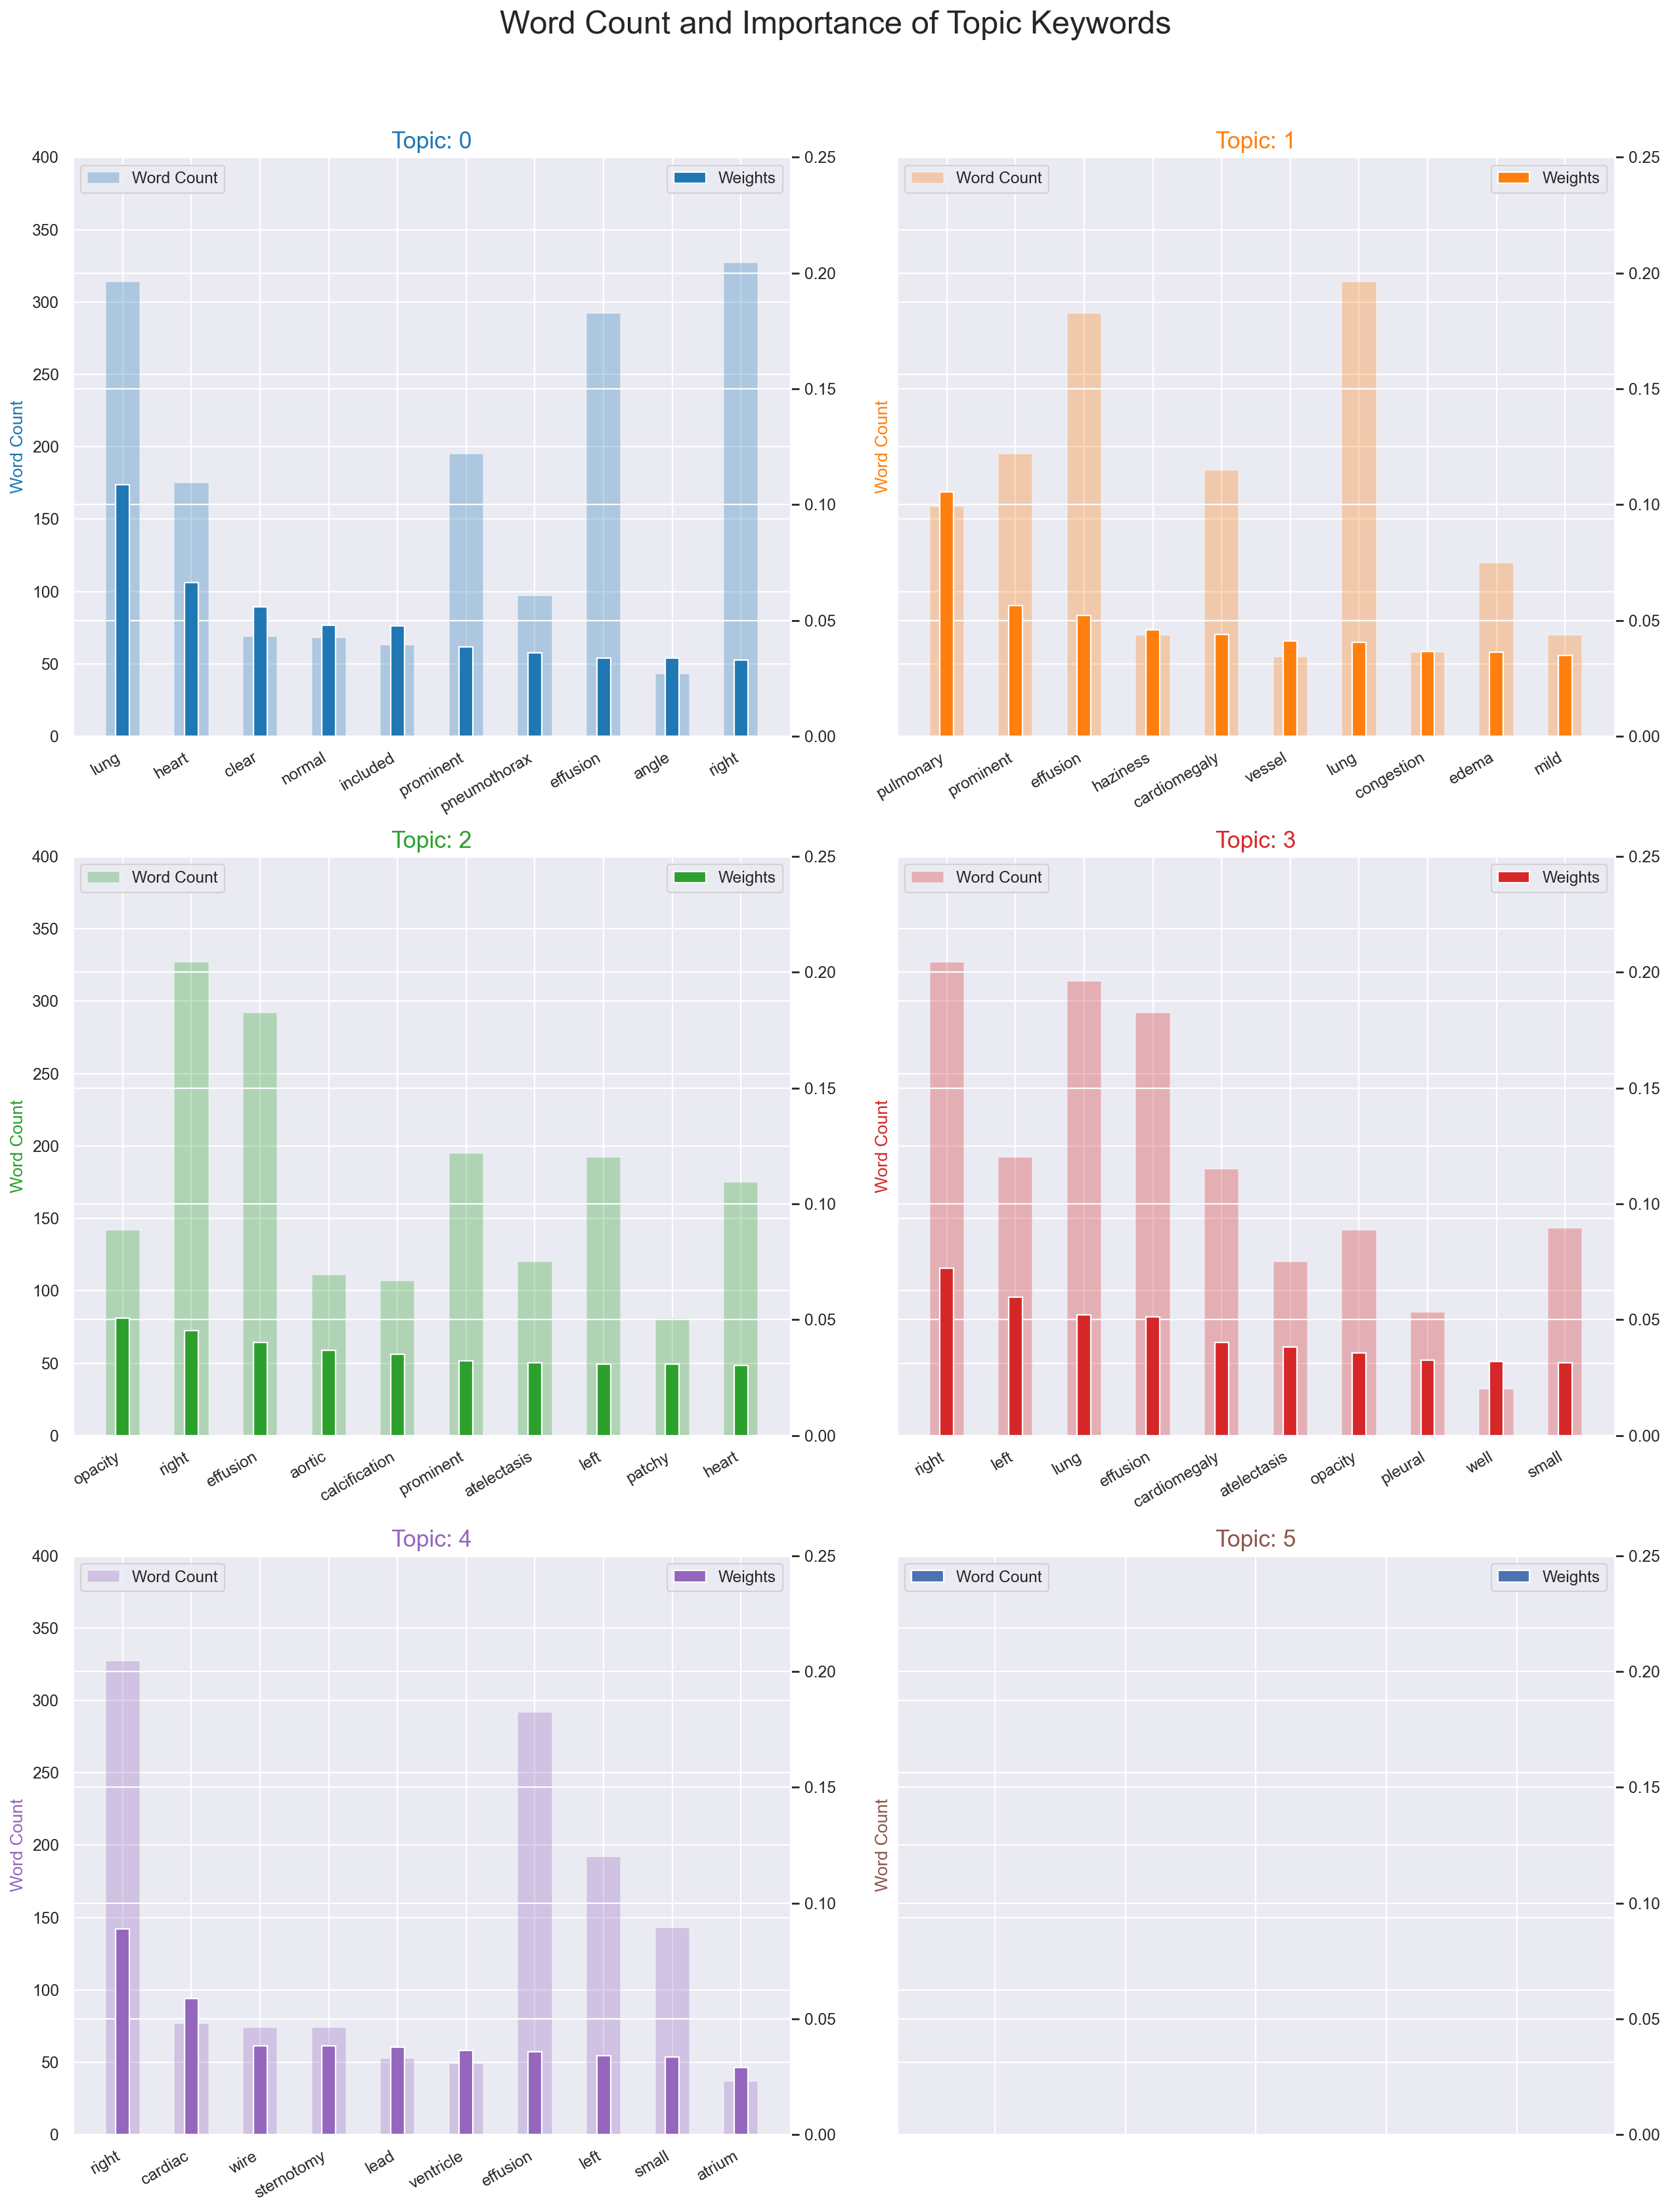

In [92]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_chf_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 400)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

### Pneumonia

In [93]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
          model =gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word_pneumonia,
                                                num_topics=num_topics, random_state=100,
                                                update_every=1, chunksize=100,
                                                passes=10, alpha='auto',
                                                per_word_topics=True)    
          model_list.append(model)
          coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
          coherence_values.append(coherencemodel.get_coherence())
          
    return model_list, coherence_values

#### Topical Model

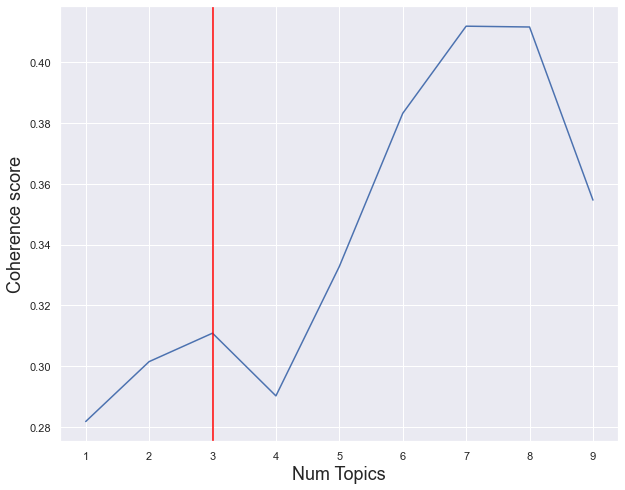

In [94]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_pneumonia, corpus=corpus_pneumonia, 
                                                        texts=lemmatized_pneumonia_bigrams, start=1, limit=10, step=1)

limit=10
start=1
step=1
x = range(start, limit, step)
plt.figure(figsize=(10,8))
plt.plot(x, coherence_values)
#plt.axvline(x=7, color='red')
plt.axvline(x=3, color='red')
plt.xlabel("Num Topics", fontsize=18)
plt.ylabel("Coherence score", fontsize=18)
plt.show()

In [95]:
# Print the coherence scores
OPTIMAL_TOPICS = 0
max_cv = round( np.max(coherence_values), 4)

for m, cv in zip(x, coherence_values):
  if( round(cv, 4) == max_cv ):
    OPTIMAL_TOPICS = m
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

print("\nThe optimum number of topics is %i\n" %OPTIMAL_TOPICS)

Num Topics = 1  has Coherence Value of 0.2818
Num Topics = 2  has Coherence Value of 0.3015
Num Topics = 3  has Coherence Value of 0.3109
Num Topics = 4  has Coherence Value of 0.2902
Num Topics = 5  has Coherence Value of 0.3328
Num Topics = 6  has Coherence Value of 0.3832
Num Topics = 7  has Coherence Value of 0.4119
Num Topics = 8  has Coherence Value of 0.4117
Num Topics = 9  has Coherence Value of 0.3547

The optimum number of topics is 7



#### LDA Model

In [96]:
OPTIMAL_TOPICS = 3
#Experimentar valores diferentes

In [97]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_pneumonia,
                                           id2word=id2word_pneumonia,
                                           num_topics=OPTIMAL_TOPICS, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [98]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_pneumonia))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lemmatized_pneumonia_bigrams, dictionary=id2word_pneumonia, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.873351483249498

Coherence Score:  0.3108830234204662


##### Visualization

In [99]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_lda.corpus, id2word_pneumonia, mds='mmds')
vis

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.209995  0.079997       1        1  66.206433
1     -0.010889 -0.197899       2        1  28.915897
2     -0.199105  0.117902       3        1   4.877670, topic_info=              Term        Freq       Total Category  logprob  loglift
4           normal  231.000000  231.000000  Default  30.0000  30.0000
170  calcification   62.000000   62.000000  Default  29.0000  29.0000
23           right  120.000000  120.000000  Default  28.0000  28.0000
20         opacity   64.000000   64.000000  Default  27.0000  27.0000
169         aortic   71.000000   71.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
18            left    2.977589   87.812783   Topic3  -3.9934  -0.3636
13        effusion    2.808218   90.544465   Topic3  -4.0520  -0.4528
23           right    2.883567  120.237726   Topic3  -4.0255  -0.7099
60           small    1.924402   19.870640   Topic3  -4.4299   0.6859
49          likely    1.619937    9.544090   Topic3  -4.6021   1.2470

[171 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
142       3  0.846099          air
70        2  0.987426         also
8         1  0.886176        angle
8         2  0.136335        angle
169       1  0.942955       aortic
...     ...       ...          ...
26        1  0.994495   visualized
38        2  0.959823       volume
228       2  0.908732  volume_loss
278       3  0.836893         wall
135       2  0.978914         well

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [100]:
vis.topic_info

Term        Freq       Total Category  logprob  loglift
4           normal  231.000000  231.000000  Default  30.0000  30.0000
170  calcification   62.000000   62.000000  Default  29.0000  29.0000
23           right  120.000000  120.000000  Default  28.0000  28.0000
20         opacity   64.000000   64.000000  Default  27.0000  27.0000
169         aortic   71.000000   71.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
18            left    2.977589   87.812783   Topic3  -3.9934  -0.3636
13        effusion    2.808218   90.544465   Topic3  -4.0520  -0.4528
23           right    2.883567  120.237726   Topic3  -4.0255  -0.7099
60           small    1.924402   19.870640   Topic3  -4.4299   0.6859
49          likely    1.619937    9.544090   Topic3  -4.6021   1.2470

[171 rows x 6 columns]

#### Word Counts of Topic Keywords

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2878358971.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


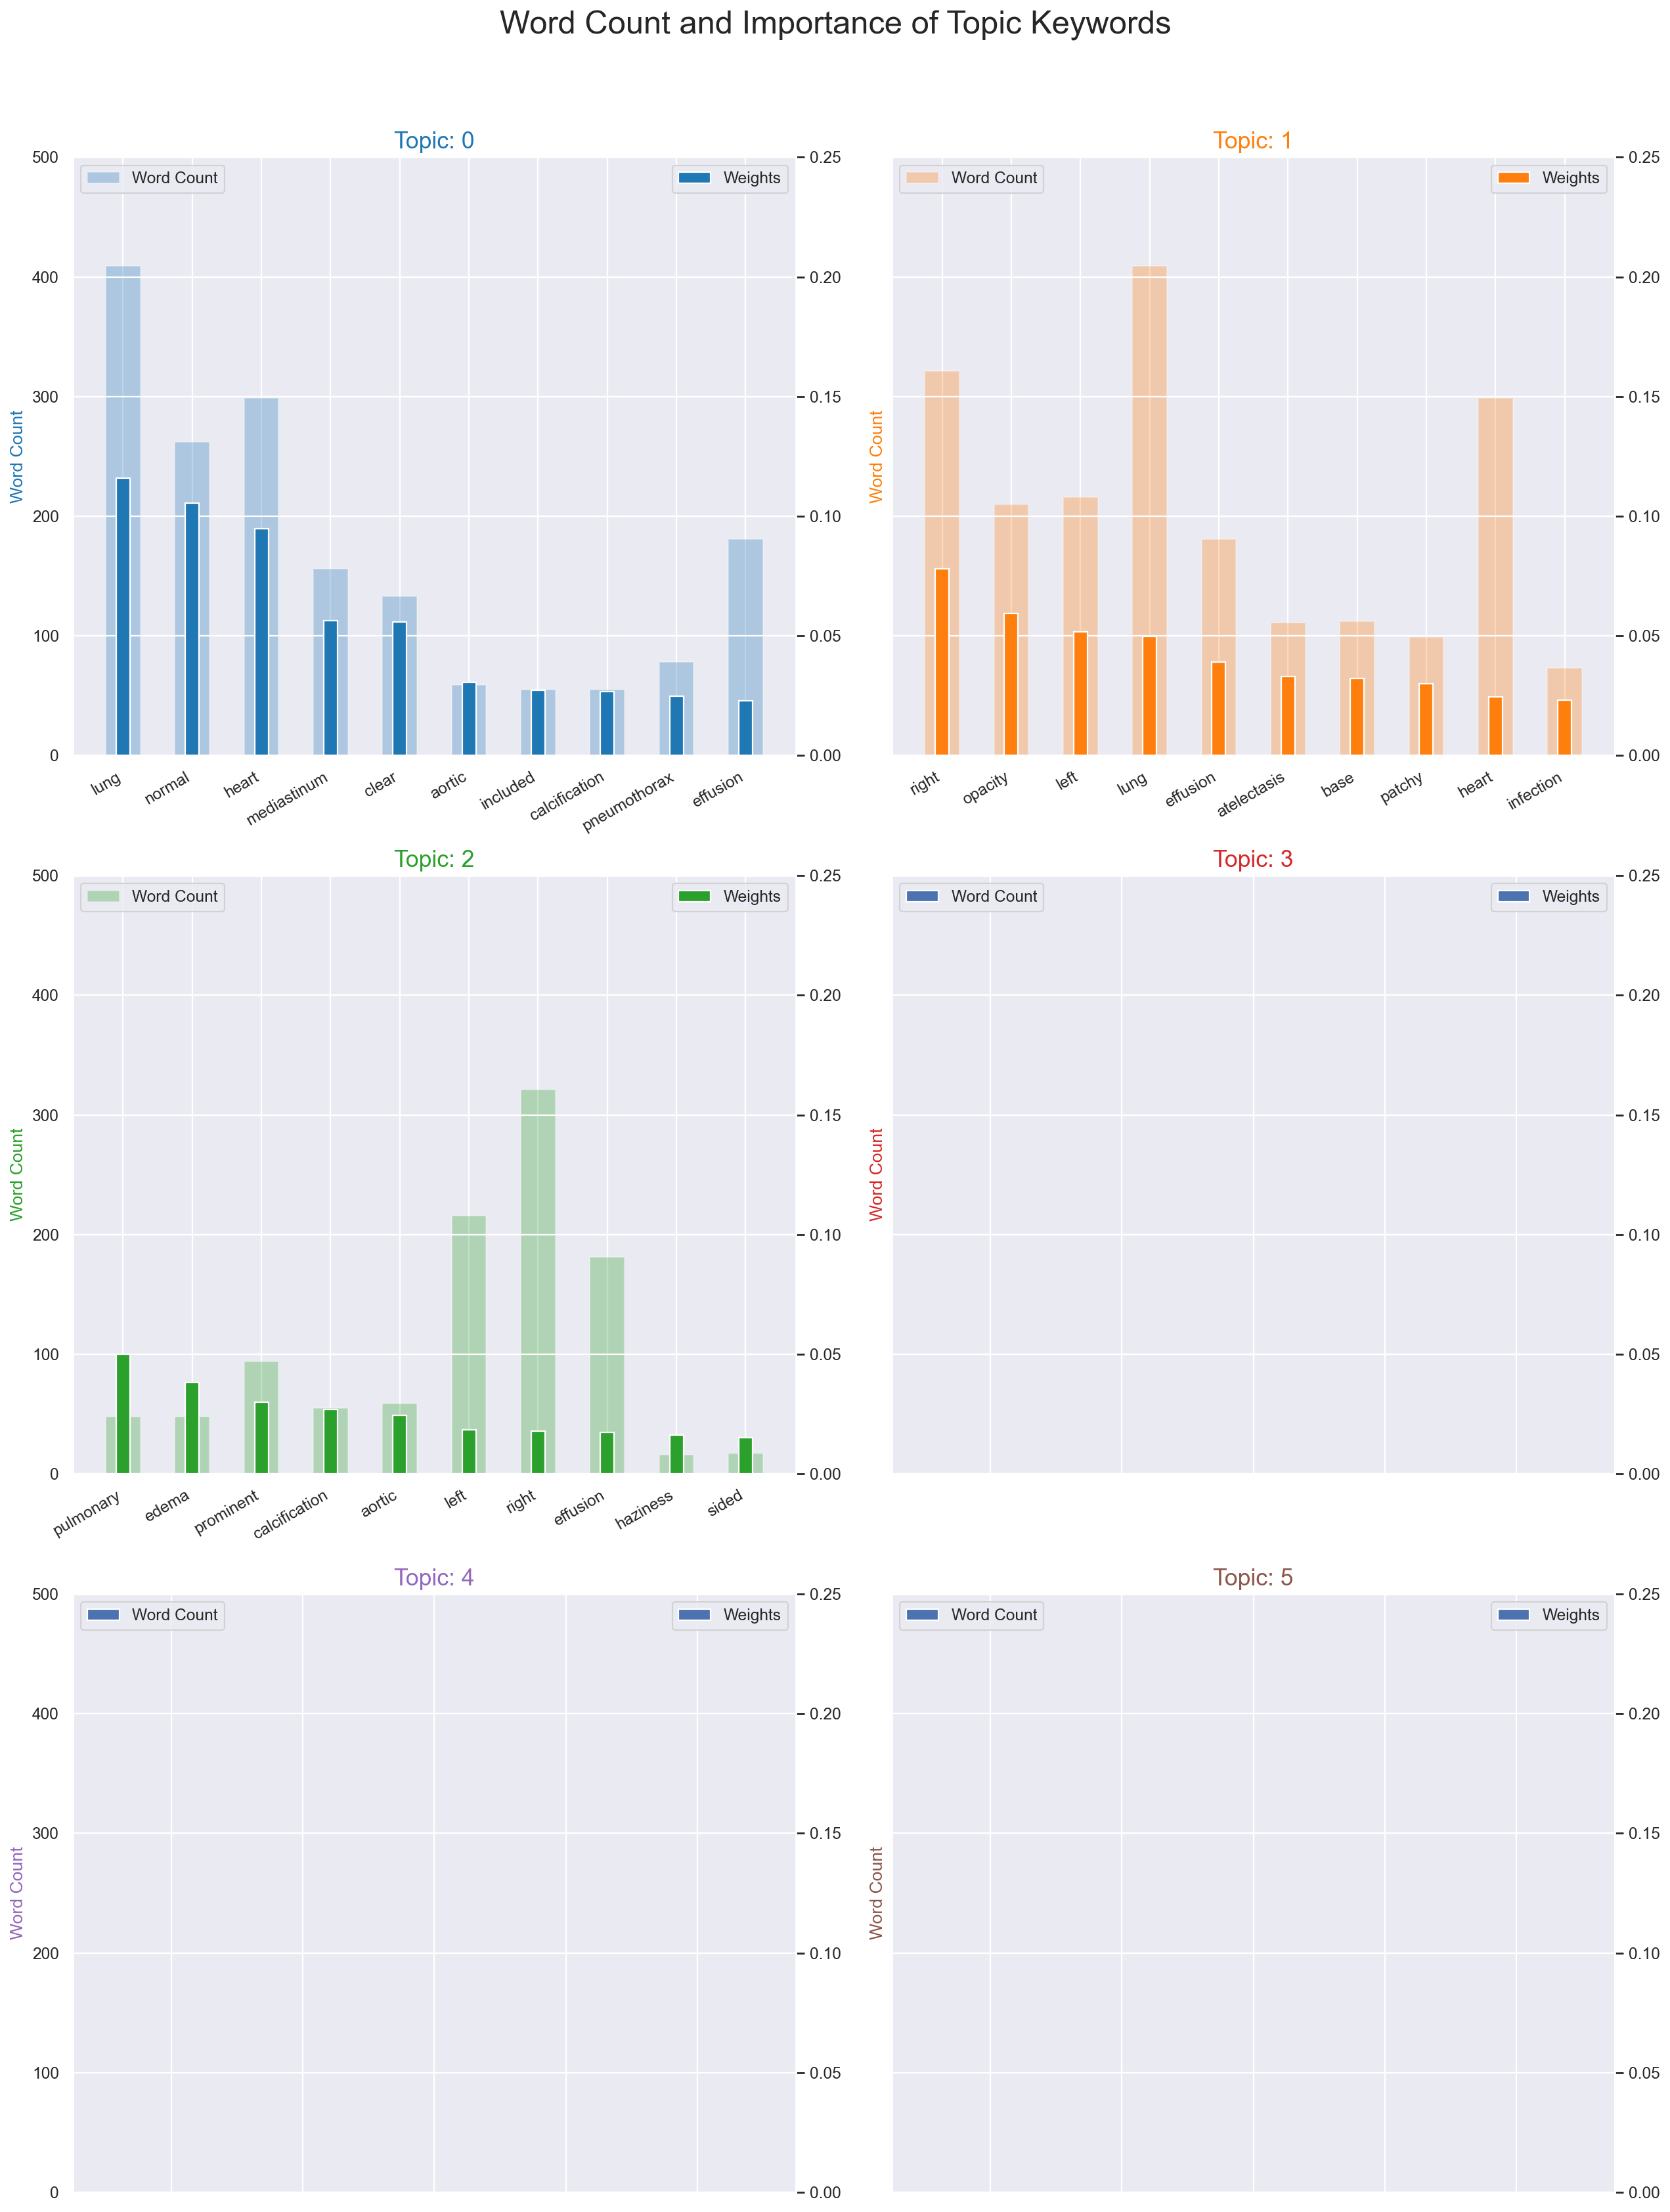

In [101]:
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=OPTIMAL_TOPICS)

data_flat = [w for w_list in lemmatized_pneumonia_bigrams for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.25); ax.set_ylim(0, 500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

## N-Grams

### N-Grams Initialization

In [102]:
class transcripts2words:
    def __init__(self):
        self.input = None
        self.output = None

    def transcripts_to_words(self, transcripts):
        self.words = []
        for transcript in transcripts:
            splitcomment = nltk.word_tokenize(transcript) 
            for word in splitcomment:
                if word not in stop_words:
                    self.words.append(word)
        return self.words

    def bigram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder2 = nltk.collocations.BigramCollocationFinder.from_words(words)
        self.words2_count_df = pd.DataFrame(self.finder2.ngram_fd.most_common())
        return self.words2_count_df

    def trigram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder3 = nltk.collocations.TrigramCollocationFinder.from_words(words)
        self.words3_count_df = pd.DataFrame(self.finder3.ngram_fd.most_common())
        return self.words3_count_df

    def quadgram(self, transcripts):
        words = self.transcripts_to_words(transcripts)
        self.finder4 = nltk.collocations.QuadgramCollocationFinder.from_words(words)
        self.words4_count_df = pd.DataFrame(self.finder4.ngram_fd.most_common())
        return self.words4_count_df

### Normal N-Grams

In [103]:
t2w = transcripts2words()
bigram_df = t2w.bigram(normal_transcripts_ngrams)
trigram_df = t2w.trigram(normal_transcripts_ngrams)
quadgram_df = t2w.quadgram(normal_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     733
Trigram    |     1154
Quadgram   |     1548


In [104]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Bigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart') 
 297 
 
 
 1 
 ('heart', 'mediastinum') 
 250 
 
 
 2 
 ('lungs', 'clear') 
 181 
 
 
 3 
 ('mediastinum', 'lungs') 
 126 
 
 
 4 
 ('normal', 'lungs') 
 115 
 
 
 5 
 ('clear', 'normal') 
 97 
 
 
 6 
 ('mediastinum', 'normal') 
 93 
 
 
 7 
 ('soft', 'tissues') 
 79 
 
 
 8 
 ('lungs', 'normal') 
 72 
 
 
 9 
 ('bones', 'soft') 
 66 
 
 
 

 
 Top 20 Trigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart', 'mediastinum') 
 241 
 
 
 1 
 ('heart', 'mediastinum', 'lungs') 
 119 
 
 
 2 
 ('mediastinum', 'lungs', 'clear') 
 119 
 
 
 3 
 ('lungs', 'clear', 'normal') 
 88 
 
 
 4 
 ('heart', 'mediastinum', 'normal') 
 87 
 
 
 5 
 ('clear', 'normal', 'heart') 
 82 
 
 
 6 
 ('mediastinum', 'normal', 'lungs') 
 75 
 
 
 7 
 ('normal', 'lungs', 'normal') 
 65 
 
 
 8 
 ('bones', 'soft', 'tissues') 
 62 
 
 
 9 
 ('soft', 'tissues', 'normal') 
 52 
 
 
 

 
 Top 20 Quadrgrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart', 'mediastinum', 'lungs') 
 118 
 
 
 1 
 ('heart', 'mediastinum', 'lungs', 'clear') 
 113 
 
 
 2 
 ('normal', 'heart', 'mediastinum', 'normal') 
 80 
 
 
 3 
 ('lungs', 'clear', 'normal', 'heart') 
 73 
 
 
 4 
 ('heart', 'mediastinum', 'normal', 'lungs') 
 71 
 
 
 5 
 ('clear', 'normal', 'heart', 'mediastinum') 
 65 
 
 
 6 
 ('mediastinum', 'lungs', 'clear', 'normal') 
 64 
 
 
 7 
 ('bones', 'soft', 'tissues', 'normal') 
 48 
 
 
 8 
 ('mediastinum', 'normal', 'lungs', 'normal') 
 42 
 
 
 9 
 ('normal', 'lungs', 'normal', 'heart') 
 39

### CHF N-Grams

In [105]:
t2w = transcripts2words()
bigram_df = t2w.bigram(chf_transcripts_ngrams)
trigram_df = t2w.trigram(chf_transcripts_ngrams)
quadgram_df = t2w.quadgram(chf_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     2269
Trigram    |     4061
Quadgram   |     5325


In [106]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Bigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('aortic', 'calcifications') 
 104 
 
 
 1 
 ('prominent', 'heart') 
 98 
 
 
 2 
 ('sternotomy', 'wires') 
 74 
 
 
 3 
 ('pleural', 'effusion') 
 70 
 
 
 4 
 ('prominent', 'pulmonary') 
 70 
 
 
 5 
 ('effusion', 'pneumothorax') 
 68 
 
 
 6 
 ('large', 'effusion') 
 49 
 
 
 7 
 ('left', 'effusion') 
 47 
 
 
 8 
 ('pulmonary', 'edema') 
 47 
 
 
 9 
 ('pulmonary', 'vessels') 
 46 
 
 
 

 
 Top 20 Trigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('prominent', 'pulmonary', 'vessels') 
 40 
 
 
 1 
 ('cardiomegaly', 'aortic', 'calcifications') 
 37 
 
 
 2 
 ('heart', 'aortic', 'calcifications') 
 36 
 
 
 3 
 ('right', 'atrium', 'ventricle') 
 34 
 
 
 4 
 ('pleural', 'effusion', 'pneumothorax') 
 32 
 
 
 5 
 ('small', 'right', 'effusion') 
 32 
 
 
 6 
 ('thoracic', 'spinal', 'degeneration') 
 30 
 
 
 7 
 ('leads', 'projecting', 'right') 
 29 
 
 
 8 
 ('prominent', 'heart', 'aortic') 
 27 
 
 
 9 
 ('projecting', 'right', 'atrium') 
 26 
 
 
 

 
 Top 20 Quadrgrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('leads', 'projecting', 'right', 'atrium') 
 26 
 
 
 1 
 ('prominent', 'heart', 'aortic', 'calcifications') 
 26 
 
 
 2 
 ('projecting', 'right', 'atrium', 'ventricle') 
 24 
 
 
 3 
 ('pacer', 'leads', 'projecting', 'right') 
 16 
 
 
 4 
 ('fluid', 'right', 'minor', 'fissure') 
 16 
 
 
 5 
 ('sternotomy', 'wires', 'cardiac', 'clips') 
 15 
 
 
 6 
 ('left-sided', 'cardiac', 'pacer', 'leads') 
 14 
 
 
 7 
 ('cardiac', 'pacer', 'leads', 'projecting') 
 14 
 
 
 8 
 ('elevated', 'right', 'lung', 'base') 
 14 
 
 
 9 
 ('aortic', 'calcifications', 'prominent', 'pulmonary') 
 13

### Pneumonia N-Grams

In [107]:
t2w = transcripts2words()
bigram_df = t2w.bigram(pneumonia_transcripts_ngrams)
trigram_df = t2w.trigram(pneumonia_transcripts_ngrams)
quadgram_df = t2w.quadgram(pneumonia_transcripts_ngrams)
print(' The length of the n-grams are: ')
print('Bigram     |    ', len(bigram_df))
print('Trigram    |    ', len(trigram_df))
print('Quadgram   |    ', len(quadgram_df))

 The length of the n-grams are: 
Bigram     |     2249
Trigram    |     3764
Quadgram   |     4782


In [108]:
df1_styler = bigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Bigrams')
df2_styler = trigram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Trigrams')
df3_styler = quadgram_df.head(10).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Quadrgrams')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Bigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart') 
 191 
 
 
 1 
 ('heart', 'mediastinum') 
 140 
 
 
 2 
 ('right', 'lung') 
 75 
 
 
 3 
 ('pleural', 'effusion') 
 73 
 
 
 4 
 ('lungs', 'clear') 
 72 
 
 
 5 
 ('left', 'lung') 
 67 
 
 
 6 
 ('opacity', 'right') 
 62 
 
 
 7 
 ('patchy', 'opacity') 
 59 
 
 
 8 
 ('prominent', 'heart') 
 59 
 
 
 9 
 ('lung', 'base') 
 58 
 
 
 

 
 Top 20 Trigrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart', 'mediastinum') 
 137 
 
 
 1 
 ('heart', 'mediastinum', 'lungs') 
 48 
 
 
 2 
 ('mediastinum', 'lungs', 'clear') 
 43 
 
 
 3 
 ('pleural', 'effusion', 'pneumothorax') 
 37 
 
 
 4 
 ('right', 'lung', 'base') 
 37 
 
 
 5 
 ('clear', 'normal', 'heart') 
 34 
 
 
 6 
 ('thoracic', 'spinal', 'degeneration') 
 29 
 
 
 7 
 ('heart', 'aortic', 'calcifications') 
 29 
 
 
 8 
 ('patchy', 'opacity', 'right') 
 27 
 
 
 9 
 ('lungs', 'clear', 'normal') 
 27 
 
 
 

 
 Top 20 Quadrgrams 
 
 
   
 0 
 1 
 
 
 
 
 0 
 ('normal', 'heart', 'mediastinum', 'lungs') 
 48 
 
 
 1 
 ('heart', 'mediastinum', 'lungs', 'clear') 
 42 
 
 
 2 
 ('clear', 'normal', 'heart', 'mediastinum') 
 26 
 
 
 3 
 ('effusion', 'pneumothorax', 'normal', 'heart') 
 20 
 
 
 4 
 ('lungs', 'clear', 'normal', 'heart') 
 20 
 
 
 5 
 ('pneumothorax', 'normal', 'heart', 'mediastinum') 
 19 
 
 
 6 
 ('mediastinum', 'lungs', 'clear', 'normal') 
 18 
 
 
 7 
 ('elevated', 'right', 'lung', 'base') 
 16 
 
 
 8 
 ('prominent', 'heart', 'aortic', 'calcifications') 
 15 
 
 
 9 
 ('pleural', 'effusion', 'pneumothorax', 'normal') 
 14

## Word Cloud

#### Normal

In [109]:
d = {}
for a, x in words_count_normal_df.values:
    d[a] = x

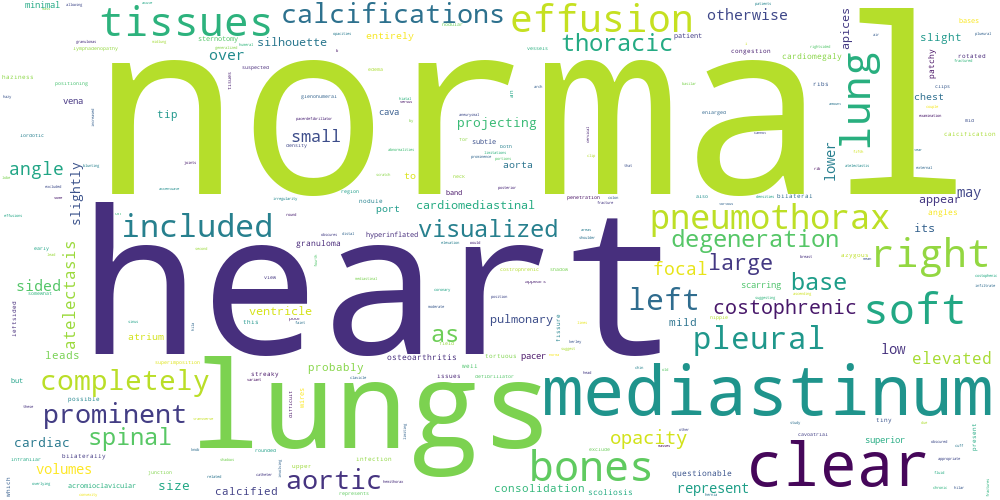

In [110]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

#### CHF

In [111]:
d = {}
for a, x in words_count_chf_df.values:
    d[a] = x

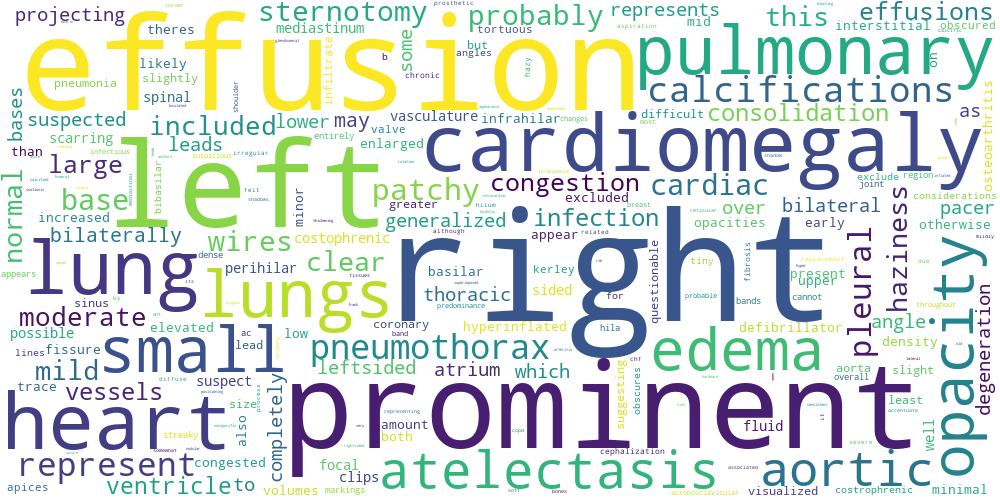

In [112]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

#### Pneumonia

In [113]:
d = {}
for a, x in words_count_pneumonia_df.values:
    d[a] = x

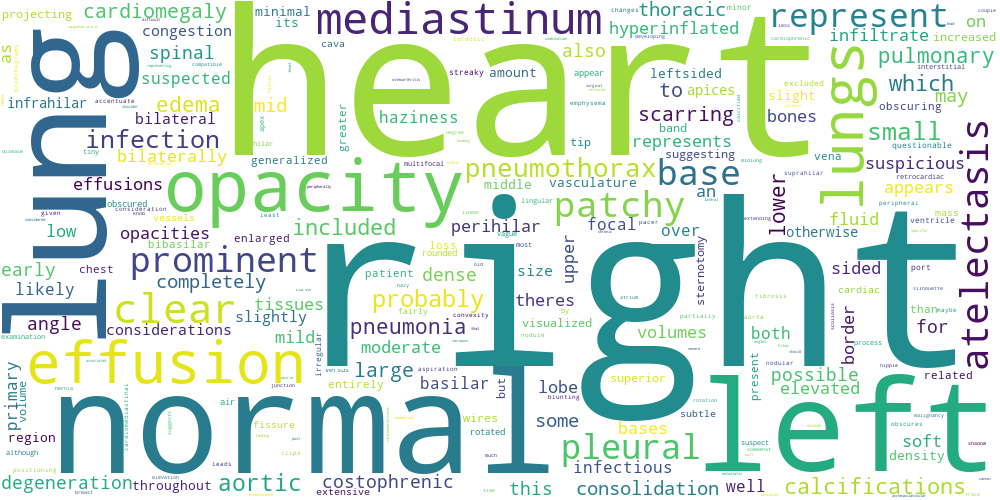

In [114]:
wordcloud = WordCloud(background_color="white", max_words=10000, repeat=False,contour_width=3, contour_color='steelblue', width=1000, height=500)
wordcloud.generate_from_frequencies(frequencies=d)
wordcloud.to_image()

## Assigning Bounding Boxes to words

### Assignment Code

In [115]:
words_normal['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_normal)):
    dicom_id = words_normal['dicom_id'].iloc[i]
    aux_df = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_normal['begin_time'].iloc[i]]
    words_normal['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3184520606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_normal['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]


In [116]:
words_chf['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_chf)):
    dicom_id = words_chf['dicom_id'].iloc[i]
    aux_df = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_chf['begin_time'].iloc[i]]
    words_chf['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1636122691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_chf['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]


In [117]:
words_pneumonia['Bounding Box EyeGaze'] = 'Not defined'

for i in range(len(words_pneumonia)):
    dicom_id = words_pneumonia['dicom_id'].iloc[i]
    aux_df = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= words_pneumonia['begin_time'].iloc[i]]
    words_pneumonia['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1658077543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_pneumonia['Bounding Box EyeGaze'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]


### Results

#### Normal

In [118]:
words_normal

begin_time  end_time      phrase  patient_id  \
0            3.0       3.4       right    10457182   
1            3.4       3.6        lung    10457182   
2            3.6       3.7          is    10457182   
3            3.7       3.9         not    10457182   
4            3.9       4.3  completely    10457182   
...          ...       ...         ...         ...   
4080        14.6      15.0         and    12053833   
4081        15.0      15.1        soft    12053833   
4082        15.1      15.8    tissues.    12053833   
4083        20.4      20.7        mild    12053833   
4084        20.7      21.7  scoliosis.    12053833   

                                          dicom_id        Bounding Box EyeGaze  
0     16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
1     16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1        left lower lung zone  
2     16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1  Area out of Bounding Boxes  
3     16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1  Area out of Bounding Boxes  
4     16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
...                                            ...                         ...  
4080  16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1               left clavicle  
4081  16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1                     trachea  
4082  16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1                     trachea  
4083  16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1          cardiac silhouette  
4084  16344c71-8bd55bc8-952edb72-c361b4e8-c4980ee1          cardiac silhouette  

[4085 rows x 6 columns]

In [119]:
Example_normal = words_normal.loc[words_normal['dicom_id'] == '16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1']
Example_normal

begin_time  end_time         phrase  patient_id  \
0          3.0       3.4          right    10457182   
1          3.4       3.6           lung    10457182   
2          3.6       3.7             is    10457182   
3          3.7       3.9            not    10457182   
4          3.9       4.3     completely    10457182   
5          4.3       4.9      included.    10457182   
6          5.9       6.4          lungs    10457182   
7          6.4       6.6         appear    10457182   
8          6.6       7.0         clear.    10457182   
9          7.0       8.2             no    10457182   
10        10.3      10.9          large    10457182   
11        10.9      11.2       effusion    10457182   
12        11.2      11.4             or    10457182   
13        11.4      11.7  pneumothorax.    10457182   
14        11.7      13.2         normal    10457182   
15        13.2      13.4          heart    10457182   
16        13.4      13.6            and    10457182   
17        13.6      13.7   mediastinum.    10457182   

                                        dicom_id        Bounding Box EyeGaze  
0   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
1   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1        left lower lung zone  
2   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1  Area out of Bounding Boxes  
3   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1  Area out of Bounding Boxes  
4   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
5   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1       right lower lung zone  
6   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
7   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1         right mid lung zone  
8   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1       left hilar structures  
9   16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1          left mid lung zone  
10  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1       right lower lung zone  
11  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1        left lower lung zone  
12  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1               left clavicle  
13  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1                     trachea  
14  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1                     trachea  
15  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1          left mid lung zone  
16  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1          left mid lung zone  
17  16948ae4-b8be1fa1-6b1fa93f-30dcaa87-cb904cd1       left hilar structures

#### CHF

In [120]:
words_chf

begin_time  end_time         phrase  patient_id  \
0            2.2       2.6           mild    15628804   
1            2.6       2.9  cardiomegaly.    15628804   
2            2.9       5.2    generalized    15628804   
3            5.2       5.4       haziness    15628804   
4            5.4       5.5             of    15628804   
...          ...       ...            ...         ...   
7919        17.9      18.1             is    16994918   
7920        18.1      18.5     consistent    16994918   
7921        18.5      18.7           with    16994918   
7922        18.7      19.0      pulmonary    16994918   
7923        19.0      19.5         edema.    16994918   

                                          dicom_id        Bounding Box EyeGaze  
0     24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4          cardiac silhouette  
1     24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4       left hilar structures  
2     24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4          cardiac silhouette  
3     24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4          left mid lung zone  
4     24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4          cardiac silhouette  
...                                            ...                         ...  
7919  81f2eac1-e5c7ddff-a96eb85f-85612dc2-0d95264c               left clavicle  
7920  81f2eac1-e5c7ddff-a96eb85f-85612dc2-0d95264c               left clavicle  
7921  81f2eac1-e5c7ddff-a96eb85f-85612dc2-0d95264c                     trachea  
7922  81f2eac1-e5c7ddff-a96eb85f-85612dc2-0d95264c                     trachea  
7923  81f2eac1-e5c7ddff-a96eb85f-85612dc2-0d95264c  Area out of Bounding Boxes  

[7924 rows x 6 columns]

In [121]:
Example_chf = words_chf.loc[words_chf['dicom_id'] == '24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4']
Example_chf

begin_time  end_time         phrase  patient_id  \
0          2.2       2.6           mild    15628804   
1          2.6       2.9  cardiomegaly.    15628804   
2          2.9       5.2    generalized    15628804   
3          5.2       5.4       haziness    15628804   
4          5.4       5.5             of    15628804   
5          5.5       5.9          lungs    15628804   
6          5.9       6.1           with    15628804   
7          6.1       6.3        basilar    15628804   
8          6.3       7.1  predominance.    15628804   
9          7.1       8.3             no    15628804   
10         8.3       8.5          large    15628804   
11         8.5       8.8      effusion.    15628804   
12         8.8       9.6           this    15628804   
13         9.6       9.8         likely    15628804   
14         9.8      10.8     represents    15628804   
15        11.7      12.3           mild    15628804   
16        12.3      12.4         edema.    15628804   

                                        dicom_id    Bounding Box EyeGaze  
0   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
1   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4   left hilar structures  
2   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
3   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      left mid lung zone  
4   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
5   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4     right mid lung zone  
6   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4     right mid lung zone  
7   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4   right lower lung zone  
8   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4   right lower lung zone  
9   24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
10  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
11  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4    left lower lung zone  
12  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4    left lower lung zone  
13  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
14  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      cardiac silhouette  
15  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4  right hilar structures  
16  24c7496c-d7635dfe-b8e0b87f-d818affc-78ff7cf4      left mid lung zone

#### Pneumonia

In [122]:
words_pneumonia

begin_time end_time           phrase  patient_id  \
0            1.2      1.8           normal    14523345   
1            1.8      2.0            heart    14523345   
2            2.0      2.1              and    14523345   
3            2.1      2.2     mediastinum.    14523345   
4            2.2      3.9              the    14523345   
...          ...      ...              ...         ...   
7485        17.6     18.0        infection    15165193   
7486        18.0     18.1              are    15165193   
7487        18.1     18.2              the    15165193   
7488        18.2     18.7          primary    15165193   
7489        18.7     19.6  considerations.    15165193   

                                          dicom_id   Bounding Box EyeGaze  
0     036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120     cardiac silhouette  
1     036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120     cardiac silhouette  
2     036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120      upper mediastinum  
3     036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120      upper mediastinum  
4     036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120                trachea  
...                                            ...                    ...  
7485  d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d    right mid lung zone  
7486  d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d  right upper lung zone  
7487  d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d         right clavicle  
7488  d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d         right clavicle  
7489  d646869c-07a54ebb-590c4a37-78ac0242-c3e2985d   left upper lung zone  

[7490 rows x 6 columns]

In [123]:
Example_pneumonia = words_pneumonia.loc[words_pneumonia['dicom_id'] == '036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120']
Example_pneumonia

begin_time end_time        phrase  patient_id  \
0         1.2      1.8        normal    14523345   
1         1.8      2.0         heart    14523345   
2         2.0      2.1           and    14523345   
3         2.1      2.2  mediastinum.    14523345   
4         2.2      3.9           the    14523345   
5         3.9      4.3         lungs    14523345   
6         4.3      4.4           are    14523345   
7         4.4      5.1        clear.    14523345   

                                       dicom_id   Bounding Box EyeGaze  
0  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120     cardiac silhouette  
1  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120     cardiac silhouette  
2  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120      upper mediastinum  
3  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120      upper mediastinum  
4  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120                trachea  
5  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120   left lower lung zone  
6  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120  right lower lung zone  
7  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120     cardiac silhouette

## Words by Bounding Box

### Normal

In [124]:
words_normal['Count'] = 1

In [125]:
normal_words_count_by_bb_df = pd.DataFrame(words_normal.groupby(['Bounding Box EyeGaze'])['Count'].count())
normal_words_count_by_bb_df.sort_values(by='Count', ascending=False)

Count
Bounding Box EyeGaze             
upper mediastinum             811
cardiac silhouette            622
right lower lung zone         394
left hilar structures         275
left lower lung zone          266
right hilar structures        261
Area out of Bounding Boxes    240
right mid lung zone           207
left clavicle                 198
right upper lung zone         185
right clavicle                163
left mid lung zone            147
left upper lung zone          132
trachea                        94
left lung                      34
right lung                     22
left costophrenic angle        19
right costophrenic angle       15

In [126]:
words_normal['Count'] = 1
normal_words_by_bb_df = pd.DataFrame(words_normal.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

In [127]:
normal_words_by_bb_df

Count
Bounding Box EyeGaze       phrase                                  
Area out of Bounding Boxes a                                      1
                           acromioclavicular                      1
                           acromioclavicular osteoarthritis.      1
                           also                                   1
                           amount                                 1
...                                                             ...
upper mediastinum          visualized.                            1
                           well.                                  1
                           wires.                                 2
                           with                                   3
                           with its tip in                        1

[1158 rows x 1 columns]

### CHF

In [128]:
words_chf['Count'] = 1
chf_words_by_bb_df = pd.DataFrame(words_chf.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

In [129]:
chf_words_count_by_bb_df = pd.DataFrame(words_chf.groupby(['Bounding Box EyeGaze'])['Count'].count())

### Pneumonia

In [130]:
words_pneumonia['Count'] = 1
pneumonia_words_by_bb_df = pd.DataFrame(words_pneumonia.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].count())

In [131]:
pneumonia_words_count_by_bb_df = pd.DataFrame(words_pneumonia.groupby(['Bounding Box EyeGaze'])['Count'].count())

### Results

In [132]:
df1_styler = normal_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal')
df2_styler = chf_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 with CHF Words')
df3_styler = pneumonia_words_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 with Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Normal 
 
 
   
 Bounding Box EyeGaze 
 phrase 
 Count 
 
 
 
 
 1102 
 upper mediastinum 
 mediastinum. 
 148 
 
 
 1040 
 upper mediastinum 
 and 
 131 
 
 
 1108 
 upper mediastinum 
 normal 
 115 
 
 
 1079 
 upper mediastinum 
 heart 
 103 
 
 
 158 
 cardiac silhouette 
 normal 
 86 
 
 
 127 
 cardiac silhouette 
 heart 
 60 
 
 
 89 
 cardiac silhouette 
 and 
 60 
 
 
 330 
 left hilar structures 
 normal 
 40 
 
 
 315 
 left hilar structures 
 heart 
 39 
 
 
 704 
 right hilar structures 
 normal 
 39 
 
 
 491 
 left mid lung zone 
 lungs 
 34 
 
 
 152 
 cardiac silhouette 
 mediastinum. 
 32 
 
 
 1140 
 upper mediastinum 
 the 
 32 
 
 
 297 
 left hilar structures 
 and 
 30 
 
 
 128 
 cardiac silhouette 
 heart. 
 30 
 
 
 949 
 right upper lung zone 
 clear. 
 28 
 
 
 943 
 right upper lung zone 
 are 
 28 
 
 
 878 
 right mid lung zone 
 are 
 25 
 
 
 913 
 right mid lung zone 
 lungs 
 24 
 
 
 888 
 right mid lung zone 
 clear. 
 23 
 
 
 

 
 Top 20 with CHF Words 
 
 
   
 Bounding Box EyeGaze 
 phrase 
 Count 
 
 
 
 
 222 
 cardiac silhouette 
 cardiomegaly. 
 81 
 
 
 469 
 cardiac silhouette 
 the 
 74 
 
 
 1972 
 right lower lung zone 
 right 
 61 
 
 
 409 
 cardiac silhouette 
 prominent 
 53 
 
 
 427 
 cardiac silhouette 
 right 
 52 
 
 
 2476 
 upper mediastinum 
 calcifications. 
 48 
 
 
 2212 
 right mid lung zone 
 right 
 45 
 
 
 503 
 cardiac silhouette 
 with 
 45 
 
 
 294 
 cardiac silhouette 
 heart. 
 44 
 
 
 319 
 cardiac silhouette 
 left 
 41 
 
 
 1982 
 right lower lung zone 
 small 
 41 
 
 
 1996 
 right lower lung zone 
 the 
 40 
 
 
 900 
 left lower lung zone 
 left 
 39 
 
 
 713 
 left hilar structures 
 heart. 
 34 
 
 
 2236 
 right mid lung zone 
 the 
 33 
 
 
 173 
 cardiac silhouette 
 and 
 33 
 
 
 335 
 cardiac silhouette 
 lung 
 32 
 
 
 1719 
 right hilar structures 
 right 
 30 
 
 
 690 
 left hilar structures 
 cardiomegaly. 
 30 
 
 
 1922 
 right lower lung zone 
 no 
 29 
 
 
 

 
 Top 20 with Pneumonia 
 
 
   
 Bounding Box EyeGaze 
 phrase 
 Count 
 
 
 
 
 2483 
 upper mediastinum 
 mediastinum. 
 93 
 
 
 1869 
 right lower lung zone 
 right 
 89 
 
 
 2385 
 upper mediastinum 
 and 
 85 
 
 
 2444 
 upper mediastinum 
 heart 
 66 
 
 
 316 
 cardiac silhouette 
 normal 
 59 
 
 
 259 
 cardiac silhouette 
 heart 
 57 
 
 
 396 
 cardiac silhouette 
 the 
 54 
 
 
 1893 
 right lower lung zone 
 the 
 53 
 
 
 2496 
 upper mediastinum 
 normal 
 51 
 
 
 367 
 cardiac silhouette 
 right 
 43 
 
 
 154 
 cardiac silhouette 
 and 
 41 
 
 
 260 
 cardiac silhouette 
 heart. 
 40 
 
 
 2447 
 upper mediastinum 
 heart. 
 38 
 
 
 690 
 left hilar structures 
 normal 
 36 
 
 
 2133 
 right mid lung zone 
 the 
 36 
 
 
 1807 
 right lower lung zone 
 lung 
 36 
 
 
 352 
 cardiac silhouette 
 prominent 
 34 
 
 
 848 
 left lower lung zone 
 left 
 34 
 
 
 2116 
 right mid lung zone 
 right 
 34 
 
 
 1648 
 right hilar structures 
 the 
 30

In [133]:
df1_styler = normal_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Normal')
df2_styler = chf_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Words')
df3_styler = pneumonia_words_count_by_bb_df.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Top 20 Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Top 20 Normal 
 
 
   
 Bounding Box EyeGaze 
 Count 
 
 
 
 
 17 
 upper mediastinum 
 811 
 
 
 1 
 cardiac silhouette 
 622 
 
 
 12 
 right lower lung zone 
 394 
 
 
 4 
 left hilar structures 
 275 
 
 
 5 
 left lower lung zone 
 266 
 
 
 11 
 right hilar structures 
 261 
 
 
 0 
 Area out of Bounding Boxes 
 240 
 
 
 14 
 right mid lung zone 
 207 
 
 
 2 
 left clavicle 
 198 
 
 
 15 
 right upper lung zone 
 185 
 
 
 9 
 right clavicle 
 163 
 
 
 7 
 left mid lung zone 
 147 
 
 
 8 
 left upper lung zone 
 132 
 
 
 16 
 trachea 
 94 
 
 
 6 
 left lung 
 34 
 
 
 13 
 right lung 
 22 
 
 
 3 
 left costophrenic angle 
 19 
 
 
 10 
 right costophrenic angle 
 15 
 
 
 

 
 Top 20 Words 
 
 
   
 Bounding Box EyeGaze 
 Count 
 
 
 
 
 1 
 cardiac silhouette 
 1682 
 
 
 12 
 right lower lung zone 
 973 
 
 
 17 
 upper mediastinum 
 667 
 
 
 11 
 right hilar structures 
 660 
 
 
 14 
 right mid lung zone 
 595 
 
 
 5 
 left lower lung zone 
 540 
 
 
 0 
 Area out of Bounding Boxes 
 462 
 
 
 4 
 left hilar structures 
 454 
 
 
 7 
 left mid lung zone 
 375 
 
 
 15 
 right upper lung zone 
 316 
 
 
 8 
 left upper lung zone 
 283 
 
 
 9 
 right clavicle 
 270 
 
 
 2 
 left clavicle 
 190 
 
 
 3 
 left costophrenic angle 
 148 
 
 
 10 
 right costophrenic angle 
 145 
 
 
 16 
 trachea 
 63 
 
 
 6 
 left lung 
 56 
 
 
 13 
 right lung 
 45 
 
 
 

 
 Top 20 Pneumonia 
 
 
   
 Bounding Box EyeGaze 
 Count 
 
 
 
 
 1 
 cardiac silhouette 
 1235 
 
 
 12 
 right lower lung zone 
 971 
 
 
 17 
 upper mediastinum 
 792 
 
 
 5 
 left lower lung zone 
 618 
 
 
 11 
 right hilar structures 
 586 
 
 
 14 
 right mid lung zone 
 564 
 
 
 15 
 right upper lung zone 
 452 
 
 
 0 
 Area out of Bounding Boxes 
 411 
 
 
 7 
 left mid lung zone 
 382 
 
 
 4 
 left hilar structures 
 355 
 
 
 8 
 left upper lung zone 
 312 
 
 
 9 
 right clavicle 
 293 
 
 
 2 
 left clavicle 
 204 
 
 
 3 
 left costophrenic angle 
 91 
 
 
 10 
 right costophrenic angle 
 79 
 
 
 16 
 trachea 
 69 
 
 
 13 
 right lung 
 51 
 
 
 6 
 left lung 
 25

## Assigning NGrams to Bounding Boxes

### Normal NGrams

In [134]:
words_normal.drop(words_normal[words_normal['phrase'] == 'and'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'are'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'the'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'or'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'at'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'in'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'is'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'no'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'not'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'of'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'a'].index, inplace = True)
words_normal.drop(words_normal[words_normal['phrase'] == 'on'].index, inplace = True)

for i in range(len(words_normal)):
    if words_normal['phrase'].iloc[i][-1] == '.':
        words_normal['phrase'] = words_normal['phrase'].replace(words_normal['phrase'].iloc[i], words_normal['phrase'].iloc[i][0:-1])

In [135]:
a = 'bones'
b = 'soft'

words_normal_ngram_association = pd.DataFrame()

for i in range(len(words_normal)):
    if words_normal['phrase'].iloc[i] == a:
        if words_normal['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_normal.iloc[i:i+2]) 
            words_normal_ngram_association = pd.concat([words_normal_ngram_association, aux_df])

words_normal_ngram_association.head(4)

begin_time  end_time phrase  patient_id  \
25         9.8      10.1  bones    13967837   
27        10.2      10.5   soft    13967837   
43         8.4       8.7  bones    11508844   
45         8.8       9.0   soft    11508844   

                                        dicom_id        Bounding Box EyeGaze  \
25  b772f053-63468411-84270890-1c3c09b7-ea75dee6               left clavicle   
27  b772f053-63468411-84270890-1c3c09b7-ea75dee6  Area out of Bounding Boxes   
43  3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c  Area out of Bounding Boxes   
45  3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c  Area out of Bounding Boxes   

    Count  
25      1  
27      1  
43      1  
45      1

In [136]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_normal_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_normal_ngram_association)/2)):
    bt = words_normal_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_normal_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_normal_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_normal_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_normal_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_normal_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_normal_df = ngrams_normal_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_normal_df.head(4)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3014059952.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_normal_df = ngrams_normal_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\3014059952.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_normal_df = ngrams_normal_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\3014059952.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_normal_df = ngrams_normal_df.append({'begin

begin_time  end_time phrase_01 phrase_02 patient_id  \
0         9.8      10.5     bones      soft   13967837   
1         8.4       9.0     bones      soft   11508844   
2         7.3       8.0     bones      soft   12345740   
3         7.1       7.8     bones      soft   11130269   

                                       dicom_id  
0  b772f053-63468411-84270890-1c3c09b7-ea75dee6  
1  3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c  
2  8ce2748d-b007655b-5a05afcf-bc014490-6f82851f  
3  f5ec6f82-a3511524-68a119e7-c0a22dae-b5cab5cc

In [137]:
ngrams_normal_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_normal_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_normal_df)):
    dicom_id = ngrams_normal_df['dicom_id'].iloc[i]
    aux_df = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_normal_df['begin_time'].iloc[i]+ngrams_normal_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_normal_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_normal_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_normal_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_normal_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_normal_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_normal_df['time_delta'] = ngrams_normal_df['end_time'] - ngrams_normal_df['begin_time']

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1064329132.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_normal_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\1064329132.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_normal_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\1064329132.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [138]:
ngrams_normal_df

begin_time  end_time phrase_01 phrase_02 patient_id  \
0          9.8      10.5     bones      soft   13967837   
1          8.4       9.0     bones      soft   11508844   
2          7.3       8.0     bones      soft   12345740   
3          7.1       7.8     bones      soft   11130269   
4          4.8       5.6     bones      soft   14673852   
5          9.9      10.5     bones      soft   10968335   
6          6.0       6.9     bones      soft   17648652   
7          8.0       8.7     bones      soft   17319811   
8         10.7      11.4     bones      soft   16859068   
9         12.1      12.7     bones      soft   16265536   
10         8.2       9.0     bones      soft   15020217   
11         6.8       7.6     bones      soft   16363597   
12         8.5       9.3     bones      soft   14719062   
13         7.0       8.6     bones      soft   10018423   
14         8.6       9.3     bones      soft   13053781   
15         6.6       7.7     bones      soft   14398979   
16         7.1       8.0     bones      soft   13148019   
17         6.4       7.4     bones      soft   13911122   
18         6.8       7.5     bones      soft   11224333   
19         5.7       6.4     bones      soft   13804556   
20         7.6       8.5     bones      soft   11148918   
21         5.3       7.1     bones      soft   12771275   
22         5.3       6.9     bones      soft   18368106   
23         7.0       8.0     bones      soft   18290288   
24         6.8       7.4     bones      soft   11573299   
25         7.1       9.1     bones      soft   16109821   
26         8.1       9.0     bones      soft   12442514   
27         7.2       7.7     bones      soft   12110857   
28        11.6      12.2     bones      soft   10421216   
29        14.4      14.9     bones      soft   13885207   
30         9.4      10.4     bones      soft   17498208   
31         6.3       7.0     bones      soft   19734835   
32         6.9       8.8     bones      soft   18880496   
33        10.0      10.7     bones      soft   18411107   
34         8.0       9.5     bones      soft   13648319   
35        10.8      11.8     bones      soft   19265629   
36         6.4       7.0     bones      soft   19231117   
37        10.5      11.3     bones      soft   11093593   
38        15.2      15.9     bones      soft   13913552   
39         9.7      11.3     bones      soft   10456861   
40         6.0       6.9     bones      soft   14688791   

                                        dicom_id     Bounding Box EyeGaze 01  \
0   b772f053-63468411-84270890-1c3c09b7-ea75dee6               left clavicle   
1   3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c              right clavicle   
2   8ce2748d-b007655b-5a05afcf-bc014490-6f82851f  Area out of Bounding Boxes   
3   f5ec6f82-a3511524-68a119e7-c0a22dae-b5cab5cc          cardiac silhouette   
4   0e923b0b-93746811-3ffa73b1-9baabf54-6b16de2a          left mid lung zone   
5   c639f58c-347a1e43-b5a279f9-5c4ba432-ff074009              right clavicle   
6   58d2d0b4-438c52bc-73a26d05-1bdb5e39-4c68f588               left clavicle   
7   17599eb3-173fc22b-84db3c0b-9639c478-d0db6bc2                  right lung   
8   669e6e09-9072a04c-c8f9766f-6c877cb6-01239dfd           upper mediastinum   
9   94559fca-c712619f-88d28bb4-241c950e-94d1d4a5          left mid lung zone   
10  7fd82f55-aaba4935-f5b31bae-0288291b-82128657               left clavicle   
11  612b453d-c307d064-872515d9-2bff65a5-47232d19                     trachea   
12  8cd92542-476dac9b-bca25747-607ed02b-ab780c4c                   left lung   
13  52f7cf0a-e13e2328-993ae39b-37ed0efb-14d64e8a              right clavicle   
14  bcb2f258-df6440d0-2e2f85e0-5575b137-d1fc288a         right mid lung zone   
15  bde0e107-470fe28f-b11e6423-1341426a-5d643485          left mid lung zone   
16  97490116-f57c13bc-481e2b54-08cb95b0-3a654219              right clavicle   
17  661cbfa3-3d21eea4-671d113d-0c2b6d5d-85c206f2               left clavicle   
18  c

In [139]:
delta_mean = round(ngrams_normal_df['time_delta'].mean(),2)
higher_deltas_df_normal = ngrams_normal_df.loc[ngrams_normal_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_normal

begin_time  end_time phrase_01 phrase_02 patient_id  \
13         7.0       8.6     bones      soft   10018423   
21         5.3       7.1     bones      soft   12771275   
22         5.3       6.9     bones      soft   18368106   
25         7.1       9.1     bones      soft   16109821   
32         6.9       8.8     bones      soft   18880496   
34         8.0       9.5     bones      soft   13648319   
39         9.7      11.3     bones      soft   10456861   

                                        dicom_id Bounding Box EyeGaze 01  \
13  52f7cf0a-e13e2328-993ae39b-37ed0efb-14d64e8a          right clavicle   
21  447aa937-aaa5b92b-23588e36-b056294e-ccd8091d       upper mediastinum   
22  82c886b0-767751dc-e43834f7-54b25c78-032b0612      left mid lung zone   
25  e447798a-2d1af294-0d11e3ab-35286508-85dcf1c4                 trachea   
32  6d7afdd9-611513e8-f13668c6-33969b05-c16f946a   right lower lung zone   
34  383ae2d6-df4fa7cf-f1cbeb90-4d737878-2cae9d7c           left clavicle   
39  82f43a3b-f8b67cde-6ea58061-6f145d11-266b9f40          right clavicle   

       Bounding Box EyeGaze 02     Bounding Box EyeGaze 03  \
13          cardiac silhouette          cardiac silhouette   
21               left clavicle          cardiac silhouette   
22               left clavicle        left upper lung zone   
25  Area out of Bounding Boxes  Area out of Bounding Boxes   
32        left lower lung zone               left clavicle   
34                     trachea                  right lung   
39               left clavicle               left clavicle   

       Bounding Box EyeGaze 04     Bounding Box EyeGaze 05  time_delta  
13          cardiac silhouette        left lower lung zone         1.6  
21        left lower lung zone  Area out of Bounding Boxes         1.8  
22         right mid lung zone              right clavicle         1.6  
25  Area out of Bounding Boxes  Area out of Bounding Boxes         2.0  
32              right clavicle              right clavicle         1.9  
34  Area out of Bounding Boxes    right costophrenic angle         1.5  
39              right clavicle                  right lung         1.6

### CHF NGrams

In [140]:
words_chf.drop(words_chf[words_chf['phrase'] == 'and'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'are'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'the'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'or'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'at'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'in'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'is'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'no'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'not'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'of'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'a'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == 'on'].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == ','].index, inplace = True)
words_chf.drop(words_chf[words_chf['phrase'] == '.'].index, inplace = True)

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i][-1] == '.':
        words_chf['phrase'] = words_chf['phrase'].replace(words_chf['phrase'].iloc[i], words_chf['phrase'].iloc[i][0:-1])

In [141]:
a = 'aortic'
b = 'calcifications'

words_chf_ngram_association = pd.DataFrame()

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i] == a:
        if words_chf['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_chf.iloc[i:i+2]) 
            words_chf_ngram_association = pd.concat([words_chf_ngram_association, aux_df])

words_chf_ngram_association.head(4)

begin_time  end_time          phrase  patient_id  \
755          2.1       2.4          aortic    10277119   
756          2.4       3.3  calcifications    10277119   
1034         9.6      10.1          aortic    16199597   
1035        10.1      10.4  calcifications    16199597   

                                          dicom_id   Bounding Box EyeGaze  \
755   d18c2121-5b01211d-80b23963-bbd7968f-c845487b  left hilar structures   
756   d18c2121-5b01211d-80b23963-bbd7968f-c845487b  left hilar structures   
1034  1d1cf1c0-41ce88bf-faae528b-ad97724c-c802411b                trachea   
1035  1d1cf1c0-41ce88bf-faae528b-ad97724c-c802411b      upper mediastinum   

      Count  
755       1  
756       1  
1034      1  
1035      1

In [142]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_chf_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_chf_ngram_association)/2)):
    bt = words_chf_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_chf_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_chf_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_chf_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_chf_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_chf_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_chf_df = ngrams_chf_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_chf_df.head(4)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\688337036.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_chf_df = ngrams_chf_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\688337036.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_chf_df = ngrams_chf_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\688337036.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_chf_df = ngrams_chf_df.append({'begin_time': bt, 'end_time

begin_time  end_time phrase_01       phrase_02 patient_id  \
0         2.1       3.3    aortic  calcifications   10277119   
1         9.6      10.4    aortic  calcifications   16199597   
2         4.1       5.3    aortic  calcifications   19298963   
3         2.9       4.5    aortic  calcifications   17088741   

                                       dicom_id  
0  d18c2121-5b01211d-80b23963-bbd7968f-c845487b  
1  1d1cf1c0-41ce88bf-faae528b-ad97724c-c802411b  
2  825df16f-781b2756-17dc7de1-0a96d311-6f5d9674  
3  5fb95394-cb6e0b75-4b543f77-f8a8b286-4f9a8ea6

In [143]:
ngrams_chf_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_chf_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_chf_df)):
    dicom_id = ngrams_chf_df['dicom_id'].iloc[i]
    aux_df = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_chf_df['begin_time'].iloc[i]+ngrams_chf_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_chf_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_chf_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_chf_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_chf_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_chf_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_chf_df['time_delta'] = ngrams_chf_df['end_time'] - ngrams_chf_df['begin_time']

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3345280035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_chf_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\3345280035.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_chf_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\3345280035.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [144]:
pd.set_option('display.max_rows', 100)
ngrams_chf_df

begin_time  end_time phrase_01       phrase_02 patient_id  \
0          2.1       3.3    aortic  calcifications   10277119   
1          9.6      10.4    aortic  calcifications   16199597   
2          4.1       5.3    aortic  calcifications   19298963   
3          2.9       4.5    aortic  calcifications   17088741   
4          8.3      11.3    aortic  calcifications   15907903   
5         21.3      22.6    aortic  calcifications   15225006   
6          3.9       6.0    aortic  calcifications   10203235   
7          8.0       9.3    aortic  calcifications   15713148   
8          3.0       5.0    aortic  calcifications   18708396   
9          1.9       3.0    aortic  calcifications   10498667   
10         5.6       6.3    aortic  calcifications   13651995   
11         3.3       4.1    aortic  calcifications   11451232   
12         4.9       5.7    aortic  calcifications   13536747   
13         2.4       4.3    aortic  calcifications   17114771   
14         4.7       5.7    aortic  calcifications   18672842   
15        11.6      12.4    aortic  calcifications   15738526   
16         1.6       2.8    aortic  calcifications   15325060   
17         8.5       9.7    aortic  calcifications   14540393   
18         9.2      10.5    aortic  calcifications   15325060   
19         5.8       6.6    aortic  calcifications   14598748   
20        18.4      20.5    aortic  calcifications   10407730   
21         1.9       4.4    aortic  calcifications   18829028   
22         2.3       2.9    aortic  calcifications   17052080   
23         5.1       6.0    aortic  calcifications   10129815   
24         2.5       3.2    aortic  calcifications   10129815   
25         2.4       3.4    aortic  calcifications   17595401   
26         2.3       3.2    aortic  calcifications   17862049   
27         4.6       5.5    aortic  calcifications   16159370   
28         2.0       2.8    aortic  calcifications   11585967   
29        12.7      14.4    aortic  calcifications   13120246   
30         8.4       9.6    aortic  calcifications   16597631   
31         2.4       3.3    aortic  calcifications   17862049   
32         7.5       9.3    aortic  calcifications   17477016   
33         3.3       4.3    aortic  calcifications   16907704   
34         3.1       4.7    aortic  calcifications   10354217   
35         4.5       6.2    aortic  calcifications   16603694   
36        11.2      12.6    aortic  calcifications   13306384   
37         9.0       9.7    aortic  calcifications   15872502   
38        15.0      16.0    aortic  calcifications   17648869   
39         2.2       3.4    aortic  calcifications   13306384   
40        15.6      17.1    aortic  calcifications   19381010   
41         3.5       5.2    aortic  calcifications   11390987   
42         6.9       8.3    aortic  calcifications   15433461   
43         4.3       5.6    aortic  calcifications   16498486   
44         4.0       5.2    aortic  calcifications   19019018   
45         3.2       4.1    aortic  calcifications   11615169   
46         2.5       4.0    aortic  calcifications   12655234   
47         4.4       5.3    aortic  calcifications   19601805   
48         2.8       5.0    aortic  calcifications   16173001   
49         4.2       5.2    aortic  calcifications   16861916   
50        10.5      12.0    aortic  calcifications   18929056   
51         6.6       8.1    aortic  calcifications   19135819   
52        11.4      12.9    aortic  calcifications   11004477   
53         2.9       3.6    aortic  calcifications   10851836   
54         2.4       4.3    aortic  calcifications   15195239   
55         6.8       7.4    aortic  calcifications   16734287   
56         3.5       4.4    aortic  calcifications   18673042   
57         2.4       3.6    aortic  calcifications   19571384   
58         3.9       5.2    aortic  calcifications   17958052   
59         4.5       5.3    aortic  calcifications   18043096   
60         2.0       3.0    aortic  cal

In [145]:
delta_mean = round(ngrams_chf_df['time_delta'].mean(),2)
higher_deltas_df_chf = ngrams_chf_df.loc[ngrams_chf_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_chf

begin_time  end_time phrase_01       phrase_02 patient_id  \
4          8.3      11.3    aortic  calcifications   15907903   
6          3.9       6.0    aortic  calcifications   10203235   
8          3.0       5.0    aortic  calcifications   18708396   
13         2.4       4.3    aortic  calcifications   17114771   
20        18.4      20.5    aortic  calcifications   10407730   
21         1.9       4.4    aortic  calcifications   18829028   
48         2.8       5.0    aortic  calcifications   16173001   
54         2.4       4.3    aortic  calcifications   15195239   
68         6.0       7.9    aortic  calcifications   15634195   

                                        dicom_id Bounding Box EyeGaze 01  \
4   af27ef32-abc03091-6b4ba29d-20e782f5-8adbd2b1      cardiac silhouette   
6   32b99644-727466d9-39f06e69-12edef4c-b39d2f1c       upper mediastinum   
8   e8bc2bd1-549efb3d-001ba3a3-ece3b4f9-897ba73b   left hilar structures   
13  77b9675e-607fe182-683235d0-fc8ec8c3-20056293      cardiac silhouette   
20  c8353ac7-ff4a8246-ee81df77-7c474709-ff10487d       upper mediastinum   
21  ea543c1f-a2c5721c-d49e3110-946dde27-06a1f23f             Not defined   
48  f4d58092-601fd654-0818cf4d-3b733764-2c483dd0      cardiac silhouette   
54  c8015788-e37c9124-072ec059-958736ff-4f2c411f      cardiac silhouette   
68  62f52754-64282226-85257bdf-0579dd4c-386798cc       upper mediastinum   

   Bounding Box EyeGaze 02 Bounding Box EyeGaze 03 Bounding Box EyeGaze 04  \
4       cardiac silhouette       upper mediastinum      cardiac silhouette   
6       cardiac silhouette       upper mediastinum           left clavicle   
8       cardiac silhouette   left hilar structures       upper mediastinum   
13       upper mediastinum   left hilar structures      cardiac silhouette   
20       upper mediastinum      cardiac silhouette      cardiac silhouette   
21       upper mediastinum   left hilar structures      cardiac silhouette   
48   left hilar structures       upper mediastinum       upper mediastinum   
54  right hilar structures   left hilar structures       upper mediastinum   
68      cardiac silhouette      cardiac silhouette      cardiac silhouette   

   Bounding Box EyeGaze 05  time_delta  
4       cardiac silhouette         3.0  
6        upper mediastinum         2.1  
8        upper mediastinum         2.0  
13   left hilar structures         1.9  
20   left hilar structures         2.1  
21   left hilar structures         2.5  
48       upper mediastinum         2.2  
54       upper mediastinum         1.9  
68   left hilar structures         1.9

### Pneumonia NGrams

In [146]:
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'and'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'are'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'the'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'or'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'at'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'in'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'is'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'no'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'not'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'of'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'a'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == 'on'].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == ','].index, inplace = True)
words_pneumonia.drop(words_pneumonia[words_pneumonia['phrase'] == '.'].index, inplace = True)

for i in range(len(words_pneumonia)):
    if words_pneumonia['phrase'].iloc[i][-1] == '.':
        words_pneumonia['phrase'] = words_pneumonia['phrase'].replace(words_pneumonia['phrase'].iloc[i], words_pneumonia['phrase'].iloc[i][0:-1])

In [147]:
a = 'pleural'
b = 'effusion'

words_pneumonia_ngram_association = pd.DataFrame()

for i in range(len(words_pneumonia)):
    if words_pneumonia['phrase'].iloc[i] == a:
        if words_pneumonia['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_pneumonia.iloc[i:i+2]) 
            words_pneumonia_ngram_association = pd.concat([words_pneumonia_ngram_association, aux_df])

words_pneumonia_ngram_association.head(4)

begin_time end_time    phrase  patient_id  \
47         25.0     25.3   pleural    10321410   
48         25.3     26.5  effusion    10321410   
110        14.6     15.0   pleural    11117085   
111        15.0     15.1  effusion    11117085   

                                         dicom_id   Bounding Box EyeGaze  \
47   d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610  right lower lung zone   
48   d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610  right lower lung zone   
110  87d67af5-e64e54f2-d0303c5d-3cd7d6b5-a2ac144d   left lower lung zone   
111  87d67af5-e64e54f2-d0303c5d-3cd7d6b5-a2ac144d  right lower lung zone   

     Count  
47       1  
48       1  
110      1  
111      1

In [148]:
column_names = ['begin_time', 'end_time', 'phrase_01', 'phrase_02', 'patient_id', 'dicom_id']
ngrams_pneumonia_df = pd.DataFrame(columns = column_names)

for i in range(int(len(words_pneumonia_ngram_association)/2)):
    bt = words_pneumonia_ngram_association['begin_time'].iloc[i+(i*1)]
    et = words_pneumonia_ngram_association['end_time'].iloc[i+1+(i*1)]
    p01 = words_pneumonia_ngram_association['phrase'].iloc[i+(i*1)]
    p02 = words_pneumonia_ngram_association['phrase'].iloc[i+1+(i*1)]
    p_id = words_pneumonia_ngram_association['patient_id'].iloc[i+(i*1)]
    d_id = words_pneumonia_ngram_association['dicom_id'].iloc[i+(i*1)]
    ngrams_pneumonia_df = ngrams_pneumonia_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)

ngrams_pneumonia_df.head(4)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\426745565.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_pneumonia_df = ngrams_pneumonia_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\426745565.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_pneumonia_df = ngrams_pneumonia_df.append({'begin_time': bt, 'end_time': et, 'phrase_01': p01, 'phrase_02': p02, 'patient_id': p_id, 'dicom_id': d_id}, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_24324\426745565.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngrams_pneumonia_df = ngrams_pneumonia_df

begin_time  end_time phrase_01 phrase_02 patient_id  \
0        25.0      26.5   pleural  effusion   10321410   
1        14.6      15.1   pleural  effusion   11117085   
2        10.6      11.3   pleural  effusion   14189127   
3        21.9      22.7   pleural  effusion   10317946   

                                       dicom_id  
0  d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610  
1  87d67af5-e64e54f2-d0303c5d-3cd7d6b5-a2ac144d  
2  ae45a7c3-99cd687b-97418456-1101f326-ca712508  
3  5a0081b3-0e2e0409-3161ec87-8f3ac7c2-dbe8da14

In [149]:
ngrams_pneumonia_df['Bounding Box EyeGaze 01'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 02'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 03'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 04'] = 'Not defined'
ngrams_pneumonia_df['Bounding Box EyeGaze 05'] = 'Not defined'

for i in range(len(ngrams_pneumonia_df)):
    dicom_id = ngrams_pneumonia_df['dicom_id'].iloc[i]
    aux_df = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    aux_df2 = aux_df.loc[aux_df['Time (in secs)'] <= (ngrams_pneumonia_df['begin_time'].iloc[i]+ngrams_pneumonia_df['end_time'].iloc[i])/2]
    if len(aux_df2) >= 5:
        ngrams_pneumonia_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
    if len(aux_df2) >= 4:
        ngrams_pneumonia_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
    if len(aux_df2) >= 3:
        ngrams_pneumonia_df['Bounding Box EyeGaze 03'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-3]
    if len(aux_df2) >= 2:
        ngrams_pneumonia_df['Bounding Box EyeGaze 04'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-2]
    if len(aux_df2) >= 1:
        ngrams_pneumonia_df['Bounding Box EyeGaze 05'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-1]

ngrams_pneumonia_df['time_delta'] = ngrams_pneumonia_df['end_time'] - ngrams_pneumonia_df['begin_time']

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2349088891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_pneumonia_df['Bounding Box EyeGaze 01'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-5]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\2349088891.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngrams_pneumonia_df['Bounding Box EyeGaze 02'].iloc[i] = aux_df['Bounding Box'].iloc[len(aux_df2)-4]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\2349088891.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [150]:
ngrams_pneumonia_df

begin_time  end_time phrase_01 phrase_02 patient_id  \
0         25.0      26.5   pleural  effusion   10321410   
1         14.6      15.1   pleural  effusion   11117085   
2         10.6      11.3   pleural  effusion   14189127   
3         21.9      22.7   pleural  effusion   10317946   
4          5.2       6.0   pleural  effusion   15759474   
5         18.4      18.9   pleural  effusion   15018166   
6          6.1       7.1   pleural  effusion   17982558   
7         23.1      25.3   pleural  effusion   13805521   
8          2.5       3.2   pleural  effusion   14399852   
9         12.7      13.2   pleural  effusion   13071954   
10         8.7       9.6   pleural  effusion   10990952   
11        13.2      13.7   pleural  effusion   10012498   
12         6.4       6.9   pleural  effusion   19346228   
13        16.8      17.4   pleural  effusion   12586066   
14        10.0      10.6   pleural  effusion   15187245   
15        12.7      13.1   pleural  effusion   15719632   
16        19.5      20.9   pleural  effusion   18434994   
17        18.5      19.0   pleural  effusion   17233994   
18         9.4      10.1   pleural  effusion   13599576   
19         4.5       5.0   pleural  effusion   19450948   
20        17.6      18.0   pleural  effusion   16831446   
21        13.4      14.1   pleural  effusion   17107268   
22        10.4      11.3   pleural  effusion   16603070   
23        12.5      13.1   pleural  effusion   15127357   
24        23.1      23.5   pleural  effusion   16403708   
25         7.4       9.2   pleural  effusion   14661432   
26        18.0      18.5   pleural  effusion   17590987   
27         9.2       9.6   pleural  effusion   13707073   
28         5.5       6.1   pleural  effusion   14977874   
29        10.4      11.9   pleural  effusion   17135164   
30         8.0       9.2   pleural  effusion   10576074   
31        13.6      16.2   pleural  effusion   14707390   
32         8.5       8.9   pleural  effusion   17800953   
33        19.2      19.6   pleural  effusion   11849484   
34        45.8      46.5   pleural  effusion   13985594   
35        16.5      17.7   pleural  effusion   19552401   
36         3.2       3.6   pleural  effusion   19837618   
37         7.0       8.5   pleural  effusion   19837618   
38        12.9      13.4   pleural  effusion   14962799   
39        20.1      21.2   pleural  effusion   12530259   
40        16.0      16.5   pleural  effusion   13483060   
41         8.6       9.8   pleural  effusion   13734687   
42        15.2      15.9   pleural  effusion   17510241   
43         6.3       6.8   pleural  effusion   17729631   
44        14.0      14.8   pleural  effusion   15301233   
45        25.1      27.0   pleural  effusion   18659631   
46        20.9      21.3   pleural  effusion   12987623   
47        15.1      15.5   pleural  effusion   19695231   
48        27.7      28.1   pleural  effusion   17201840   
49        20.9      21.3   pleural  effusion   17037515   
50        14.7      15.1   pleural  effusion   14979764   
51        11.2      11.6   pleural  effusion   14702876   
52        12.1      13.2   pleural  effusion   13151120   
53         9.3       9.7   pleural  effusion   11501481   
54        10.6      11.0   pleural  effusion   10088799   
55        25.3      26.3   pleural  effusion   17350587   
56         8.9       9.8   pleural  effusion   18231010   
57        16.5      17.5   pleural  effusion   13832019   
58        14.4      15.0   pleural  effusion   17350587   
59        12.1      12.6   pleural  effusion   10986615   
60        12.3      12.7   pleural  effusion   16895437   
61        10.8      11.2   pleural  effusion   16881131   
62        12.8      13.2   pleural  effusion   16907073   

                                        dicom_id     Bounding Box EyeGaze 01  \
0   d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610          left mid lung zone   
1   87d67af5-e64e54f2-d0303c5d-3cd7d6b5-a2ac144d          left mid 

In [151]:
delta_mean

1.23

In [152]:
delta_mean = round(ngrams_pneumonia_df['time_delta'].mean(),2)
higher_deltas_df_pneumonia = ngrams_pneumonia_df.loc[ngrams_pneumonia_df['time_delta']>=delta_mean+delta_mean/2]
higher_deltas_df_pneumonia

begin_time  end_time phrase_01 phrase_02 patient_id  \
0         25.0      26.5   pleural  effusion   10321410   
7         23.1      25.3   pleural  effusion   13805521   
16        19.5      20.9   pleural  effusion   18434994   
25         7.4       9.2   pleural  effusion   14661432   
29        10.4      11.9   pleural  effusion   17135164   
30         8.0       9.2   pleural  effusion   10576074   
31        13.6      16.2   pleural  effusion   14707390   
35        16.5      17.7   pleural  effusion   19552401   
37         7.0       8.5   pleural  effusion   19837618   
41         8.6       9.8   pleural  effusion   13734687   
45        25.1      27.0   pleural  effusion   18659631   

                                        dicom_id  Bounding Box EyeGaze 01  \
0   d83e4ef7-52979143-dcd7fd5d-8e76b8a4-d3649610       left mid lung zone   
7   521d6f68-bba64c3b-86a27bc3-0f2eb3c0-908d6127  left costophrenic angle   
16  9c926068-8ff0f63a-fa66a31d-cf2c4b81-8da17e07        upper mediastinum   
25  5e5f6ca1-f365b08a-215c38cc-c893287e-fb58ef54    right lower lung zone   
29  bde457dc-6a439e9f-c037a42f-1e324abe-43cff4d8       cardiac silhouette   
30  c1e9151f-b1919a24-ec86581e-f34bdd74-3372bc22      right mid lung zone   
31  ade879ed-62ef9c94-efdc1325-6546fc98-0e61df8e       cardiac silhouette   
35  92f00fef-5583a14b-03cfa8c7-e65ca816-7b421ade    right lower lung zone   
37  b060c132-ef211521-2c927bce-926caad5-354d9c99    right lower lung zone   
41  e8d07bf0-e54bc1fa-29ec1625-720e906d-c627bfdb      right mid lung zone   
45  4dab8652-904d5fa6-0cbdc7ce-b4ef75fa-17ddb82e    right lower lung zone   

   Bounding Box EyeGaze 02   Bounding Box EyeGaze 03  \
0       cardiac silhouette     right lower lung zone   
7    right lower lung zone  right costophrenic angle   
16       upper mediastinum        cardiac silhouette   
25  right hilar structures      left upper lung zone   
29    left lower lung zone        cardiac silhouette   
30      cardiac silhouette      left lower lung zone   
31      cardiac silhouette      left lower lung zone   
35    left lower lung zone             left clavicle   
37      cardiac silhouette     right lower lung zone   
41   right lower lung zone     right lower lung zone   
45      cardiac silhouette      left lower lung zone   

     Bounding Box EyeGaze 04 Bounding Box EyeGaze 05  time_delta  
0      right lower lung zone   right lower lung zone         1.5  
7   right costophrenic angle      cardiac silhouette         2.2  
16        cardiac silhouette     right mid lung zone         1.4  
25             left clavicle     right mid lung zone         1.8  
29     right lower lung zone   right lower lung zone         1.5  
30      left lower lung zone   right lower lung zone         1.2  
31      left lower lung zone      cardiac silhouette         2.6  
35                   trachea          right clavicle         1.2  
37     right lower lung zone      cardiac silhouette         1.5  
41      left lower lung zone      cardiac silhouette         1.2  
45      left lower lung zone   right lower lung zone         1.9

### "Could Represent" Analysis

In [153]:
a = 'could'
b = 'represent'

words_chf_ngram_association_extra = pd.DataFrame()

for i in range(len(words_chf)):
    if words_chf['phrase'].iloc[i] == a:
        if words_chf['phrase'].iloc[i+1] == b:
            aux_df = pd.DataFrame(words_chf.iloc[i:i+13]) 
            words_chf_ngram_association_extra = pd.concat([words_chf_ngram_association_extra, aux_df])

words_chf_ngram_association_extra.head(13)

begin_time  end_time     phrase  patient_id  \
102        15.7      15.8      could    12661994   
103        15.8      16.2  represent    12661994   
104        17.3      17.9     edema,    12661994   
105        17.9      18.2        but    12661994   
106        18.2      18.3      could    12661994   
107        18.3      18.4       also    12661994   
108        18.4      18.6         be    12661994   
109        18.6      19.1    related    12661994   
110        19.1      19.1         to    12661994   
111        19.1      19.4       very    12661994   
112        19.4      19.5        low    12661994   
113        19.5      19.8       lung    12661994   
114        19.8      20.1    volumes    12661994   

                                         dicom_id    Bounding Box EyeGaze  \
102  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475  right hilar structures   
103  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475  right hilar structures   
104  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
105  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
106  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
107  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
108  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
109  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475    left upper lung zone   
110  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475       upper mediastinum   
111  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475       upper mediastinum   
112  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475       upper mediastinum   
113  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475                 trachea   
114  748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475                 trachea   

     Count  
102      1  
103      1  
104      1  
105      1  
106      1  
107      1  
108      1  
109      1  
110      1  
111      1  
112      1  
113      1  
114      1

In [154]:
fixations = pd.read_csv(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\EyeGaze\fixations.csv')

aux_df = fixations.loc[fixations['Time (in secs)'] <= 20.1]
aux_df = aux_df.loc[aux_df['Time (in secs)'] >= 15.5]

x_coordinates = aux_df['X_ORIGINAL'].tolist()
y_coordinates = aux_df['Y_ORIGINAL'].tolist()

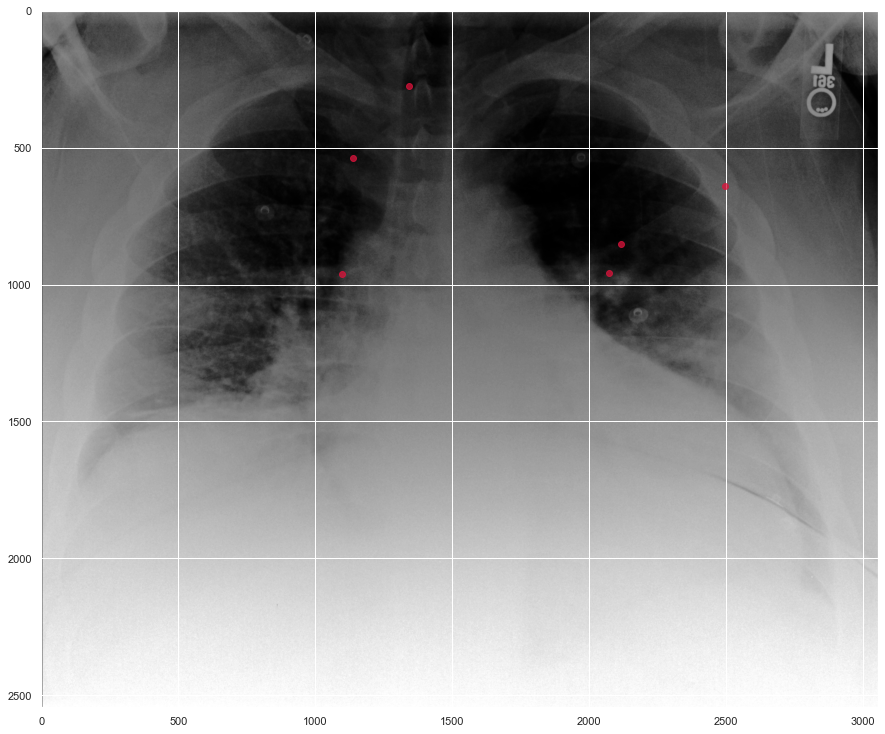

In [155]:
from PIL import Image

im = Image.open(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\CXR-JPG\s56611517\748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475.jpg')
width, height = im.size
data = image.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\XAMI-MIMIC\patient_12661994\CXR-JPG\s56611517\748991dc-fb330cd1-fc203d00-b89b5ccb-7995b475.jpg')

plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    plt.plot(x_coordinates[i], y_coordinates[i], marker='o', color='crimson', alpha=0.75)
plt.imshow(data, cmap='gray')
plt.show()

## Correlation Matrix between common words and Bounding Boxes

### Normal Pathology

In [156]:
words_normal_cor_df = pd.concat([words_normal.loc[words_normal['phrase'] == 'normal'], words_normal.loc[words_normal['phrase'] == 'clear']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'soft']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'effusion']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'completely']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'calcifications']])
words_normal_cor_df = pd.concat([words_normal_cor_df, words_normal.loc[words_normal['phrase'] == 'degeneration']])

aux_df = pd.DataFrame(words_normal_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

Bounding Box EyeGaze Area out of Bounding Boxes                             \
phrase                                    clear completely effusion normal   
Count                                         1         10        6     19   

Bounding Box EyeGaze      cardiac silhouette                                \
phrase               soft     calcifications clear completely degeneration   
Count                  17                  3    13          2           11   

Bounding Box EyeGaze                       left clavicle                   \
phrase               effusion normal soft calcifications clear completely   
Count                       5     99    5              3    10          1   

Bounding Box EyeGaze                      left costophrenic angle  \
phrase               effusion normal soft                    soft   
Count                       4     28   11                       1   

Bounding Box EyeGaze left hilar structures                    \
phrase                      calcifications clear normal soft   
Count                                    6    13     41    1   

Bounding Box EyeGaze left lower lung zone                                  \
phrase                              clear completely effusion normal soft   
Count                                  16          1       24     16    5   

Bounding Box EyeGaze left lung                 left mid lung zone             \
phrase                   clear completely soft              clear completely   
Count                        1          1    2                 17          1   

Bounding Box EyeGaze                 left upper lung zone                    \
phrase               effusion normal                clear completely normal   
Count                       1      8                   20          1      7   

Bounding Box EyeGaze      right clavicle                                    \
phrase               soft          clear degeneration effusion normal soft   
Count                   1             12            3        1     18    5   

Bounding Box EyeGaze right costophrenic angle                  \
phrase                             completely effusion normal   
Count                                       1        1      1   

Bounding Box EyeGaze right hilar structures                               \
phrase                                clear degeneration effusion normal   
Count                                     9            7        1     43   

Bounding Box EyeGaze right lower lung zone                                  \
phrase                               clear completely effusion normal soft   
Count                                   17          6       18     22    2   

Bounding Box EyeGaze right lung      right mid lung zone                    \
phrase                   normal soft               clear completely normal   
Count                         2    5                  27          3     14   

Bounding Box EyeGaze      right upper lung zone                         \
phrase               soft                 clear completely normal soft   
Count                   1                    28          1     10    2   

Bounding Box EyeGaze trachea             upper mediastinum                     \
phrase                 clear normal soft    calcifications clear degeneration   
Count                      3      9    5                18     8            5   

Bounding Box EyeGaze                       
phrase               effusion normal soft  
Count                       1    124    1

In [157]:
aux_dict = aux_df.to_dict()
columns_names = list(aux_dict.keys())
cor_matrix_df_normal = pd.DataFrame(columns=columns_names)
cor_matrix_df_normal

for i in range(len(columns_names)):
    aux_array = np.zeros(len(columns_names), dtype=int)
    aux_array[i] = aux_dict[columns_names[i]]['Count']
    cor_matrix_df_normal.loc[i] = aux_array

cor_matrix_df_normal[''] = columns_names
cor_matrix_df_normal.set_index('', inplace=True)

cor_matrix_df_normal = cor_matrix_df_normal.astype(int)

In [158]:
cor_matrix_df_normal

(Area out of Bounding Boxes, clear)  \
                                                                                
(Area out of Bounding Boxes, clear)                                         1   
(Area out of Bounding Boxes, completely)                                    0   
(Area out of Bounding Boxes, effusion)                                      0   
(Area out of Bounding Boxes, normal)                                        0   
(Area out of Bounding Boxes, soft)                                          0   
(cardiac silhouette, calcifications)                                        0   
(cardiac silhouette, clear)                                                 0   
(cardiac silhouette, completely)                                            0   
(cardiac silhouette, degeneration)                                          0   
(cardiac silhouette, effusion)                                              0   
(cardiac silhouette, normal)                                                0   
(cardiac silhouette, soft)                                                  0   
(left clavicle, calcifications)                                             0   
(left clavicle, clear)                                                      0   
(left clavicle, completely)                                                 0   
(left clavicle, effusion)                                                   0   
(left clavicle, normal)                                                     0   
(left clavicle, soft)                                                       0   
(left costophrenic angle, soft)                                             0   
(left hilar structures, calcifications)                                     0   
(left hilar structures, clear)                                              0   
(left hilar structures, normal)                                             0   
(left hilar structures, soft)                                               0   
(left lower lung zone, clear)                                               0   
(left lower lung zone, completely)                                          0   
(left lower lung zone, effusion)                                            0   
(left lower lung zone, normal)                                              0   
(left lower lung zone, soft)                                                0   
(left lung, clear)                                                          0   
(left lung, completely)                                                     0   
(left lung, soft)                                                           0   
(left mid lung zone, clear)                                                 0   
(left mid lung zone, completely)                                            0   
(left mid lung zone, effusion)                                              0   
(left mid lung zone, normal)                                                0   
(left upper lung zone, clear)                                               0   
(left upper lung zone, completely)                                          0   
(left upper lung zone, normal)                                              0   
(left upper lung zone, soft)                                                0   
(right clavicle, clear)                                                     0   
(right clavicle, degeneration)                                              0   
(right clavicle, effusion)                                                  0   
(right clavicle, normal)                                                    0   
(right clavicle, soft)                                                      0   
(right costophrenic angle, completely)                                      0   
(right costophrenic angle, effusion)                                        0   
(right costophrenic angle, normal)                                          0   
(right hilar structures, clear)                                          

In [159]:
corrM = cor_matrix_df_normal.corr()
corrM

(Area out of Bounding Boxes, clear)  \
(Area out of Bounding Boxes, clear)                                  1.000000   
(Area out of Bounding Boxes, completely)                            -0.013514   
(Area out of Bounding Boxes, effusion)                              -0.013514   
(Area out of Bounding Boxes, normal)                                -0.013514   
(Area out of Bounding Boxes, soft)                                  -0.013514   
(cardiac silhouette, calcifications)                                -0.013514   
(cardiac silhouette, clear)                                         -0.013514   
(cardiac silhouette, completely)                                    -0.013514   
(cardiac silhouette, degeneration)                                  -0.013514   
(cardiac silhouette, effusion)                                      -0.013514   
(cardiac silhouette, normal)                                        -0.013514   
(cardiac silhouette, soft)                                          -0.013514   
(left clavicle, calcifications)                                     -0.013514   
(left clavicle, clear)                                              -0.013514   
(left clavicle, completely)                                         -0.013514   
(left clavicle, effusion)                                           -0.013514   
(left clavicle, normal)                                             -0.013514   
(left clavicle, soft)                                               -0.013514   
(left costophrenic angle, soft)                                     -0.013514   
(left hilar structures, calcifications)                             -0.013514   
(left hilar structures, clear)                                      -0.013514   
(left hilar structures, normal)                                     -0.013514   
(left hilar structures, soft)                                       -0.013514   
(left lower lung zone, clear)                                       -0.013514   
(left lower lung zone, completely)                                  -0.013514   
(left lower lung zone, effusion)                                    -0.013514   
(left lower lung zone, normal)                                      -0.013514   
(left lower lung zone, soft)                                        -0.013514   
(left lung, clear)                                                  -0.013514   
(left lung, completely)                                             -0.013514   
(left lung, soft)                                                   -0.013514   
(left mid lung zone, clear)                                         -0.013514   
(left mid lung zone, completely)                                    -0.013514   
(left mid lung zone, effusion)                                      -0.013514   
(left mid lung zone, normal)                                        -0.013514   
(left upper lung zone, clear)                                       -0.013514   
(left upper lung zone, completely)                                  -0.013514   
(left upper lung zone, normal)                                      -0.013514   
(left upper lung zone, soft)                                        -0.013514   
(right clavicle, clear)                                             -0.013514   
(right clavicle, degeneration)                                      -0.013514   
(right clavicle, effusion)                                          -0.013514   
(right clavicle, normal)                                            -0.013514   
(right clavicle, soft)                                              -0.013514   
(right costophrenic angle, completely)                              -0.013514   
(right costophrenic angle, effusion)                                -0.013514   
(right costophrenic angle, normal)                                  -0.013514   
(right hilar structures, clear)                                     -0.013514   
(right hilar structures, degeneration)                              -0.01

<AxesSubplot:>

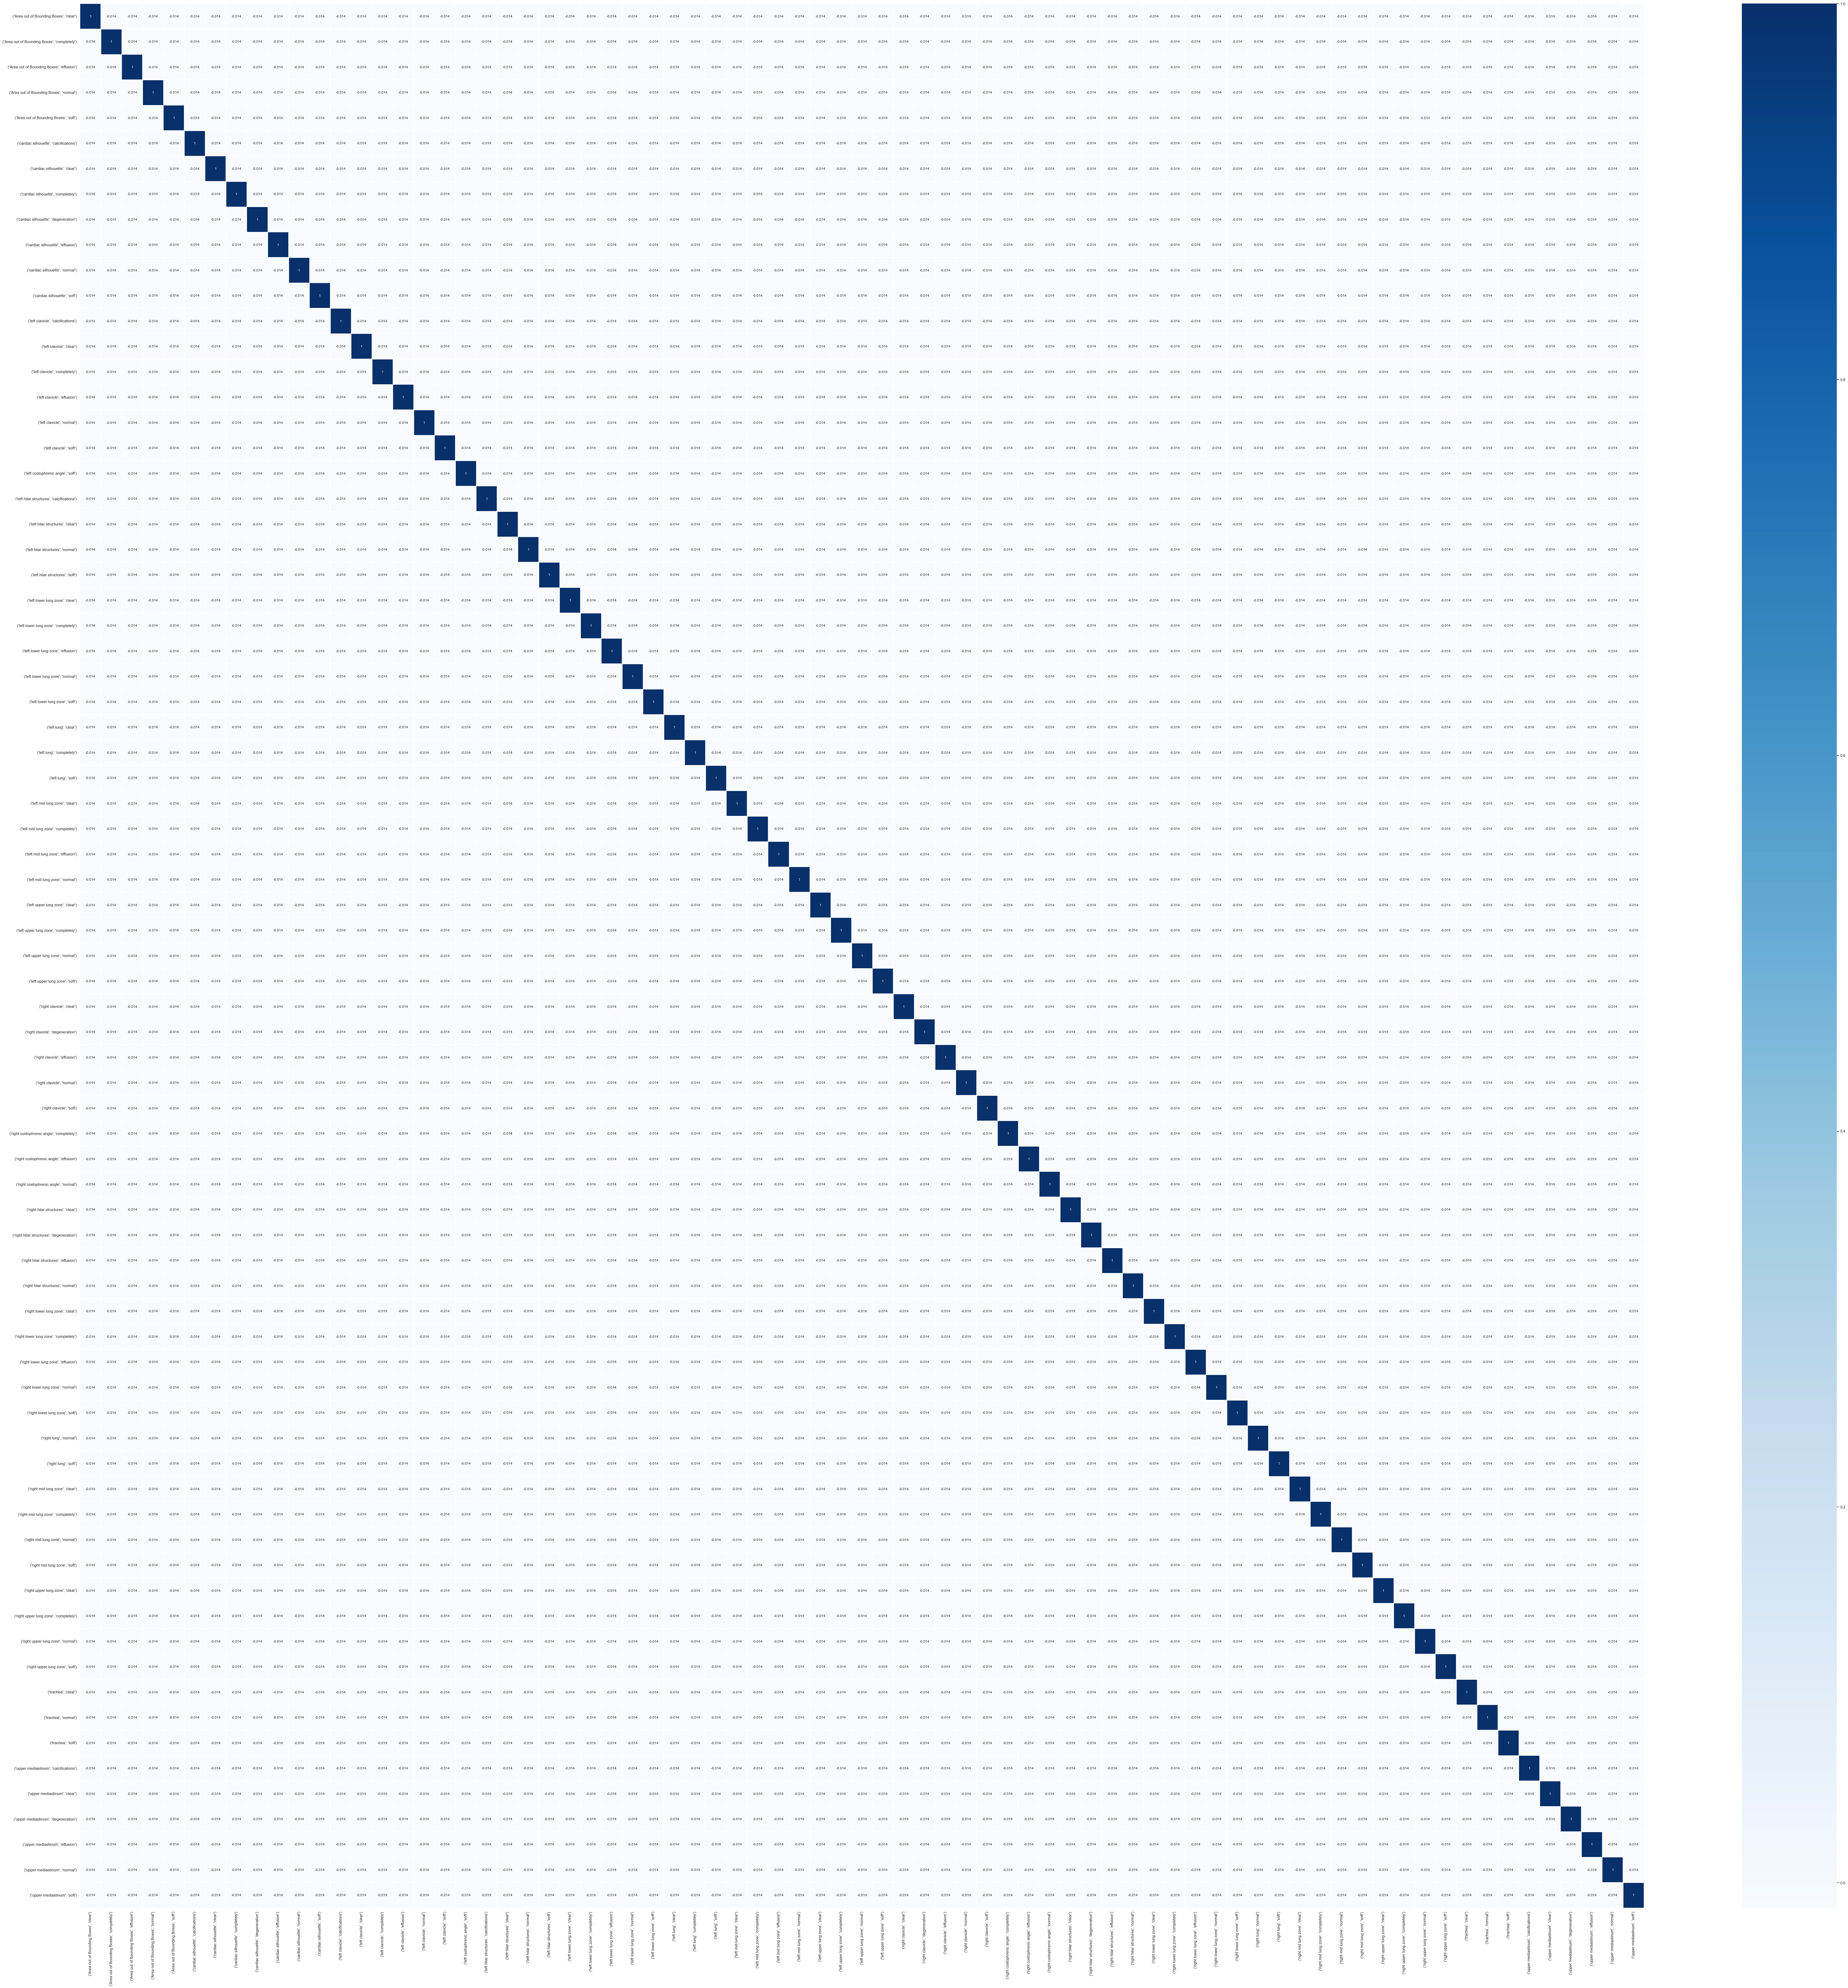

In [160]:
corr = cor_matrix_df_normal.corr()
f, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

In [161]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

normal_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_lung_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_lung_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([trachea_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
normal_cor_matrix_df = pd.concat([normal_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
normal_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(normal_cor_matrix_df)):
    for j in range(len(normal_cor_matrix_df.columns)):
        if normal_cor_matrix_df.iloc[i,j] != 0:
            normal_cor_matrix_df.iloc[i,j] = int(normal_cor_matrix_df.iloc[i,j]['Count'])

normal_cor_matrix_df = normal_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
normal_cor_matrix_df['Bounding Box'] = bounding_boxes
normal_cor_matrix_df.set_index('Bounding Box', inplace= True)

In [162]:
normal_cor_matrix_df

calcifications  clear  completely  degeneration  \
Bounding Box                                                                 
Cardiac Silhouette                      3     13           2            11   
Left Clavicle                           3     10           1             0   
Left Costophrenic Angle                 0      0           0             0   
Left Hilar Structures                   6     13           0             0   
Left Lower Lung Zones                   0     16           1             0   
Left Lung                               0      1           1             0   
Left Mid Lung Zone                      0     17           1             0   
Left Upper Lung Zone                    0     20           1             0   
Right Clavicle                          0     12           0             3   
Right Costophrenic Angle                0      0           1             0   
Right Hilar Structures                  0      9           0             7   
Right Lower Lung Zone                   0     17           6             0   
Right Lung                              0      0           0             0   
Right Mid Lung Zone                     0     27           3             0   
Right Upper Lung Zone                   0     28           1             0   
Trachea                                 0      3           0             0   
Upper Mediastinum                      18      8           0             5   
Area Out of Boundin Boxes               0      1          10             0   

                           effusion  normal  soft  
Bounding Box                                       
Cardiac Silhouette                5      99     5  
Left Clavicle                     4      28    11  
Left Costophrenic Angle           0       0     1  
Left Hilar Structures             0      41     1  
Left Lower Lung Zones            24      16     5  
Left Lung                         0       0     2  
Left Mid Lung Zone                1       8     0  
Left Upper Lung Zone              0       7     1  
Right Clavicle                    1      18     5  
Right Costophrenic Angle          1       1     0  
Right Hilar Structures            1      43     0  
Right Lower Lung Zone            18      22     2  
Right Lung                        0       2     5  
Right Mid Lung Zone               0      14     1  
Right Upper Lung Zone             0      10     2  
Trachea                           0       9     5  
Upper Mediastinum                 1     124     1  
Area Out of Boundin Boxes         6      19    17

<AxesSubplot:xlabel='Bounding Box', ylabel='Bounding Box'>

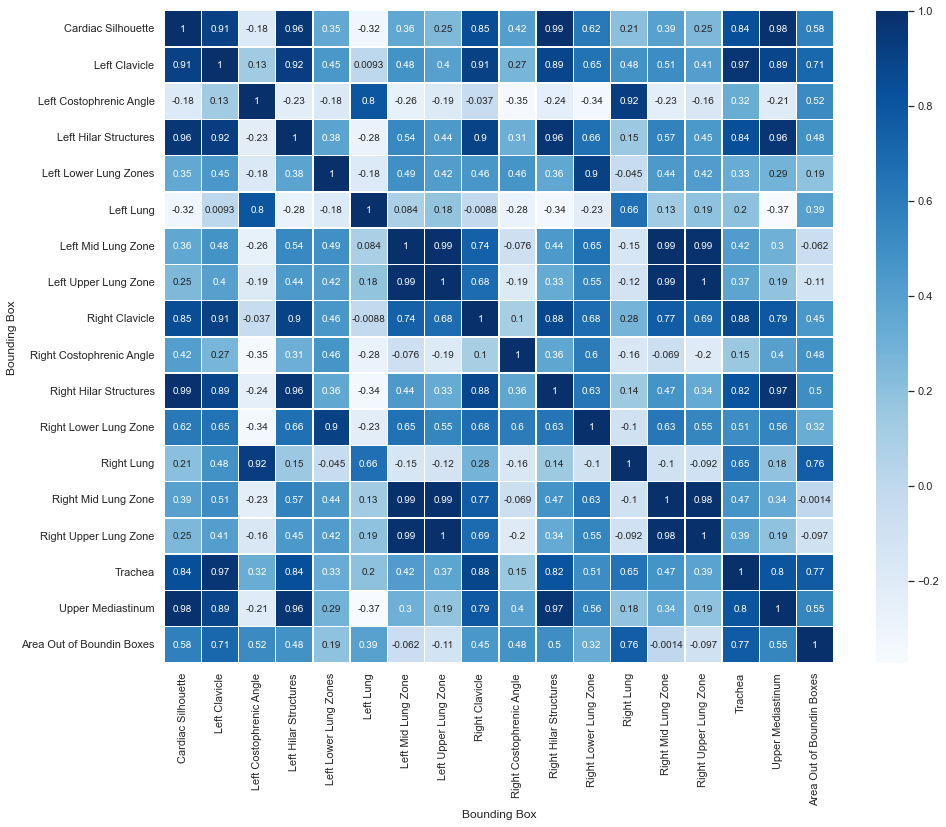

In [163]:
corr = normal_cor_matrix_df.T.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

In [164]:
corrM = normal_cor_matrix_df.T.corr()
corrM

Bounding Box               Cardiac Silhouette  Left Clavicle  \
Bounding Box                                                   
Cardiac Silhouette                   1.000000       0.908199   
Left Clavicle                        0.908199       1.000000   
Left Costophrenic Angle             -0.184339       0.129619   
Left Hilar Structures                0.960380       0.924407   
Left Lower Lung Zones                0.349770       0.450897   
Left Lung                           -0.324124       0.009340   
Left Mid Lung Zone                   0.357156       0.475061   
Left Upper Lung Zone                 0.247592       0.396836   
Right Clavicle                       0.845474       0.908029   
Right Costophrenic Angle             0.415087       0.274963   
Right Hilar Structures               0.991621       0.888008   
Right Lower Lung Zone                0.617477       0.648702   
Right Lung                           0.210190       0.483555   
Right Mid Lung Zone                  0.392931       0.511686   
Right Upper Lung Zone                0.253947       0.410806   
Trachea                              0.837377       0.971413   
Upper Mediastinum                    0.984678       0.888257   
Area Out of Boundin Boxes            0.581207       0.708794   

Bounding Box               Left Costophrenic Angle  Left Hilar Structures  \
Bounding Box                                                                
Cardiac Silhouette                       -0.184339               0.960380   
Left Clavicle                             0.129619               0.924407   
Left Costophrenic Angle                   1.000000              -0.226324   
Left Hilar Structures                    -0.226324               1.000000   
Left Lower Lung Zones                    -0.175295               0.375674   
Left Lung                                 0.800641              -0.279860   
Left Mid Lung Zone                       -0.263042               0.538001   
Left Upper Lung Zone                     -0.186628               0.440944   
Right Clavicle                           -0.036515               0.898501   
Right Costophrenic Angle                 -0.353553               0.308216   
Right Hilar Structures                   -0.241825               0.962859   
Right Lower Lung Zone                    -0.340728               0.656905   
Right Lung                                0.921132               0.150565   
Right Mid Lung Zone                      -0.230748               0.570646   
Right Upper Lung Zone                    -0.163555               0.446483   
Trachea                                   0.323498               0.837910   
Upper Mediastinum                        -0.208953               0.963409   
Area Out of Boundin Boxes                 0.518545               0.480106   

Bounding Box               Left Lower Lung Zones  Left Lung  \
Bounding Box                                                  
Cardiac Silhouette                      0.349770  -0.324124   
Left Clavicle                           0.450897   0.009340   
Left Costophrenic Angle                -0.175295   0.800641   
Left Hilar Structures                   0.375674  -0.279860   
Left Lower Lung Zones                   1.000000  -0.184012   
Left Lung                              -0.184012   1.000000   
Left Mid Lung Zone                      0.493738   0.084241   
Left Upper Lung Zone                    0.419017   0.183382   
Right Clavicle                          0.456951  -0.008771   
Right Costophrenic Angle                0.463674  -0.283069   
Right Hilar Structures                  0.356711  -0.342699   
Right Lower Lung Zone                   0.904116  -0.227869   
Right Lung                             -0.044853   0.663747   
Right Mid Lung Zone                     0.439499   0.128350   
Right Upper Lung Zone                   0.422624   0.194969   
Trachea                                 0.325544   0.198571   
Upper Mediastinum                       0.28

### CHF Pathology

In [165]:
words_chf_cor_df = pd.concat([words_chf.loc[words_chf['phrase'] == 'effusion'], words_chf.loc[words_chf['phrase'] == 'prominent']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'cardiomegaly']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'small']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'opacity']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'edema']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'atelectasis']])
words_chf_cor_df = pd.concat([words_chf_cor_df, words_chf.loc[words_chf['phrase'] == 'calcifications']])


aux_df = pd.DataFrame(words_chf_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

Bounding Box EyeGaze Area out of Bounding Boxes                              \
phrase                              atelectasis cardiomegaly edema effusion   
Count                                         5            1     3       19   

Bounding Box EyeGaze                         cardiac silhouette  \
phrase               opacity prominent small        atelectasis   
Count                      1         1    13                 18   

Bounding Box EyeGaze                                                     \
phrase               calcifications cardiomegaly edema effusion opacity   
Count                             6           88    16       22      20   

Bounding Box EyeGaze                  left clavicle                           \
phrase               prominent small calcifications edema effusion prominent   
Count                       55    16              7     1        1         3   

Bounding Box EyeGaze left costophrenic angle                               \
phrase                           atelectasis edema effusion opacity small   
Count                                      4     1       21       1     4   

Bounding Box EyeGaze left hilar structures                                    \
phrase                         atelectasis calcifications cardiomegaly edema   
Count                                    2             20           32     7   

Bounding Box EyeGaze                                  left lower lung zone  \
phrase               effusion opacity prominent small          atelectasis   
Count                       3       3        17     2                   15   

Bounding Box EyeGaze                                                      \
phrase               cardiomegaly edema effusion opacity prominent small   
Count                           2     7       44       8         2    24   

Bounding Box EyeGaze left lung          left mid lung zone                 \
phrase                   edema effusion        atelectasis calcifications   
Count                        1        2                  6              1   

Bounding Box EyeGaze                                         \
phrase               edema effusion opacity prominent small   
Count                    6        5       7         6     1   

Bounding Box EyeGaze left upper lung zone                                      \
phrase                        atelectasis cardiomegaly edema effusion opacity   
Count                                   3            1     5        2       5   

Bounding Box EyeGaze           right clavicle                         \
phrase               prominent   cardiomegaly edema effusion opacity   
Count                       10              2     2        6       2   

Bounding Box EyeGaze                 right costophrenic angle               \
phrase               prominent small              atelectasis cardiomegaly   
Count                        3     2                        2            1   

Bounding Box EyeGaze                right hilar structures                 \
phrase               effusion small            atelectasis calcifications   
Count                      13     7                      6              2   

Bounding Box EyeGaze                                                      \
phrase               cardiomegaly edema effusion opacity prominent small   
Count                           7    19        3       9        13     1   

Bounding Box EyeGaze right lower lung zone                              \
phrase                         atelectasis cardiomegaly edema effusion   
Count                                   21            3     8       44   

Bounding Box EyeGaze                right lung       right mid lung zone  \
phrase               opacity small atelectasis small         atelectasis   
Count                     18    41           1     1                   8   

Bounding Box EyeGaze                                         \
phrase               edema effusion opacity prominent small   

In [166]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

chf_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_lung_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_lung_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([trachea_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
chf_cor_matrix_df = pd.concat([chf_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
chf_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(chf_cor_matrix_df)):
    for j in range(len(chf_cor_matrix_df.columns)):
        if chf_cor_matrix_df.iloc[i,j] != 0:
            chf_cor_matrix_df.iloc[i,j] = int(chf_cor_matrix_df.iloc[i,j]['Count'])

chf_cor_matrix_df = chf_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
chf_cor_matrix_df['Bounding Box'] = bounding_boxes
chf_cor_matrix_df.set_index('Bounding Box', inplace= True)

In [167]:
chf_cor_matrix_df

atelectasis  calcifications  cardiomegaly  edema  \
Bounding Box                                                                  
Cardiac Silhouette                  18               6            88     16   
Left Clavicle                        0               7             0      1   
Left Costophrenic Angle              4               0             0      1   
Left Hilar Structures                2              20            32      7   
Left Lower Lung Zones               15               0             2      7   
Left Lung                            0               0             0      1   
Left Mid Lung Zone                   6               1             0      6   
Left Upper Lung Zone                 3               0             1      5   
Right Clavicle                       0               0             2      2   
Right Costophrenic Angle             2               0             1      0   
Right Hilar Structures               6               2             7     19   
Right Lower Lung Zone               21               0             3      8   
Right Lung                           1               0             0      0   
Right Mid Lung Zone                  8               0             0      5   
Right Upper Lung Zone                4               0             0      5   
Trachea                              0               0             5      2   
Upper Mediastinum                    0              49            23      9   
Area Out of Boundin Boxes            5               0             1      3   

                           effusion  opacity  prominent  small  
Bounding Box                                                    
Cardiac Silhouette               22       20         55     16  
Left Clavicle                     1        0          3      0  
Left Costophrenic Angle          21        1          0      4  
Left Hilar Structures             3        3         17      2  
Left Lower Lung Zones            44        8          2     24  
Left Lung                         2        0          0      0  
Left Mid Lung Zone                5        7          6      1  
Left Upper Lung Zone              2        5         10      0  
Right Clavicle                    6        2          3      2  
Right Costophrenic Angle         13        0          0      7  
Right Hilar Structures            3        9         13      1  
Right Lower Lung Zone            44       18          0     41  
Right Lung                        0        0          0      1  
Right Mid Lung Zone              18       15          3     10  
Right Upper Lung Zone             4        3         13      1  
Trachea                           0        1          2      0  
Upper Mediastinum                 1        3         27      4  
Area Out of Boundin Boxes        19        1          1     13

<AxesSubplot:>

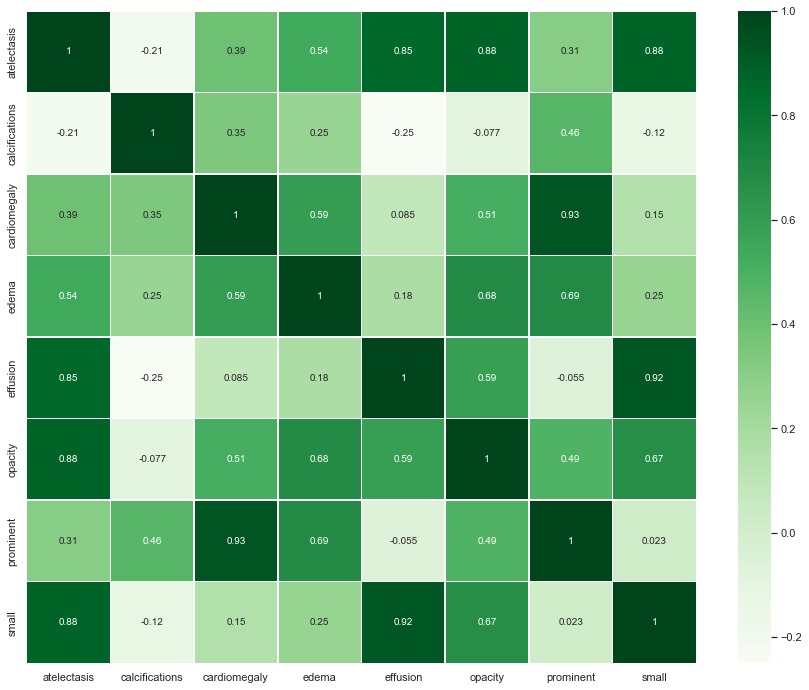

In [168]:
corr = chf_cor_matrix_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Greens", annot=True, linewidths=.5)

In [169]:
corrM = chf_cor_matrix_df.corr()
corrM

atelectasis  calcifications  cardiomegaly     edema  effusion  \
atelectasis        1.000000       -0.214139      0.392789  0.536459  0.853572   
calcifications    -0.214139        1.000000      0.345427  0.250010 -0.250337   
cardiomegaly       0.392789        0.345427      1.000000  0.594990  0.084707   
edema              0.536459        0.250010      0.594990  1.000000  0.176473   
effusion           0.853572       -0.250337      0.084707  0.176473  1.000000   
opacity            0.877005       -0.077315      0.511675  0.683756  0.586927   
prominent          0.307191        0.464233      0.934617  0.692171 -0.054834   
small              0.879384       -0.119264      0.152418  0.254102  0.924188   

                 opacity  prominent     small  
atelectasis     0.877005   0.307191  0.879384  
calcifications -0.077315   0.464233 -0.119264  
cardiomegaly    0.511675   0.934617  0.152418  
edema           0.683756   0.692171  0.254102  
effusion        0.586927  -0.054834  0.924188  
opacity         1.000000   0.485403  0.668074  
prominent       0.485403   1.000000  0.022740  
small           0.668074   0.022740  1.000000

### Pneumonia Patholgoy

In [170]:
words_pneumonia_cor_df = pd.concat([words_pneumonia.loc[words_pneumonia['phrase'] == 'normal'], words_pneumonia.loc[words_pneumonia['phrase'] == 'opacity']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'effusion']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'clear']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'atelectasis']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'patchy']])
words_pneumonia_cor_df = pd.concat([words_pneumonia_cor_df, words_pneumonia.loc[words_pneumonia['phrase'] == 'pneumothorax']])



aux_df = pd.DataFrame(words_pneumonia_cor_df.groupby(['Bounding Box EyeGaze', 'phrase'])['Count'].sum()).T
aux_df

Bounding Box EyeGaze Area out of Bounding Boxes                                \
phrase                              atelectasis clear effusion normal opacity   
Count                                         1     5       13      5       1   

Bounding Box EyeGaze                     cardiac silhouette                 \
phrase               patchy pneumothorax        atelectasis clear effusion   
Count                     1            3                  9    14       19   

Bounding Box EyeGaze                       left clavicle                 \
phrase               normal opacity patchy   atelectasis clear effusion   
Count                    61      31     15             1     6        1   

Bounding Box EyeGaze                                     \
phrase               normal opacity patchy pneumothorax   
Count                     5       2      1           15   

Bounding Box EyeGaze left costophrenic angle          left hilar structures  \
phrase                           atelectasis effusion           atelectasis   
Count                                      2       10                     1   

Bounding Box EyeGaze                                                    \
phrase               clear effusion normal opacity patchy pneumothorax   
Count                    2        2     37       6      5            1   

Bounding Box EyeGaze left lower lung zone                                \
phrase                        atelectasis clear effusion normal opacity   
Count                                  25    10       25      6      16   

Bounding Box EyeGaze                       left lung               \
phrase               patchy pneumothorax atelectasis pneumothorax   
Count                     8            2           1            1   

Bounding Box EyeGaze left mid lung zone                                       \
phrase                      atelectasis clear effusion normal opacity patchy   
Count                                 4    17        4      8      10      3   

Bounding Box EyeGaze              left upper lung zone                        \
phrase               pneumothorax          atelectasis clear effusion normal   
Count                           1                    4    15        2      4   

Bounding Box EyeGaze                             right clavicle        \
phrase               opacity patchy pneumothorax    atelectasis clear   
Count                      5      3            3              1     4   

Bounding Box EyeGaze                                              \
phrase               effusion normal opacity patchy pneumothorax   
Count                       7      8       6      1           17   

Bounding Box EyeGaze right costophrenic angle          right hilar structures  \
phrase                            atelectasis effusion            atelectasis   
Count                                       3       11                      5   

Bounding Box EyeGaze                                                    \
phrase               clear effusion normal opacity patchy pneumothorax   
Count                    7        5     13      14     11            1   

Bounding Box EyeGaze right lower lung zone                                \
phrase                         atelectasis clear effusion normal opacity   
Count                                   21    10       37     10      29   

Bounding Box EyeGaze                      right lung                 \
phrase               patchy pneumothorax atelectasis clear effusion   
Count                    15            5           2     1        2   

Bounding Box EyeGaze              right mid lung zone                        \
phrase               pneumothorax         atelectasis clear effusion normal   
Count                           1                  12    14        5      7   

Bounding Box EyeGaze                             right upper lung zone        \
phrase               opacity patchy pneumothorax           atelectasis clear   
Count  

In [171]:
cardiac_silhouette_dict = aux_df['cardiac silhouette'].to_dict()
left_clavicle_dict = aux_df['left clavicle'].to_dict()
left_costophrenic_angle_dict = aux_df['left costophrenic angle'].to_dict()
left_hilar_structures_dict = aux_df['left hilar structures'].to_dict()
left_lower_lung_zones_dict = aux_df['left lower lung zone'].to_dict()
left_lung_dict = aux_df['left lung'].to_dict()
left_mid_lung_zone_dict = aux_df['left mid lung zone'].to_dict()
left_upper_zone_dict = aux_df['left upper lung zone'].to_dict()
right_clavicle_dict = aux_df['right clavicle'].to_dict()
right_costophrenic_angle_dict = aux_df['right costophrenic angle'].to_dict()
right_hilar_dict = aux_df['right hilar structures'].to_dict()
right_lower_lung_zone_dict = aux_df['right lower lung zone'].to_dict()
right_lung_dict = aux_df['right lung'].to_dict()
right_mid_lung_zone_dict = aux_df['right mid lung zone'].to_dict()
right_upper_lung_zone_dict = aux_df['right upper lung zone'].to_dict()
trachea_dict = aux_df['trachea'].to_dict()
upper_mediatinum_dict = aux_df['upper mediastinum'].to_dict()
area_out_of_bb_dict = aux_df['Area out of Bounding Boxes'].to_dict()

pneumonia_cor_matrix_df = pd.DataFrame([cardiac_silhouette_dict])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_clavicle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_costophrenic_angle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_hilar_structures_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_lower_lung_zones_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_lung_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_mid_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([left_upper_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_clavicle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_costophrenic_angle_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_hilar_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_lower_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_lung_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_mid_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([right_upper_lung_zone_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([trachea_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([upper_mediatinum_dict])])
pneumonia_cor_matrix_df = pd.concat([pneumonia_cor_matrix_df, pd.DataFrame([area_out_of_bb_dict])])
pneumonia_cor_matrix_df.fillna(0, inplace=True)


for i in range(len(pneumonia_cor_matrix_df)):
    for j in range(len(pneumonia_cor_matrix_df.columns)):
        if pneumonia_cor_matrix_df.iloc[i,j] != 0:
            pneumonia_cor_matrix_df.iloc[i,j] = int(pneumonia_cor_matrix_df.iloc[i,j]['Count'])

pneumonia_cor_matrix_df = pneumonia_cor_matrix_df.astype(int)

bounding_boxes = ['Cardiac Silhouette', 'Left Clavicle', 'Left Costophrenic Angle', 'Left Hilar Structures', 'Left Lower Lung Zones', 'Left Lung', 'Left Mid Lung Zone', 'Left Upper Lung Zone', 'Right Clavicle', 'Right Costophrenic Angle', 'Right Hilar Structures', 'Right Lower Lung Zone', 'Right Lung', 'Right Mid Lung Zone', 'Right Upper Lung Zone', 'Trachea', 'Upper Mediastinum', 'Area Out of Boundin Boxes']
pneumonia_cor_matrix_df['Bounding Box'] = bounding_boxes
pneumonia_cor_matrix_df.set_index('Bounding Box', inplace= True)

In [172]:
pneumonia_cor_matrix_df

atelectasis  clear  effusion  normal  opacity  \
Bounding Box                                                               
Cardiac Silhouette                   9     14        19      61       31   
Left Clavicle                        1      6         1       5        2   
Left Costophrenic Angle              2      0        10       0        0   
Left Hilar Structures                1      2         2      37        6   
Left Lower Lung Zones               25     10        25       6       16   
Left Lung                            1      0         0       0        0   
Left Mid Lung Zone                   4     17         4       8       10   
Left Upper Lung Zone                 4     15         2       4        5   
Right Clavicle                       1      4         7       8        6   
Right Costophrenic Angle             3      0        11       0        0   
Right Hilar Structures               5      7         5      13       14   
Right Lower Lung Zone               21     10        37      10       29   
Right Lung                           2      1         2       0        0   
Right Mid Lung Zone                 12     14         5       7       23   
Right Upper Lung Zone                3     10         0       4       15   
Trachea                              0      0         0       5        0   
Upper Mediastinum                    2      4         1      55        5   
Area Out of Boundin Boxes            1      5        13       5        1   

                           patchy  pneumothorax  
Bounding Box                                     
Cardiac Silhouette             15             0  
Left Clavicle                   1            15  
Left Costophrenic Angle         0             0  
Left Hilar Structures           5             1  
Left Lower Lung Zones           8             2  
Left Lung                       0             1  
Left Mid Lung Zone              3             1  
Left Upper Lung Zone            3             3  
Right Clavicle                  1            17  
Right Costophrenic Angle        0             0  
Right Hilar Structures         11             1  
Right Lower Lung Zone          15             5  
Right Lung                      0             1  
Right Mid Lung Zone            10             3  
Right Upper Lung Zone           7             2  
Trachea                         0             5  
Upper Mediastinum               8             2  
Area Out of Boundin Boxes       1             3

<AxesSubplot:>

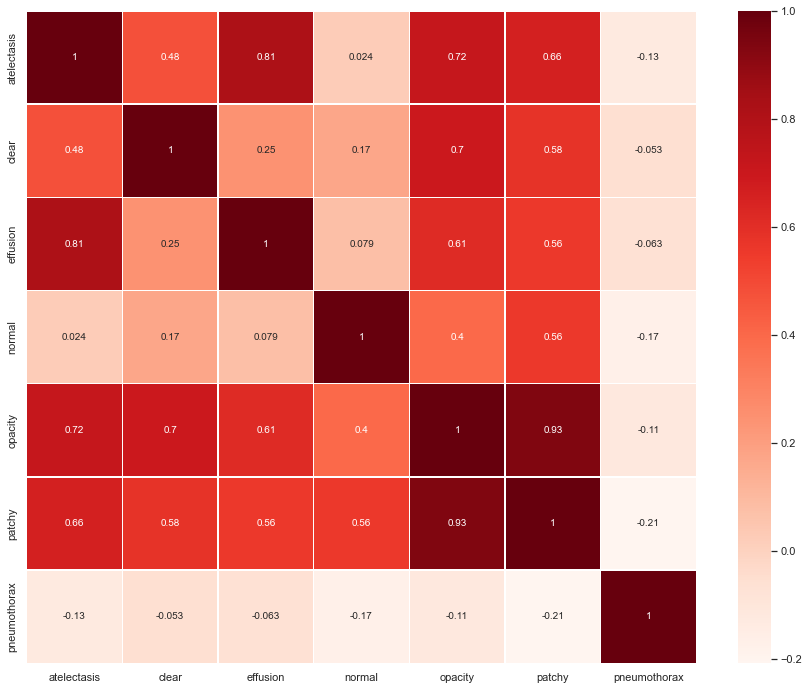

In [173]:
corr = pneumonia_cor_matrix_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, cmap="Reds", annot=True, linewidths=.5)

In [174]:
corrM = chf_cor_matrix_df.corr()
corrM

atelectasis  calcifications  cardiomegaly     edema  effusion  \
atelectasis        1.000000       -0.214139      0.392789  0.536459  0.853572   
calcifications    -0.214139        1.000000      0.345427  0.250010 -0.250337   
cardiomegaly       0.392789        0.345427      1.000000  0.594990  0.084707   
edema              0.536459        0.250010      0.594990  1.000000  0.176473   
effusion           0.853572       -0.250337      0.084707  0.176473  1.000000   
opacity            0.877005       -0.077315      0.511675  0.683756  0.586927   
prominent          0.307191        0.464233      0.934617  0.692171 -0.054834   
small              0.879384       -0.119264      0.152418  0.254102  0.924188   

                 opacity  prominent     small  
atelectasis     0.877005   0.307191  0.879384  
calcifications -0.077315   0.464233 -0.119264  
cardiomegaly    0.511675   0.934617  0.152418  
edema           0.683756   0.692171  0.254102  
effusion        0.586927  -0.054834  0.924188  
opacity         1.000000   0.485403  0.668074  
prominent       0.485403   1.000000  0.022740  
small           0.668074   0.022740  1.000000

## Transform Bounding Boxes into ABCDEFGHI Map

### Assignin into Fixation Points Dataset

In [175]:
abcdefghi_dict = {'left lung' : 'B', 
'right lung' : 'B', 
'left upper lung zone' : 'F', 
'right upper lung zone' : 'F', 
'left mid lung zone' : 'F', 
'right mid lung zone' : 'F', 
'left lower lung zone' : 'DF', 
'right lower lung zone' : 'DF', 
'trachea' : 'A', 
'upper mediastinum' : 'H', 
'right hilar structures' : 'H', 
'left hilar structures' : 'H', 
'right costophrenic angle' : 'E', 
'left costophrenic angle' : 'E', 
'right clavicle' : 'AB', 
'left clavicle' : 'AB', 
'cardiac silhouette' : 'CG',
'Area out of Bounding Boxes' : 'A'}

In [176]:
output_fixations_bb_df['ABCDEFGHI'] = 0

for i in range(len(output_fixations_bb_df)):
    aux = output_fixations_bb_df['Bounding Box'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    output_fixations_bb_df['ABCDEFGHI'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\177921238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_fixations_bb_df['ABCDEFGHI'].iloc[i] = aux_2


In [177]:
for i in range(len(output_fixations_bb_df)):
    aux = output_fixations_bb_df['Bounding Box'].iloc[i]
    if aux == 'right upper lung zone' or aux == 'right mid lung zone' or aux == 'right lower lung zone':
        output_fixations_bb_df['Bounding Box'].iloc[i] = 'right lung'
    if aux == 'left upper lung zone' or aux == 'left mid lung zone' or aux == 'left lower lung zone':
        output_fixations_bb_df['Bounding Box'].iloc[i] = 'left lung'

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1164920862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_fixations_bb_df['Bounding Box'].iloc[i] = 'right lung'
C:\Users\User\AppData\Local\Temp\ipykernel_24324\1164920862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_fixations_bb_df['Bounding Box'].iloc[i] = 'left lung'


In [178]:
output_fixations_bb_df.head(3)

Unnamed: 0.1  Unnamed: 0  SESSION_ID  MEDIA_ID  \
0             0           0           1         0   
1             1           1           1         0   
2             2           2           1         0   

                                       DICOM_ID  CNT  Time (in secs)  \
0  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b   45         0.72363   
1  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b   68         1.09607   
2  1a3f39ce-ebe90275-9a66145a-af03360e-ee3b163b   86         1.38690   

   TIMETICK(f=10000000)    FPOGX    FPOGY    FPOGS    FPOGD  FPOGID  FPOGV  \
0          696216388878  0.45224  0.33879  0.01794  0.70569       2      1   
1          696220113269  0.44419  0.28933  0.73987  0.35620       3      1   
2          696223021482  0.39018  0.28168  1.11212  0.27478       4      1   

     BPOGX    BPOGY  BPOGV     LPCX     LPCY       LPD      LPS  LPV     RPCX  \
0  0.46134  0.26619      1  0.37859  0.59430  18.33718  1.05276    1  0.63790   
1  0.37864  0.21775      1  0.37749  0.59400  17.92645  1.06068    1  0.63670   
2  0.38154  0.43718      1  0.37654  0.59767  18.14363  1.00879    1  0.63485   

      RPCY       RPD      RPS  RPV  BKID  BKDUR  BKPMIN     LPMM  LPMMV  \
0  0.59798  18.19434  1.06068    1     0    0.0      20  3.50648      1   
1  0.59809  18.35567  1.06859    1     0    0.0      19  3.73376      1   
2  0.60175  19.20525  1.00879    1     0    0.0      19  3.65403      1   

      RPMM  RPMMV  SACCADE_MAG  SACCADE_DIR  VID_FRAME  X_ORIGINAL  \
0  3.56681      1      0.00000      0.00000        0.0         998   
1  3.77511      1     55.60791    106.13765        0.0         952   
2  3.87832      1    104.02783    175.44470        0.0         642   

   Y_ORIGINAL       Bounding Box  Fixation Point Number  Count ABCDEFGHI  
0        1035  upper mediastinum                      1      1         H  
1         884  upper mediastinum                      2      1         H  
2         860         right lung                      3      1         F

In [179]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Output_Fixations_bb_df.xlsx', engine='xlsxwriter')
output_fixations_bb_df.to_excel(writer, sheet_name='Output Fixation Points with bb')
writer.save()

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1026297397.py:3: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


### Assigning ABCEDEFGH into the words Dataset

##### Normal Pathology

In [180]:
words_normal['ABCDEFGHI'] = 0

for i in range(len(words_normal)):
    aux = words_normal['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_normal['ABCDEFGHI'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2254584774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_normal['ABCDEFGHI'].iloc[i] = aux_2


##### CHF

In [181]:
words_chf['ABCDEFGHI'] = 0

for i in range(len(words_chf)):
    aux = words_chf['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_chf['ABCDEFGHI'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3439331639.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_chf['ABCDEFGHI'].iloc[i] = aux_2


##### Pneumonia

In [182]:
words_pneumonia['ABCDEFGHI'] = 0

for i in range(len(words_pneumonia)):
    aux = words_pneumonia['Bounding Box EyeGaze'].iloc[i]
    aux_2 = abcdefghi_dict[aux]
    words_pneumonia['ABCDEFGHI'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1054463144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_pneumonia['ABCDEFGHI'].iloc[i] = aux_2


## Most talked Zones ABCDEFGHI

In [183]:
normal_words_abcdefghi_count = pd.DataFrame(words_normal.groupby(['ABCDEFGHI'])['Count'].count())
chf_words_abcdefghi_count = pd.DataFrame(words_chf.groupby(['ABCDEFGHI'])['Count'].count())
pneumonia_words_abcdefghi_count = pd.DataFrame(words_pneumonia.groupby(['ABCDEFGHI'])['Count'].count())

In [184]:
df1_styler = normal_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Normal')
df2_styler = chf_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('CHF')
df3_styler = pneumonia_words_abcdefghi_count.reset_index().sort_values(by='Count', ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('Pneumonia')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

Normal 
 
 
   
 ABCDEFGHI 
 Count 
 
 
 
 
 7 
 H 
 1061 
 
 
 3 
 CG 
 504 
 
 
 6 
 F 
 503 
 
 
 4 
 DF 
 497 
 
 
 1 
 AB 
 288 
 
 
 0 
 A 
 266 
 
 
 2 
 B 
 45 
 
 
 5 
 E 
 27 
 
 
 

 
 CHF 
 
 
   
 ABCDEFGHI 
 Count 
 
 
 
 
 7 
 H 
 1586 
 
 
 3 
 CG 
 1433 
 
 
 6 
 F 
 1303 
 
 
 4 
 DF 
 1234 
 
 
 0 
 A 
 407 
 
 
 1 
 AB 
 388 
 
 
 5 
 E 
 244 
 
 
 2 
 B 
 81 
 
 
 

 
 Pneumonia 
 
 
   
 ABCDEFGHI 
 Count 
 
 
 
 
 7 
 H 
 1426 
 
 
 6 
 F 
 1346 
 
 
 4 
 DF 
 1270 
 
 
 3 
 CG 
 1013 
 
 
 1 
 AB 
 406 
 
 
 0 
 A 
 365 
 
 
 5 
 E 
 133 
 
 
 2 
 B 
 58

## New Dataset with silent fixation points

#### Normal Pathology

In [185]:
silence_normal_df = pd.DataFrame()

for i in range(len(normal_dicom_ids)):
    dicom_id = normal_dicom_ids[i]
    aux_df = words_normal.loc[words_normal['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_normal_df = pd.concat([silence_normal_df, final_aux_df], axis=0)

#### CHF Pathology

In [186]:
silence_chf_df = pd.DataFrame()

for i in range(len(chf_dicom_ids)):
    dicom_id = chf_dicom_ids[i]
    aux_df = words_chf.loc[words_chf['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_chf_df = pd.concat([silence_chf_df, final_aux_df], axis=0)

#### Pneumonia Pathology

In [187]:
silence_pneumonia_df = pd.DataFrame()

for i in range(len(pneumonia_dicom_ids)):
    dicom_id = pneumonia_dicom_ids[i]
    aux_df = words_pneumonia.loc[words_pneumonia['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] <= min_time]
    silence_pneumonia_df = pd.concat([silence_pneumonia_df, final_aux_df], axis=0)

### Datasets Extraction

In [188]:
silence_pneumonia_df.head(1)

Unnamed: 0.1  Unnamed: 0  SESSION_ID  MEDIA_ID  \
19916         19916       19916          16        19   

                                           DICOM_ID  CNT  Time (in secs)  \
19916  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120   15         0.24188   

       TIMETICK(f=10000000)    FPOGX    FPOGY  FPOGS    FPOGD  FPOGID  FPOGV  \
19916          296349746607  0.50639  0.58839    0.0  0.24188       1      1   

         BPOGX    BPOGY  BPOGV     LPCX     LPCY       LPD      LPS  LPV  \
19916  0.53508  0.40304      1  0.31789  0.50678  18.98575  0.97437    1   

          RPCX     RPCY      RPD      RPS  RPV  BKID  BKDUR  BKPMIN     LPMM  \
19916  0.60285  0.53374  17.9579  0.96845    1     0    0.0      20  3.55987   

       LPMMV     RPMM  RPMMV  SACCADE_MAG  SACCADE_DIR  VID_FRAME  X_ORIGINAL  \
19916      1  3.20968      1     18.10294    106.64057        0.0        1308   

       Y_ORIGINAL        Bounding Box  Fixation Point Number  Count  
19916        1798  cardiac silhouette                      1      1

In [189]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\disco_silence.xlsx', engine='xlsxwriter')
silence_normal_df.to_excel(writer, sheet_name='Normal')
silence_chf_df.to_excel(writer, sheet_name='CHF')
silence_pneumonia_df.to_excel(writer, sheet_name='Pneumonia')
writer.save()

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2312825440.py:5: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


## New Dataset with reporting fixation points

#### Normal Pathology

In [190]:
report_normal_df = pd.DataFrame()

for i in range(len(normal_dicom_ids)):
    dicom_id = normal_dicom_ids[i]
    aux_df = words_normal.loc[words_normal['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_normal.loc[fp_normal['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_normal_df = pd.concat([report_normal_df, final_aux_df], axis=0)

#### CHF Pathology

In [191]:
report_chf_df = pd.DataFrame()

for i in range(len(chf_dicom_ids)):
    dicom_id = chf_dicom_ids[i]
    aux_df = words_chf.loc[words_chf['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_chf.loc[fp_chf['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_chf_df = pd.concat([report_chf_df, final_aux_df], axis=0)

#### Pneumonia Pathology

In [192]:
report_pneumonia_df = pd.DataFrame()

for i in range(len(pneumonia_dicom_ids)):
    dicom_id = pneumonia_dicom_ids[i]
    aux_df = words_pneumonia.loc[words_pneumonia['dicom_id'] == dicom_id]
    min_time = aux_df['begin_time'].min()
    aux_df2 = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == dicom_id]
    final_aux_df = aux_df2.loc[aux_df2['Time (in secs)'] >= min_time]
    report_pneumonia_df = pd.concat([report_pneumonia_df, final_aux_df], axis=0)

### Datasets Extraction

In [193]:
report_pneumonia_df.head(1)

Unnamed: 0.1  Unnamed: 0  SESSION_ID  MEDIA_ID  \
19919         19919       19919          16        19   

                                           DICOM_ID  CNT  Time (in secs)  \
19919  036000e0-04d69382-0f34cbc2-7b2ed2df-4254b120   91         1.47125   

       TIMETICK(f=10000000)    FPOGX    FPOGY    FPOGS    FPOGD  FPOGID  \
19919          296362040385  0.49316  0.53819  1.13159  0.33966       4   

       FPOGV    BPOGX    BPOGY  BPOGV     LPCX     LPCY       LPD      LPS  \
19919      1  0.49779  0.39383      1  0.31853  0.50032  20.33057  0.96283   

       LPV     RPCX    RPCY       RPD      RPS  RPV  BKID  BKDUR  BKPMIN  \
19919    1  0.60183  0.5258  19.49271  0.97529    1     0    0.0      20   

          LPMM  LPMMV     RPMM  RPMMV  SACCADE_MAG  SACCADE_DIR  VID_FRAME  \
19919  3.84016      1  3.48011      1     34.19648     317.2085        0.0   

       X_ORIGINAL  Y_ORIGINAL        Bounding Box  Fixation Point Number  \
19919        1232        1644  cardiac silhouette                      4   

       Count  
19919      1

In [194]:
writer = pd.ExcelWriter(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\disco_report.xlsx', engine='xlsxwriter')
report_normal_df.to_excel(writer, sheet_name='Normal')
report_chf_df.to_excel(writer, sheet_name='CHF')
report_pneumonia_df.to_excel(writer, sheet_name='Pneumonia')
writer.save()

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1794590407.py:5: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


## DISCO Outputs Studies

### Normal Pathology

19fc9e56-b2cd2486-cbfd7926-ae2d4343-2228e959

In [195]:
id = '47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4'

aux_words_df_case = words_normal.loc[words_normal['dicom_id'] == id]
aux_fp_df_case = fp_normal.loc[fp_normal['DICOM_ID'] == id]

In [196]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Delta'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Mean Pupils Diameter'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [197]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

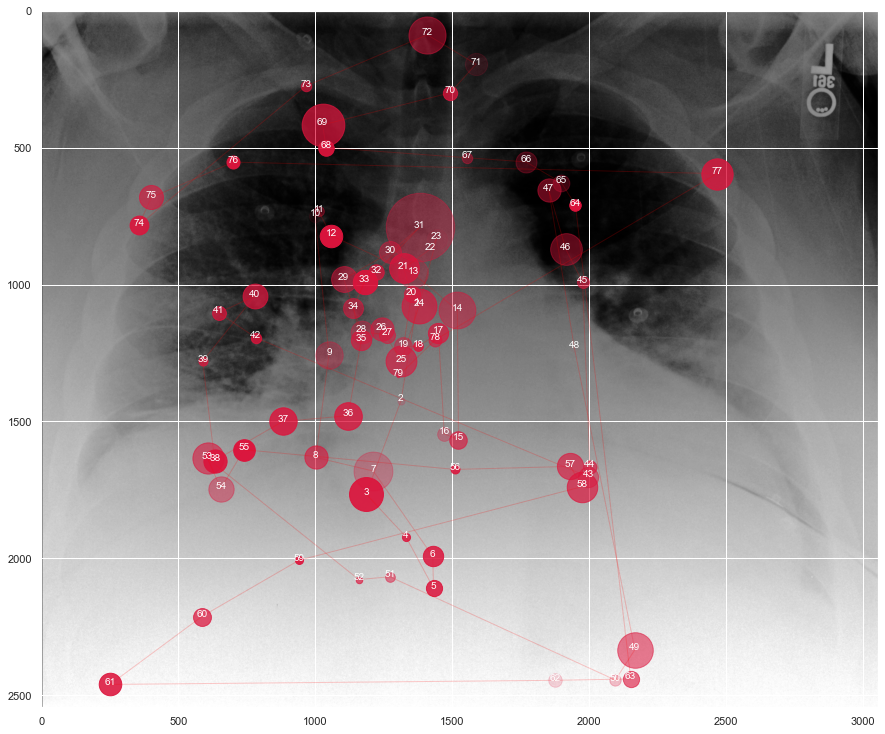

In [198]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
plt.imshow(data, cmap='gray')
plt.show()

In [199]:
aux_words_df_case

begin_time  end_time          phrase  patient_id  \
3648         1.6       2.2          normal    10664252   
3649         2.2       2.8           heart    10664252   
3650         2.8       4.1          aortic    10664252   
3651         4.1       4.5  calcifications    10664252   
3652         9.2       9.8  hyper-inflated    10664252   
3653         9.8      10.0           lungs    10664252   
3655        12.2      12.5           focal    10664252   
3656        12.5      13.0       pulmonary    10664252   
3657        13.0      13.4        opacity,    10664252   
3658        13.4      13.7         pleural    10664252   
3659        13.7      13.8        effusion    10664252   
3661        14.4      14.7    pneumothorax    10664252   

                                          dicom_id    Bounding Box EyeGaze  \
3648  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4      cardiac silhouette   
3649  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4  right hilar structures   
3650  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4          right clavicle   
3651  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4       upper mediastinum   
3652  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4     right mid lung zone   
3653  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4  right hilar structures   
3655  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4      cardiac silhouette   
3656  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4      left mid lung zone   
3657  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4   right lower lung zone   
3658  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4    left lower lung zone   
3659  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4           left clavicle   
3661  47c06bd5-c5bd9b95-c95944eb-7bc01559-a0afeaf4          right clavicle   

      Count ABCDEFGHI  
3648      1        CG  
3649      1         H  
3650      1        AB  
3651      1         H  
3652      1         F  
3653      1         H  
3655      1        CG  
3656      1         F  
3657      1        DF  
3658      1        DF  
3659      1        AB  
3661      1        AB

### CHF

In [200]:
id = '4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7'

aux_words_df_case = words_chf.loc[words_chf['dicom_id'] == id]
aux_fp_df_case = fp_chf.loc[fp_chf['DICOM_ID'] == id]

In [201]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Delta'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Mean Pupils Diameter'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [202]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

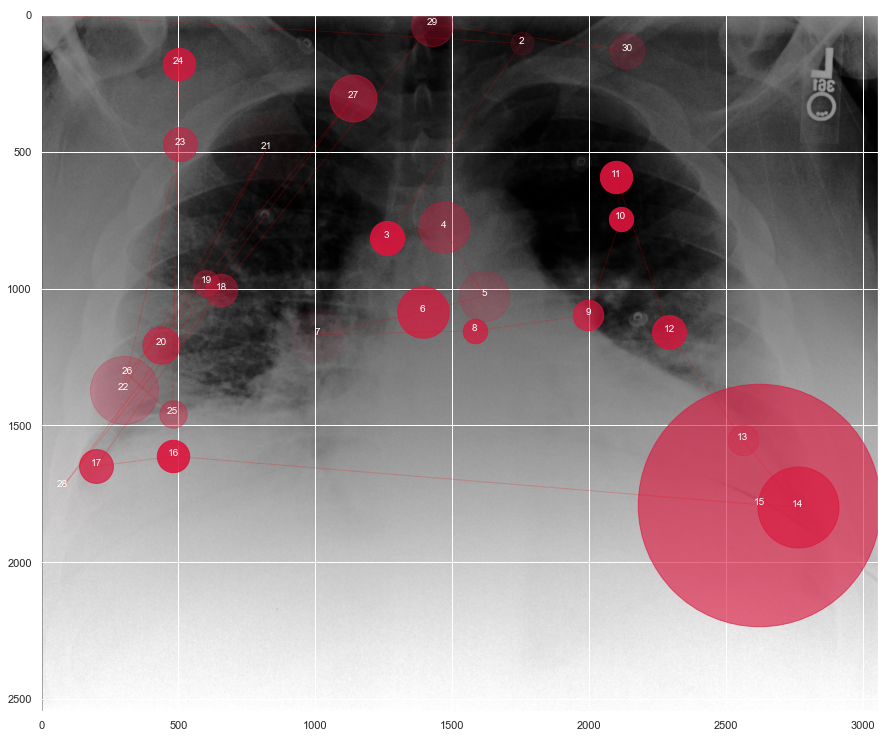

In [203]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=mpd[i])
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=10)
plt.imshow(data, cmap='gray')
plt.show()

In [204]:
aux_words_df_case

begin_time  end_time            phrase  patient_id  \
2659         1.6       1.9            aortic    15325060   
2660         1.9       2.8    calcifications    15325060   
2661         2.8       3.2            normal    15325060   
2662         3.2       3.5             heart    15325060   
2663         3.5       4.1              size    15325060   
2664         4.1       4.4              left    15325060   
2665         4.4       4.5              lung    15325060   
2667         4.7       5.6             clear    15325060   
2668         5.8       6.0              with    15325060   
2670         6.1       6.5             small    15325060   
2671         7.1       7.6     left effusion    15325060   
2672         7.6       9.2          possible    15325060   
2673         9.4       9.6         the right    15325060   
2674         9.6       9.9           lung is    15325060   
2675         9.9      10.9             clear    15325060   
2676        12.0      13.5  with no effusion    15325060   

                                          dicom_id  \
2659  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2660  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2661  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2662  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2663  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2664  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2665  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2667  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2668  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2670  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2671  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2672  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2673  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2674  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2675  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   
2676  4f1cd404-bf4593f7-deb86b7e-f7188c1b-67ed52b7   

            Bounding Box EyeGaze  Count ABCDEFGHI  
2659           upper mediastinum      1         H  
2660       left hilar structures      1         H  
2661           upper mediastinum      1         H  
2662       left hilar structures      1         H  
2663       left hilar structures      1         H  
2664        left upper lung zone      1         F  
2665          left mid lung zone      1         F  
2667        left lower lung zone      1        DF  
2668  Area out of Bounding Boxes      1         A  
2670  Area out of Bounding Boxes      1         A  
2671  Area out of Bounding Boxes      1         A  
2672  Area out of Bounding Boxes      1         A  
2673       right upper lung zone      1         F  
2674         right mid lung zone      1         F  
2675         right mid lung zone      1         F  
2676       right lower lung zone      1        DF

### Pneumonia

In [205]:
id = 'ae569408-62843b41-302c9584-b1d2c34f-641a2a38'

aux_words_df_case = words_pneumonia.loc[words_pneumonia['dicom_id'] == id]
aux_fp_df_case = fp_pneumonia.loc[fp_pneumonia['DICOM_ID'] == id]

In [206]:
aux_fp_df_case['Delta'] = 0.01
aux_fp_df_case['Mean Pupils Diameter'] = 0.01

for i in range(len(aux_fp_df_case)):
    if i==0:
        aux_fp_df_case['Delta'].iloc[i] = aux_fp_df_case['Time (in secs)'].iloc[i]
    if i > 0:
        aux = aux_fp_df_case['Time (in secs)'].iloc[i] - aux_fp_df_case['Time (in secs)'].iloc[i-1]
        aux_fp_df_case['Delta'].iloc[i] = aux

for i in range(len(aux_fp_df_case)):
        aux = (aux_fp_df_case['LPD'].iloc[i] + aux_fp_df_case['RPD'].iloc[i])/2
        aux_fp_df_case['Mean Pupils Diameter'].iloc[i] = aux

C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Delta'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fp_df_case['Mean Pupils Diameter'] = 0.01
C:\Users\User\AppData\Local\Temp\ipykernel_24324\113921408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [207]:
x_coordinates = aux_fp_df_case['X_ORIGINAL'].tolist()
y_coordinates = aux_fp_df_case['Y_ORIGINAL'].tolist()
delta = aux_fp_df_case['Delta'].tolist()
time = aux_fp_df_case['Time (in secs)'].round(3).tolist()
mpd = aux_fp_df_case['Mean Pupils Diameter'].tolist()
mean_mpd = aux_fp_df_case['Mean Pupils Diameter'].mean()
fpn = aux_fp_df_case['Fixation Point Number'].tolist()

cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

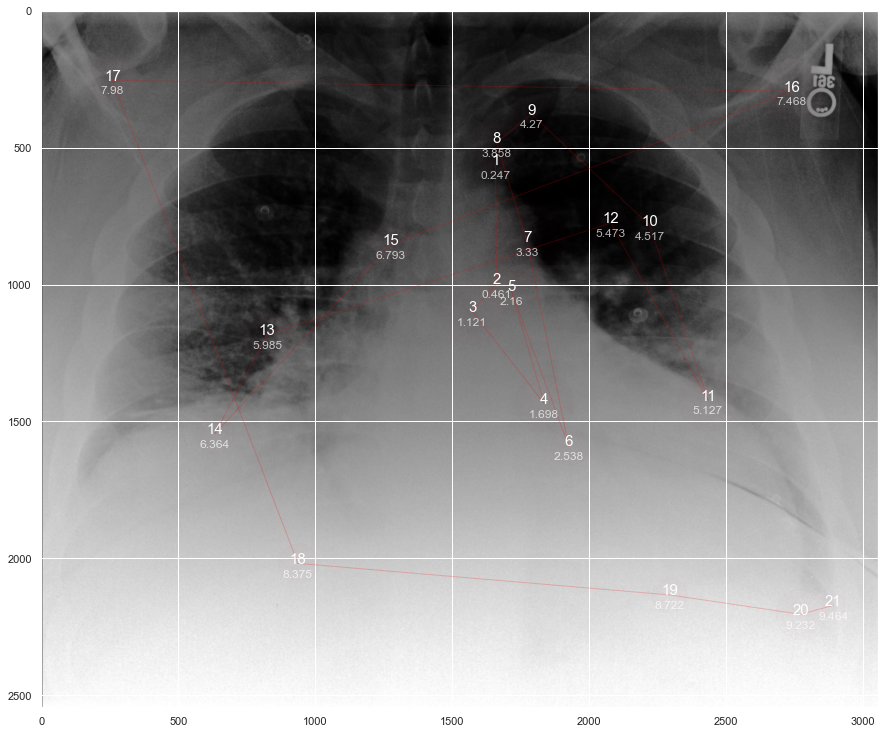

In [208]:
plt.figure(figsize=(15,15))
for i in range(len(x_coordinates)):
    if i+1 < len(x_coordinates):
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=0.01)
        plt.plot([x_coordinates[i], x_coordinates[i+1]], [y_coordinates[i], y_coordinates[i+1]], color='red', linewidth=1, alpha=0.2)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=15)
        plt.text(x_coordinates[i], y_coordinates[i]+50, time[i], horizontalalignment='center', color='white', fontsize=12, alpha=0.7)
    else:
        plt.plot(x_coordinates[i], y_coordinates[i], marker='o', markersize=delta[i]*100, color='crimson', alpha=0.01)
        plt.text(x_coordinates[i], y_coordinates[i], fpn[i], horizontalalignment='center', color='white', fontsize=15)
        plt.text(x_coordinates[i], y_coordinates[i]+50, time[i], horizontalalignment='center', color='white', fontsize=12, alpha=0.7)
plt.imshow(data, cmap='gray')
plt.show()

In [209]:
aux_words_df_case

begin_time end_time       phrase  patient_id  \
1987         2.2      2.6        heart    16040238   
1989         2.7      2.8  mediastinum    16040238   
1990         2.8      3.7   are normal    16040238   
1991         5.6      6.1        lungs    16040238   
1993         6.2      6.5        clear    16040238   
1994         6.5      8.0        bones    16040238   
1996         8.1      8.2         soft    16040238   
1997         8.2      8.6      tissues    16040238   
1998         8.6      9.0       normal    16040238   

                                          dicom_id  \
1987  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1989  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1990  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1991  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1993  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1994  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1996  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1997  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   
1998  ae569408-62843b41-302c9584-b1d2c34f-641a2a38   

            Bounding Box EyeGaze  Count ABCDEFGHI  
1987       left hilar structures      1         H  
1989          cardiac silhouette      1        CG  
1990          cardiac silhouette      1        CG  
1991        left upper lung zone      1         F  
1993         right mid lung zone      1         F  
1994       right lower lung zone      1        DF  
1996  Area out of Bounding Boxes      1         A  
1997  Area out of Bounding Boxes      1         A  
1998       right lower lung zone      1        DF

Casos a analisar:

9a177679-9e809e56-552b0650-230b9dc0-ee2f5a9c (35 fixation points in silence (fps))

679dac0d-77e119c4-8f4116ec-db53ac3a-4e0815fc (23 fps)

f6e7b3c4-188c52e3-18442d6f-f6ba858d-9046339d (18 fps)

3ab16010-f165cfe3-49ef82c4-454a7a92-8010b03c (17 fps)

## Fixation Points Heatmap Experience

In [210]:
#id = '1f2bde4a-e3d626ca-a283d9bd-be3385bd-404c7753'
id = '9a177679-9e809e56-552b0650-230b9dc0-ee2f5a9c'
cxr_image = mpimg.imread(r'F:\DIOGO ALVITO\IST\MECD - Mestrado\2º Ano\Dissertação\Dataset\XAMI-MIMIC\CXR_Images' + '\\' + id + '.jpg')

### Normal

In [211]:
fp_normal['Delta'] = 0.01
fp_normal['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_normal)):
    if fp_normal['Fixation Point Number'].iloc[i] == 1:
        fp_normal['Delta'].iloc[i] = fp_normal['Time (in secs)'].iloc[i]
    else:
        aux = fp_normal['Time (in secs)'].iloc[i] - fp_normal['Time (in secs)'].iloc[i-1]
        fp_normal['Delta'].iloc[i] = aux

for i in range(len(fp_normal)):
        aux = (fp_normal['LPD'].iloc[i] + fp_normal['RPD'].iloc[i])/2
        fp_normal['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_normal['X_ORIGINAL'], Y_ORIGINAL=fp_normal['Y_ORIGINAL'], Delta=fp_normal['Delta'])
aux_df_heatmap.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\173329097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_normal['Delta'].iloc[i] = fp_normal['Time (in secs)'].iloc[i]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\173329097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_normal['Delta'].iloc[i] = aux
C:\Users\User\AppData\Local\Temp\ipykernel_24324\173329097.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_norm

X_ORIGINAL  Y_ORIGINAL    Delta
16900        1473         715  0.04297
16901        1746        1315  0.34521
16902        1249        1432  0.91504

#### Heat Map

In [213]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1080x1080 with 0 Axes>

#### Density Map

##### All points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

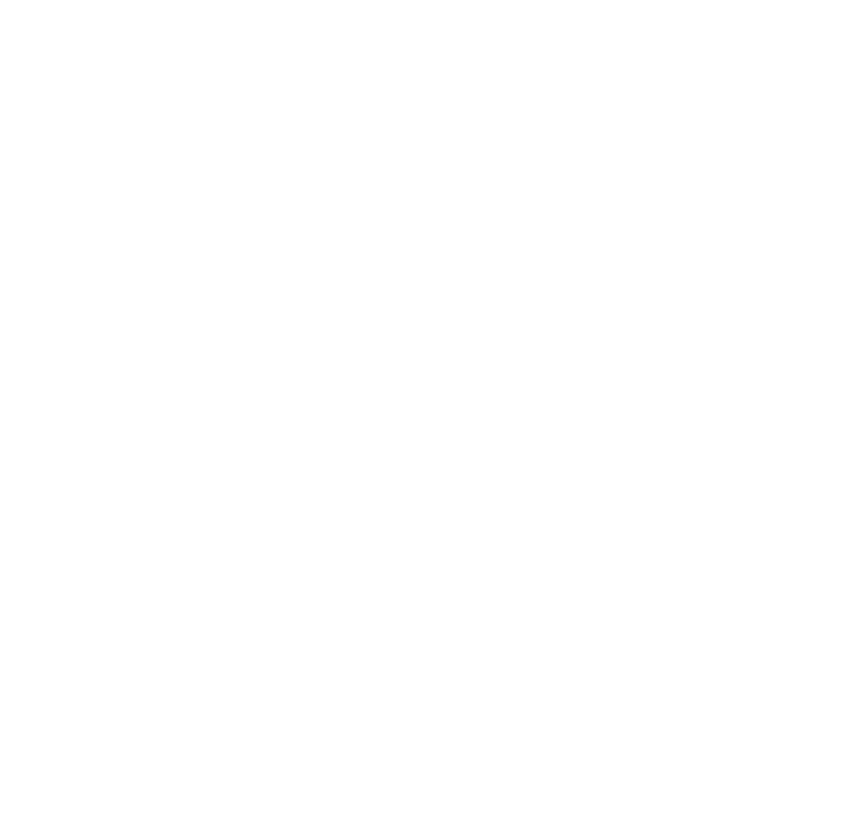

In [214]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(fp_normal.X_ORIGINAL, fp_normal.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Silence Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

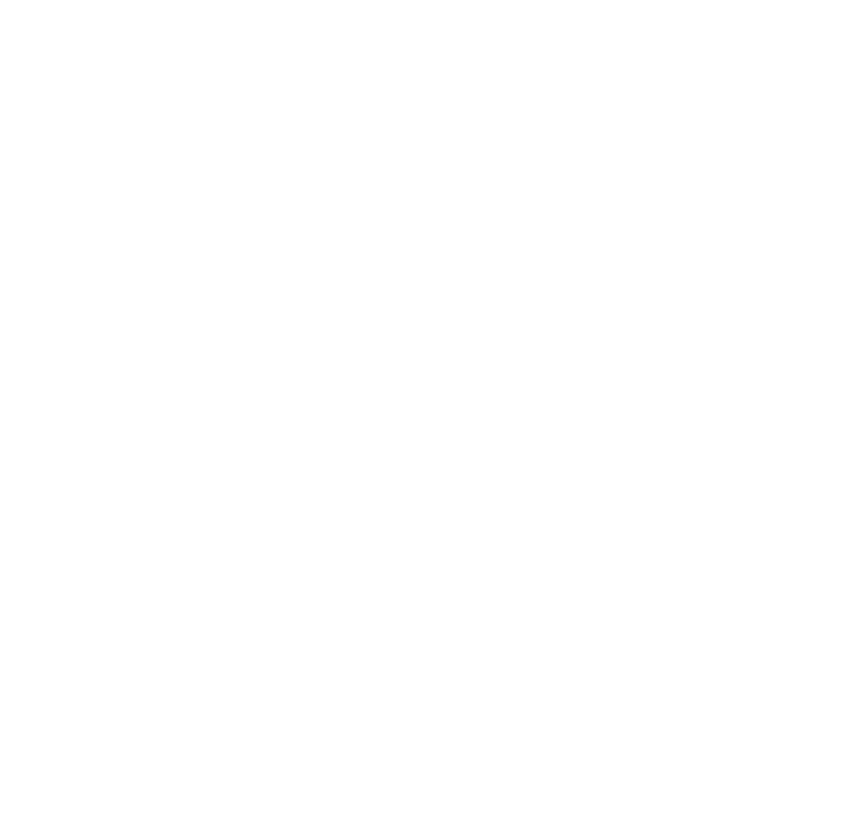

In [215]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_normal_df.X_ORIGINAL, silence_normal_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Report Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

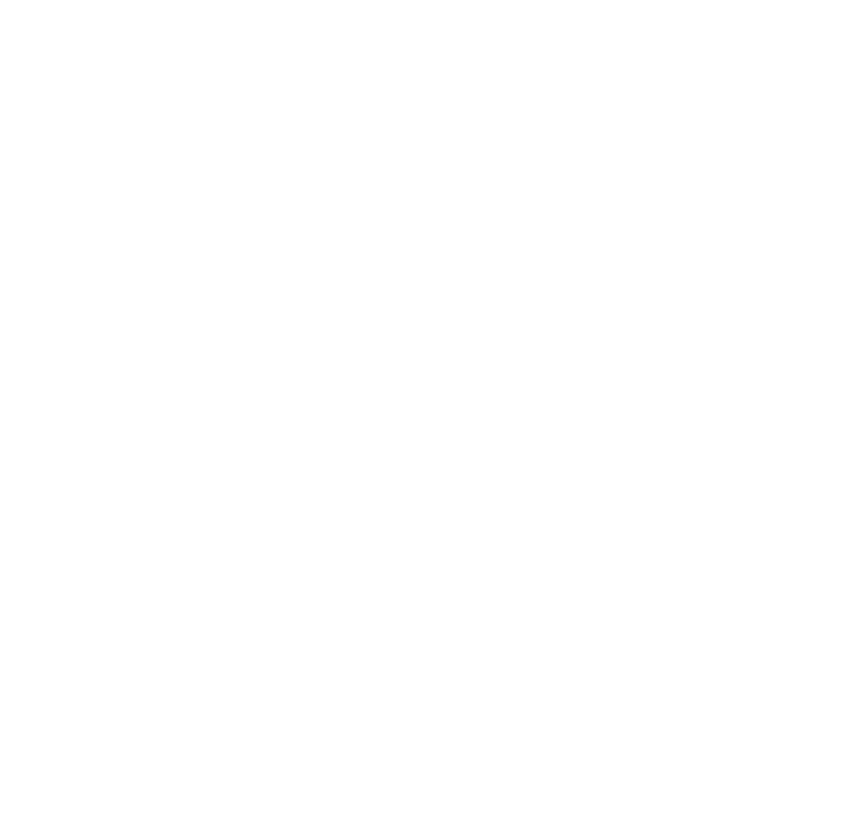

In [216]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_normal_df.X_ORIGINAL, report_normal_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

### CHF

In [217]:
fp_chf['Delta'] = 0.01
fp_chf['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_chf)):
    if fp_chf['Fixation Point Number'].iloc[i] == 1:
        fp_chf['Delta'].iloc[i] = fp_chf['Time (in secs)'].iloc[i]
    else:
        aux = fp_chf['Time (in secs)'].iloc[i] - fp_chf['Time (in secs)'].iloc[i-1]
        fp_chf['Delta'].iloc[i] = aux

for i in range(len(fp_chf)):
        aux = (fp_chf['LPD'].iloc[i] + fp_chf['RPD'].iloc[i])/2
        fp_chf['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_chf['X_ORIGINAL'], Y_ORIGINAL=fp_chf['Y_ORIGINAL'], Delta=fp_chf['Delta'])
aux_df_heatmap.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\840226930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_chf['Delta'].iloc[i] = fp_chf['Time (in secs)'].iloc[i]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\840226930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_chf['Delta'].iloc[i] = aux
C:\Users\User\AppData\Local\Temp\ipykernel_24324\840226930.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_chf['Mean Pup

X_ORIGINAL  Y_ORIGINAL    Delta
16429        1349        1348  0.20215
16430        1363        1351  0.36035
16431        1875        1624  0.40039

#### Heat Map

In [218]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1080x1080 with 0 Axes>

#### Density Map

##### All Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

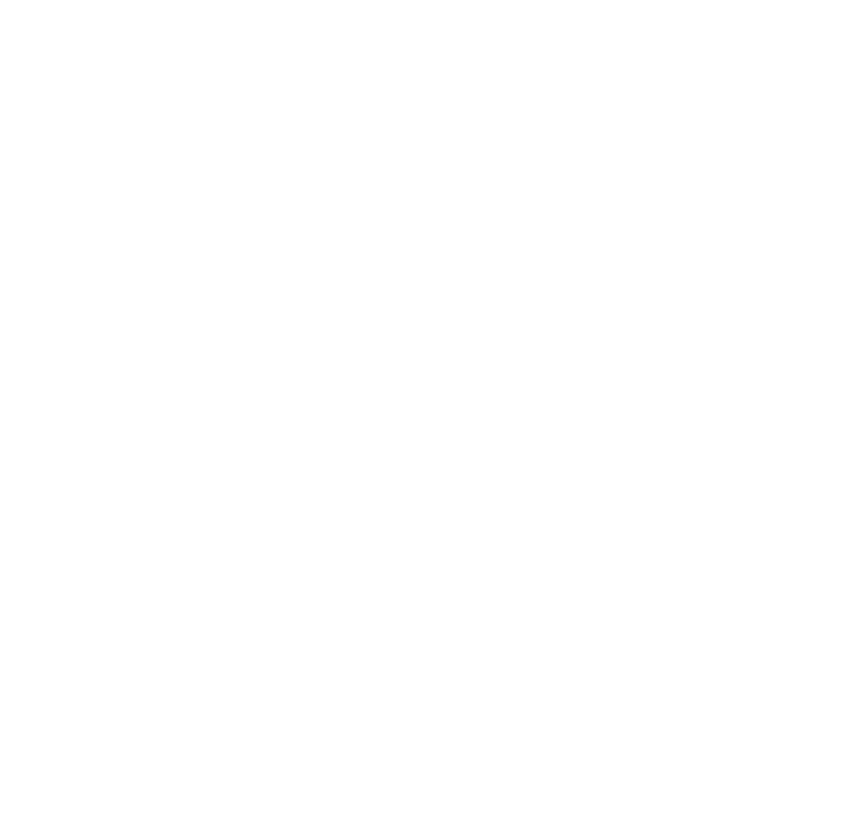

In [219]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Silence Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

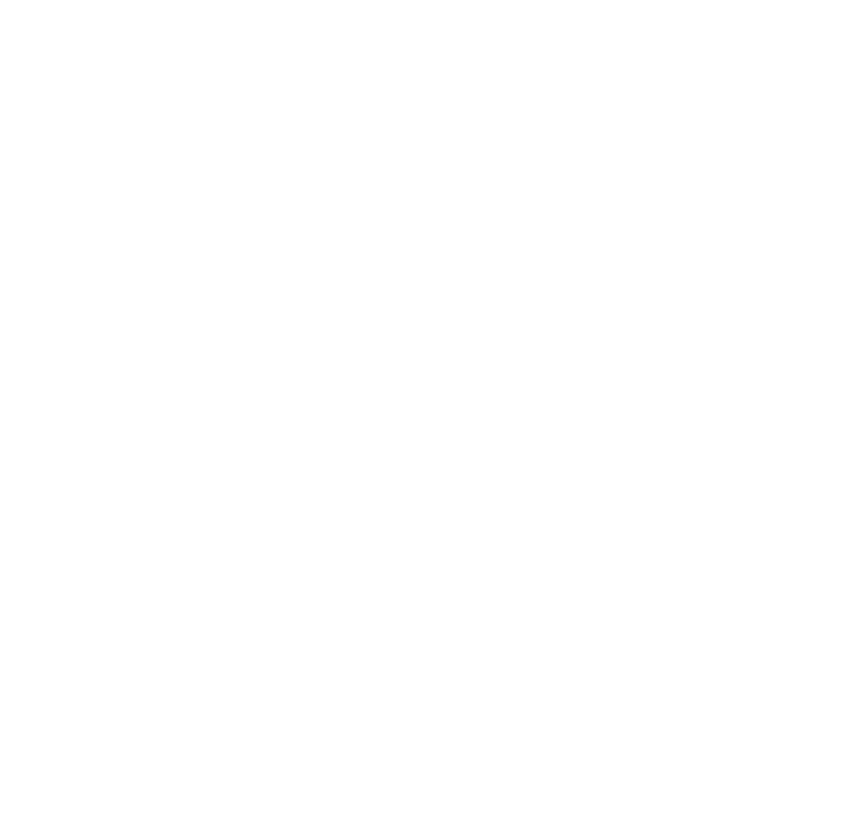

In [220]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_chf_df.X_ORIGINAL, silence_chf_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Report Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

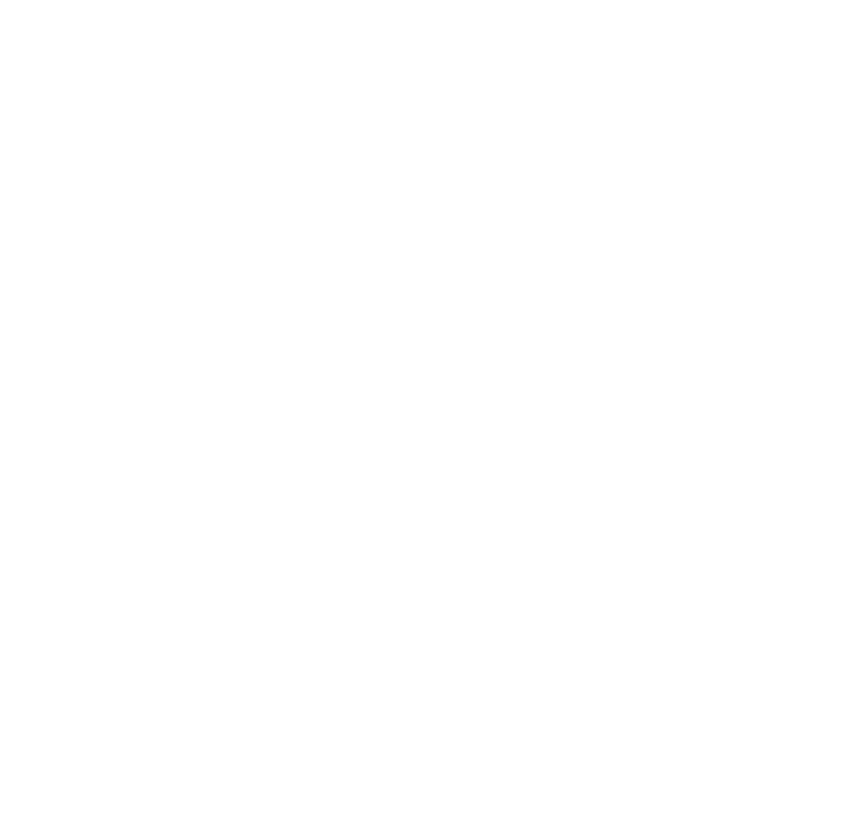

In [221]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_chf_df.X_ORIGINAL, report_chf_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

### Pneumonia

In [222]:
fp_pneumonia['Delta'] = 0.01
fp_pneumonia['Mean Pupils Diameter'] = 0.01

for i in range(len(fp_pneumonia)):
    if fp_pneumonia['Fixation Point Number'].iloc[i] == 1:
        fp_pneumonia['Delta'].iloc[i] = fp_pneumonia['Time (in secs)'].iloc[i]
    else:
        aux = fp_pneumonia['Time (in secs)'].iloc[i] - fp_pneumonia['Time (in secs)'].iloc[i-1]
        fp_pneumonia['Delta'].iloc[i] = aux

for i in range(len(fp_pneumonia)):
        aux = (fp_pneumonia['LPD'].iloc[i] + fp_pneumonia['RPD'].iloc[i])/2
        fp_pneumonia['Mean Pupils Diameter'].iloc[i] = aux


aux_df_heatmap = pd.DataFrame().assign(X_ORIGINAL=fp_pneumonia['X_ORIGINAL'], Y_ORIGINAL=fp_pneumonia['Y_ORIGINAL'], Delta=fp_pneumonia['Delta'])
aux_df_heatmap.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1023797433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_pneumonia['Delta'].iloc[i] = fp_pneumonia['Time (in secs)'].iloc[i]
C:\Users\User\AppData\Local\Temp\ipykernel_24324\1023797433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_pneumonia['Delta'].iloc[i] = aux
C:\Users\User\AppData\Local\Temp\ipykernel_24324\1023797433.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

X_ORIGINAL  Y_ORIGINAL    Delta
19916        1308        1798  0.24188
19917        1315        1345  0.37213
19918        1157        1578  0.50147

#### Heat Map

In [223]:
plt.figure(figsize=(15,15))

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", shade=True, bw=2.5)
hmax.collections[0].set_alpha(0.1)

plt.imshow(cxr_image, cmap='gray')

plt.show()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1080x1080 with 0 Axes>

#### Density Map

##### All points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

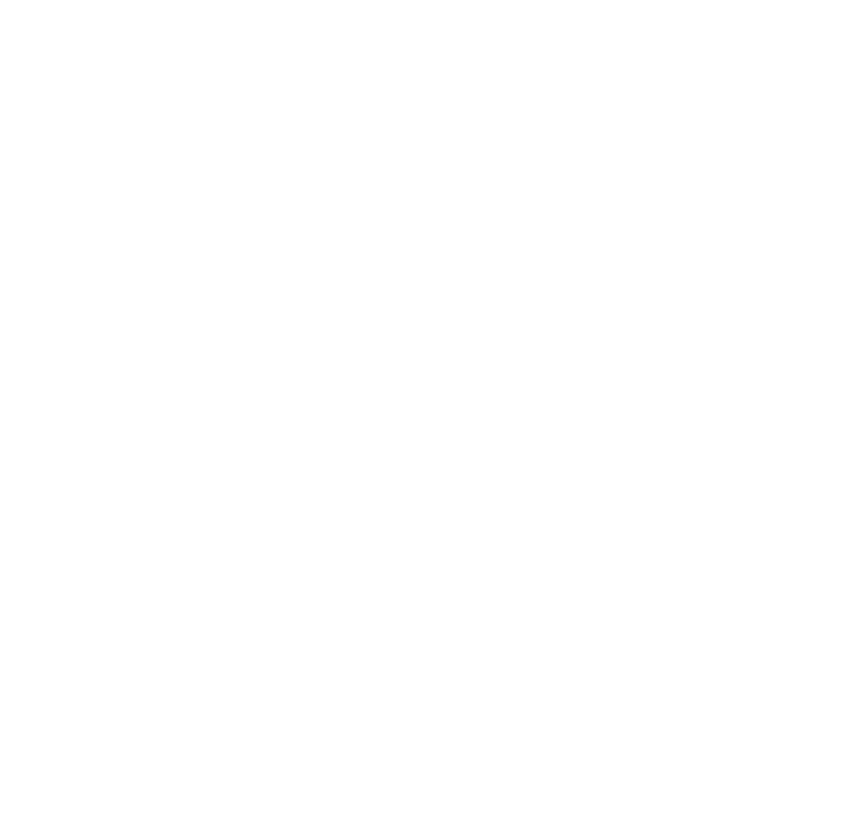

In [224]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(aux_df_heatmap.X_ORIGINAL, aux_df_heatmap.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Silence Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

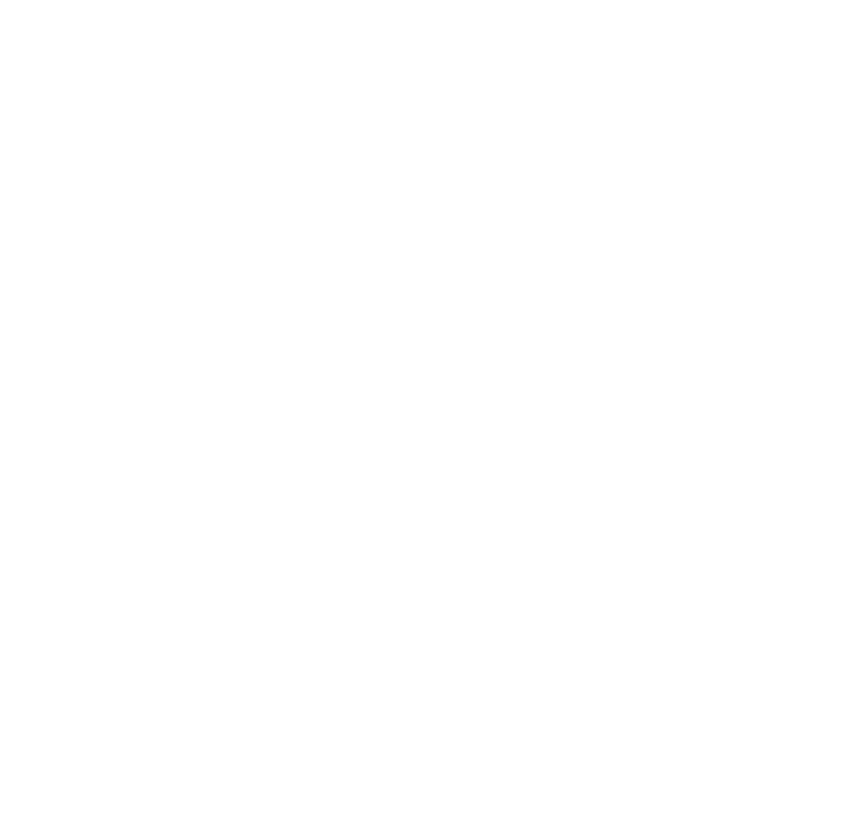

In [225]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(silence_pneumonia_df.X_ORIGINAL, silence_pneumonia_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

##### Report Points

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

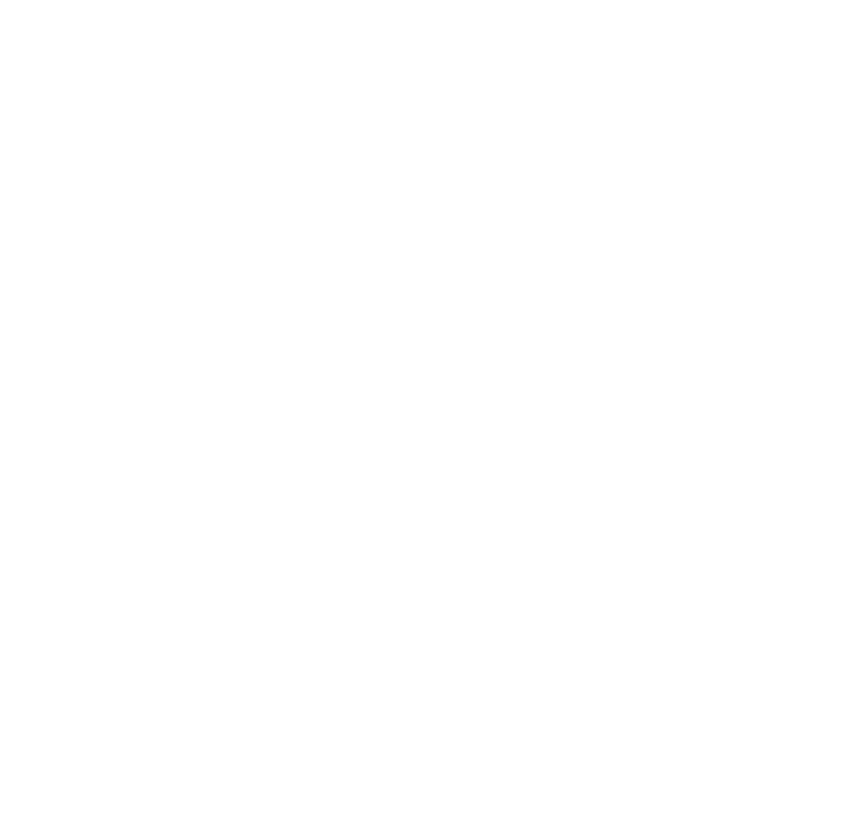

In [226]:
plt.figure(figsize=(15,15))
plt.axis('off')

hmax = sns.kdeplot(report_pneumonia_df.X_ORIGINAL, report_pneumonia_df.Y_ORIGINAL, cmap="Reds", alpha=1)
hmax.collections[0].set_alpha(0)

plt.imshow(cxr_image, cmap='gray')

plt.show()

## State Probabilities | Markov Chain

In [229]:
%load_ext autoreload
%autoreload 2

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.mn2graph as m2g

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'pyAgrum'

### Pneumonia Report Moment

#### Building Markov Network

In [230]:
gum.config.reset() # back to default
mn=gum.fastMN("Cardiac Silhouette--Cardiac Silhouette;Cardiac Silhouette--Clavicle;Cardiac Silhouette--Costophrenic Angle;Cardiac Silhouette--Hilar Structures;Cardiac Silhouette--Lung;Cardiac Silhouette--Mediastinum;Cardiac Silhouette--Trachea;Cardiac Silhouette--AOBB;Clavicle--Clavicle; Clavicle--Hilar Structures;Clavicle--Lung;Clavicle--Mediastinum;Clavicle--Trachea;Clavicle--AOBB;Costophrenic Angle--Costophrenic Angle;Costophrenic Angle--Hilar Structures;Costophrenic Angle--Lung;Costophrenic Angle--AOBB;Hilar Structures--Hilar Structures;Hilar Structures--Lung;Hilar Structures--Mediastinum;Hilar Structures--Trachea;Hilar Structures--AOBB;Lung--Lung;Lung--Mediastinum;Lung--Trachea;Lung--AOBB;Mediastinum--Mediastinum;Mediastinum--Trachea;Mediastinum--AOBB;Trachea--Trachea;Trachea--AOBB;AOBB--AOBB")
mn

NameError: name 'gum' is not defined

In [231]:
gum.config.reset() # back to default
gum.config['factorgraph','edge_length']='0.4'
gnb.showMN(mn)

NameError: name 'gum' is not defined

In [ ]:
gum.config.reset() # back to default
print("Default view for Markov network: "+gum.config['notebook','default_markovnetwork_view'])
gum.config['notebook','default_markovnetwork_view']='graph'
print("modified to: "+gum.config['notebook','default_markovnetwork_view'])
mn

: 

In [ ]:
gnb.sideBySide(gnb.getMN(mn,view="graph",size="5"),
               gnb.getMN(mn,view="factorgraph",size="5"))

: 

In [ ]:
gnb.showMN(mn)
print(mn)

: 

#### Accessors for Markov Network

In [232]:
print(f"nodes       : {mn.nodes()}")
print(f"node names  : {mn.names()}")
print(f"edges       : {mn.edges()}")
print(f"components  : {mn.connectedComponents()}")
print(f"factors     : {mn.factors()}")
print(f"factor() : {mn.factor({4})}")
print(f"factor() : {mn.factor({1,4})}")

NameError: name 'mn' is not defined

## New Markov Chain Experience

### Normal

#### Initialization

In [233]:
# The statespace
states = ["Cardiac Silhouette", "Clavicle", "Costophrenic Angle", "Hilar Structures", "Lung", "Mediastinum", "Trachea", "AOBB"]

# Possible sequences of events
transitionName = [["CSCS","CSC","CSCA","CSHS", "CSL", "CSM", "CST", "CSAOBB"],["CCS","CC","CCA","CHS", "CL", "CM", "CT", "CAOBB"],["CACS","CAC","CACA","CAHS", "CAL", "CAM", "CAT", "CAAOBB"],["HSCS","HSC","HSCA","HSHS", "HSL", "HSM", "HST", "HSAOBB"],["LCS","LC","LCA","LHS", "LL", "LM", "LT", "LAOBB"],["MCS","MSC","MCA","MHS", "ML", "MM", "MT", "MAOBB"],["TCS","TC","TCA","THS", "TL", "TM", "TT", "TAOBB"],["AOBBCS","AOBBC","AOBBCA","AOBBHS", "AOBBL", "AOBBM", "AOBBT", "AOBBAOBB"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.344,0.045,0.001,0.141,0.221,0.171,0.007,0.030],[0.05,0.394,0,0.044,0.229,0.05,0.066,0.118],[0.087,0.109,0.065,0.022,0.5,0,0,0.152],[0.171,0.045,0,0.223,0.318,0.198,0.011,0.006],[0.082,0.139,0.009,0.069,0.581,0.032,0.013,0.056],[0.128,0.064,0,0.169,0.116,0.441,0.042,0.003],[0.077,0.259,0,0.045,0.166,0.134,0.157,0.099],[0.063,0.173,0.013,0.021,0.216,0.022,0.041,0.383]]

In [234]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

state

{0: 'Cardiac Silhouette',
 1: 'Clavicle',
 2: 'Costophrenic Angle',
 3: 'Hilar Structures',
 4: 'Lung',
 5: 'Mediastinum',
 6: 'Trachea',
 7: 'AOBB'}

A = np.array([
    [0.344,0.045,0.001,0.141,0.221,0.171,0.007,0.030,0.040],
    [0.050,0.394,0.000,0.044,0.229,0.050,0.066,0.118,0.049],
    [0.087,0.109,0.065,0.022,0.500,0.000,0.000,0.152,0.065],
    [0.171,0.045,0.000,0.223,0.318,0.198,0.011,0.006,0.028],
    [0.082,0.139,0.009,0.069,0.581,0.032,0.013,0.055,0.020],
    [0.128,0.064,0.000,0.169,0.116,0.441,0.042,0.003,0.037],
    [0.077,0.259,0.000,0.045,0.166,0.134,0.156,0.099,0.064],
    [0.063,0.174,0.013,0.021,0.216,0.022,0.041,0.383,0.067],
    [0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000]])

A

In [235]:
A = np.array([
    [0.358, 0.047, 0.002, 0.147, 0.230, 0.178, 0.008, 0.030],
    [0.052, 0.415, 0.000, 0.047, 0.241, 0.052, 0.069, 0.124],
    [0.093, 0.116, 0.070, 0.023, 0.535,	0.000, 0.000, 0.163],
    [0.176, 0.046, 0.000, 0.231, 0.327, 0.203, 0.011, 0.006],
    [0.084,	0.142, 0.009, 0.069, 0.593,	0.033, 0.013, 0.057],
    [0.133, 0.067, 0.000, 0.176, 0.120,	0.458, 0.043, 0.003],
    [0.082, 0.277, 0.000, 0.048, 0.177, 0.143, 0.167, 0.106],
    [0.068,	0.186, 0.014, 0.022, 0.232,	0.024, 0.044, 0.410]
])

#### Random Path

In [236]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

Mediastinum ---> Mediastinum ---> Trachea ---> Trachea ---> Cardiac Silhouette ---> Clavicle ---> Clavicle ---> Clavicle ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> AOBB ---> Lung ---> Cardiac Silhouette ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Lung ---> Costophrenic Angle ---> AOBB ---> AOBB ---> Clavicle ---> Lung ---> Lung ---> Lung ---> Hilar Structures ---> Clavicle ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Lung ---> Lung ---> Lung ---> Mediastinum ---> Clavicle ---> Cardiac Silhouette ---> Cardiac Silhouette ---> Hilar Structures ---> Mediastinum ---> Clavicle ---> Lung ---> STOP


#### Monte Carlo

In [237]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

π =  [0.127631 0.163421 0.004987 0.100511 0.356762 0.129527 0.03269  0.084472]


#### Repeated Matrix Multiplication

In [238]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

A^n = 
 [[0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]
 [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
  0.03275567 0.08417193]] 

π =  [0.12814287 0.16291509 0.00499539 0.10071197 0.35678034 0.12952673
 0.03275567 0.08417193]


#### Finding Left Eigen Vectors

In [239]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)

left eigen vectors = 
 [[ 0.28277414+0.j          0.27886522+0.j         -0.08473301+0.j
   0.2986024 +0.j          0.59989356+0.j          0.16460132+0.j
  -0.29348603-0.00392437j -0.29348603+0.00392437j]
 [ 0.35950634+0.j         -0.44850409+0.j          0.26987284+0.j
  -0.59636223+0.j          0.4871415 +0.j         -0.1064045 +0.j
   0.17106462-0.13366632j  0.17106462+0.13366632j]
 [ 0.01102338+0.j         -0.01583148+0.j         -0.00692617+0.j
   0.03766211+0.j         -0.03804118+0.j         -0.52569771+0.j
  -0.09579448-0.00714119j -0.09579448+0.00714119j]
 [ 0.2222421 +0.j          0.30252801+0.j         -0.05383961+0.j
  -0.01685548+0.j         -0.0094244 +0.j         -0.41337209+0.j
   0.80325726+0.j          0.80325726-0.j        ]
 [ 0.78731069+0.j         -0.23504602+0.j         -0.84238229+0.j
  -0.23529191+0.j         -0.2948287 +0.j          0.67302912+0.j
  -0.31575929+0.03360406j -0.31575929-0.03360406j]
 [ 0.2858279 +0.j          0.61372144+0.j          0.19204909+

In [240]:
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

[0.1281428709770035,
 0.16291509479421415,
 0.004995393368297954,
 0.10071197312367927,
 0.3567803388843584,
 0.12952672535950915,
 0.032755672021233896,
 0.08417193147170368]

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [241]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 0], A, pi_normalized))

0.029969548466286106


### CHF

#### Initialization

In [242]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

A = np.array([
    [0.442, 0.018, 0.019, 0.138, 0.269, 0.080, 0.003, 0.031],
    [0.052, 0.481, 0.001, 0.051, 0.192, 0.069, 0.061, 0.093],
    [0.190, 0.014, 0.289, 0.031, 0.381, 0.000, 0.000, 0.095],
    [0.150, 0.032, 0.002, 0.334, 0.320, 0.145, 0.011, 0.006],
    [0.119, 0.083, 0.019, 0.112, 0.571, 0.049, 0.006, 0.041],
    [0.130, 0.095, 0.000, 0.215, 0.212, 0.324, 0.013, 0.011],
    [0.112, 0.398, 0.000, 0.073, 0.133, 0.112, 0.099, 0.073],
    [0.069, 0.142, 0.031, 0.024, 0.222, 0.027, 0.023, 0.462]
])

#### Random Path

In [243]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

Mediastinum ---> Mediastinum ---> Mediastinum ---> Hilar Structures ---> Lung ---> Lung ---> Cardiac Silhouette ---> Cardiac Silhouette ---> Hilar Structures ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Cardiac Silhouette ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Lung ---> Lung ---> Lung ---> Lung ---> Hilar Structures ---> Cardiac Silhouette ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Hilar Structures ---> Lung ---> Lung ---> Lung ---> Cardiac Silhouette ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> AOBB ---> STOP


#### Monte Carlo

In [244]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

π =  [0.168854 0.121372 0.017933 0.142627 0.370372 0.095441 0.016027 0.067375]


#### Repeated Matrix Multiplication

In [245]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

A^n = 
 [[0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]
 [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
  0.01616635 0.06795357]] 

π =  [0.16839164 0.12260678 0.01791284 0.14220604 0.36963199 0.0951308
 0.01616635 0.06795357]


#### Finding Left Eigen Vectors

In [246]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

left eigen vectors = 
 [[ 3.63595682e-01  3.49423271e-01 -1.33696265e-01 -8.34829561e-02
  -1.40835528e-01 -5.33982476e-01  5.72758051e-01  9.59860673e-02]
 [ 2.64735791e-01 -6.38171838e-01 -6.53099151e-01  5.83793368e-02
   5.21326514e-01 -1.57788035e-02  3.88800349e-01 -1.64478273e-01]
 [ 3.86778753e-02  2.81304288e-04 -1.16179794e-03  4.01270699e-02
  -1.86614853e-01  4.23877231e-01  1.11591303e-01 -6.89248735e-02]
 [ 3.07055043e-01  3.21764035e-01  3.93332205e-02  7.63712634e-01
   2.76236312e-01  2.04307903e-01 -4.06905933e-01  2.39189993e-01]
 [ 7.98119160e-01  3.80967637e-01  1.48422998e-01 -3.40034683e-01
  -4.96554035e-01 -5.22338559e-01  1.07819587e-01 -8.08544551e-01]
 [ 2.05408934e-01  1.22849322e-01 -1.35059783e-01 -5.30888409e-01
   3.86260808e-01  4.67826222e-01 -4.26516715e-01  3.61160374e-01]
 [ 3.49068049e-02 -9.15907218e-02  7.16531248e-01  8.50804818e-02
   8.15805054e-02  1.26947387e-02  3.69653083e-02  2.70800866e-03]
 [ 1.46727144e-01 -4.45523010e-01  1.87295309e

[0.1683916406225201,
 0.12260677583640224,
 0.017912838921646596,
 0.1422060409589396,
 0.36963198821483845,
 0.09513079800825816,
 0.016166347513953395,
 0.06795356992344147]

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [247]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 0], A, pi_normalized))

0.043986206597565775


### Pneumonia

#### Initialization

In [248]:
state = {
    0 : "Cardiac Silhouette",
    1 : "Clavicle",
    2 : "Costophrenic Angle",
    3 : "Hilar Structures",
    4 : "Lung",
    5 : "Mediastinum",
    6 : "Trachea",
    7 : "AOBB",
}

A = np.array([
    [0.397, 0.028, 0.011, 0.144, 0.284, 0.099, 0.006, 0.031],
    [0.029, 0.458, 0.002, 0.047, 0.228, 0.070, 0.062, 0.104],
    [0.127, 0.024, 0.274, 0.014, 0.448, 0.019, 0.000, 0.094],
    [0.136, 0.044, 0.002, 0.312, 0.354, 0.136, 0.004, 0.012],
    [0.092, 0.082, 0.015, 0.086, 0.636, 0.042, 0.006, 0.041],
    [0.128, 0.086, 0.001, 0.194, 0.174, 0.374, 0.032, 0.011],
    [0.081, 0.301, 0.000, 0.074, 0.184, 0.125, 0.103, 0.132],
    [0.078, 0.158, 0.022, 0.028, 0.241, 0.023, 0.028, 0.422]
])

#### Random Path

In [249]:
n = 45
start_state = 5
print(state[start_state], "--->", end=" ")
prev_state = start_state

while n-1:
    curr_state = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], p=A[prev_state])
    print(state[curr_state], "--->", end= " ")
    prev_state = curr_state
    n-=1
print('STOP')

Mediastinum ---> Cardiac Silhouette ---> Cardiac Silhouette ---> Mediastinum ---> Mediastinum ---> Mediastinum ---> Mediastinum ---> Trachea ---> Lung ---> Clavicle ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> AOBB ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Hilar Structures ---> Lung ---> Hilar Structures ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Lung ---> Hilar Structures ---> Hilar Structures ---> Lung ---> AOBB ---> STOP


#### Monte Carlo

In [250]:
steps = 10**6
start_state = 0
curr_state = start_state
pi = np.array([0, 0, 0, 0, 0, 0, 0, 0])
pi[start_state] = 1

i = 0
while i<steps:
    curr_state = np.random.choice([0,1,2,3,4,5,6,7], p=A[curr_state])
    pi[curr_state]+=1
    i +=1

print("π = ", pi/steps)

π =  [0.133148 0.127576 0.013309 0.121654 0.418265 0.096616 0.018998 0.070435]


#### Repeated Matrix Multiplication

In [251]:
steps = 10**3
A_n = A

i=0
while i<steps:
    A_n =  np.matmul(A_n, A)
    i+=1

print("A^n = \n", A_n, "\n")
print("π = ", A_n[0])

A^n = 
 [[0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]
 [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
  0.01866044 0.07058536]] 

π =  [0.13249593 0.12705719 0.01363913 0.12124254 0.41991123 0.09640818
 0.01866044 0.07058536]


#### Finding Left Eigen Vectors

In [252]:
import scipy.linalg
values, left = scipy.linalg.eig(A, right = False, left = True)

print("left eigen vectors = \n", left, "\n")
print("eigen values = \n", values)
pi = left[:,0]
pi_normalized = [(x/np.sum(pi)).real for x in pi]
pi_normalized

left eigen vectors = 
 [[-0.27071859 -0.311409    0.0842681   0.03773797 -0.39282605 -0.07573134
   0.35514152 -0.47210914]
 [-0.25960605  0.61087834  0.51607315  0.23990738  0.29810897  0.17026661
   0.41002889 -0.42071253]
 [-0.02786777  0.00604294 -0.01950783 -0.0758475  -0.07552876  0.05613073
   0.44100172 -0.35354783]
 [-0.24772541 -0.3085024  -0.04992339  0.2022148   0.003906    0.75860726
  -0.33312135  0.32357106]
 [-0.85797184 -0.40782186 -0.05930754 -0.85856262  0.68514977 -0.49330328
  -0.42385194  0.38916756]
 [-0.1969833  -0.16740484  0.196435    0.3899148  -0.00992514 -0.37661645
  -0.05045329  0.15210714]
 [-0.03812741  0.09788674 -0.81279497  0.07184262  0.02131866 -0.03806135
   0.06387943 -0.05728195]
 [-0.14422156  0.48033007  0.14475748 -0.00720745 -0.53020345 -0.00129216
  -0.46262499  0.43880568]] 

eigen values = 
 [1.        +0.j 0.51589913+0.j 0.05097491+0.j 0.42361241+0.j
 0.3417121 +0.j 0.1532125 +0.j 0.24559737+0.j 0.24499159+0.j]


[0.13249593158237732,
 0.12705719444804592,
 0.013639131296888821,
 0.12124253607008405,
 0.41991123236801103,
 0.09640817698418691,
 0.0186604358597479,
 0.0705853613906581]

#### Probability of a Specific Path

###### Lung --> Cardiac Silhouette

In [253]:
def find_prob(seq, A, pi):
    start_state = seq[0]
    prob = pi[start_state]
    prev_state, curr_state = start_state, start_state
    for i in range(1, len(seq)):
        curr_state = seq[i]
        prob *= A[prev_state][curr_state]
        prev_state = curr_state
    return prob

print(find_prob([4, 4], A, pi_normalized))

0.267063543786055


## String Map

In [254]:
string_map_dict = {'left lung' : 'L', 
'right lung' : 'L', 
'left upper lung zone' : 'L', 
'right upper lung zone' : 'L', 
'left mid lung zone' : 'L', 
'right mid lung zone' : 'L', 
'left lower lung zone' : 'L', 
'right lower lung zone' : 'L', 
'trachea' : 'T', 
'upper mediastinum' : 'M', 
'right hilar structures' : 'H', 
'left hilar structures' : 'H', 
'right costophrenic angle' : 'A', 
'left costophrenic angle' : 'A', 
'right clavicle' : 'C', 
'left clavicle' : 'C', 
'cardiac silhouette' : 'S',
'Area out of Bounding Boxes' : 'O'}

### Normal

#### Silence

In [255]:
silence_normal_df['Map'] = 0

for i in range(len(silence_normal_df)):
    aux = silence_normal_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_normal_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1137853508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_normal_df['Map'].iloc[i] = aux_2


In [256]:
data = []
string = str('')

for i in range(len(silence_normal_df)):
    if i == 0:
        string = silence_normal_df['Map'].iloc[i]
    else:
        if silence_normal_df['DICOM_ID'].iloc[i] != silence_normal_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_normal_df['Map'].iloc[i]
        else:
            string = string + str(silence_normal_df['Map'].iloc[i])

In [257]:
data

['CHMHLLLL',
 'MCMHSHHMLLM',
 'LTH',
 'OOOOLLHLLOALLLMMM',
 'LHMMLLLLL',
 'HSHMM',
 'OMHSSMHSSH',
 'LLM',
 'LLMHS',
 'MSS',
 'MH',
 'SH',
 'HMHMMM',
 'H',
 'OTM',
 'HMM',
 'MLCH',
 'TTMSMMH',
 'S',
 'SSSSMM',
 'OSMSHH',
 'SHM',
 'OHHLLLLL',
 'MMTMMSSMM',
 'LSSHM',
 'OSSHMM',
 'LMHH',
 'HMM',
 'SSS',
 'LLLHSM',
 'MHH',
 'MMM',
 'CMHM',
 'SHMLL',
 'LHMMMMM',
 'CMSSSMCM',
 'LCHC',
 'THMMMHH',
 'OCMH',
 'OTMH',
 'LHMH',
 'SSC',
 'CLHHLO',
 'HMHLHH',
 'CLLHLLOALL',
 'LLMHCCCCC',
 'CCMHMS',
 'MSMSMM',
 'MSSM',
 'CHLHLL',
 'SMHL',
 'CLSSLH',
 'LHLM',
 'CMSSH',
 'OCMSHMSSH',
 'HMH',
 'TMCCLLL',
 'OSSMMS',
 'SHHHS',
 'LS',
 'HHMLH',
 'OHHL',
 'CS',
 'CHHCCL',
 'CMHL',
 'OMHM',
 'LML',
 'LMMMS',
 'OOHSS',
 'SLSMLMSLH',
 'HHHHHCCCHL',
 'MHSH',
 'SMM',
 'SLMSH',
 'HS',
 'SHCMSS',
 'HHSSS',
 'OSMHMMS',
 'OHLHM',
 'TSSMMHSM',
 'M',
 'MM',
 'OTHSH',
 'LM',
 'CCMS',
 'HSHMSSSS',
 'CH',
 'TMHS',
 'HLLLLL',
 'MMMHMSS',
 'C',
 'HMHSLLOOOSHLSH',
 'MH',
 'CCHHMHM',
 'OM',
 'SHMLLLHHL',
 'TCMHSS',
 'CCMH',


In [258]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [259]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

String  Count
0    SSS     55
1    MSS     31
2    LLL     29
3    HSS     27
4    MHS     26
5   SSSS     24
6    MMS     20

#### Report

In [260]:
report_normal_df['Map'] = 0

for i in range(len(report_normal_df)):
    aux = report_normal_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_normal_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2379208161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_normal_df['Map'].iloc[i] = aux_2


In [261]:
data = []
string = str('')

for i in range(len(report_normal_df)):
    if i == 0:
        string = report_normal_df['Map'].iloc[i]
    else:
        if report_normal_df['DICOM_ID'].iloc[i] != report_normal_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_normal_df['Map'].iloc[i]
        else:
            string = string + str(report_normal_df['Map'].iloc[i])

In [262]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [263]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 6]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

String  Count
0        LLLLLL    308
1       LLLLLLL    192
2      LLLLLLLL    127
3     LLLLLLLLL     80
4        LLLLLC     72
5        LLLLCC     58
6        HLLLLL     55
7    LLLLLLLLLL     52
8       LLLLLLC     49
9        LLLCCC     45
10      LLLLLCC     41
11       SLLLLL     40
12      HLLLLLL     37
13       LLLLLS     34
14  LLLLLLLLLLL     32
15      LLLLCCC     30
16       MMMMMM     30
17     LLLLLLCC     30
18       LLLLLH     29
19       LLLLSL     28
20     LLLLLLLC     28
21      SLLLLLL     28
22       HHLLLL     28
23       LLHLLL     27
24       LLCCCC     27
25       LLLLCL     27
26       LLLLHL     26
27       LLLCLL     26
28       MLLLLL     26
29      LLLLLLS     26
30       MHLLLL     26
31       LSLLLL     25
32       LLLSLL     25
33       LLSLLL     24
34       LLLHLL     24
35       LLCLLL     23
36      LLLLLSL     22
37      HHLLLLL     21
38     LLLLLCCC     21
39    LLLLLLLLC     21
40       LHLLLL     20
41      MLLLLLL     20
42      LLLLLLH     20
43       OLLLLL     20

### CHF

#### Silence

In [264]:
silence_chf_df['Map'] = 0

for i in range(len(silence_chf_df)):
    aux = silence_chf_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_chf_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\745860673.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_chf_df['Map'].iloc[i] = aux_2


In [265]:
data = []
string = str('')

for i in range(len(silence_chf_df)):
    if i == 0:
        string = silence_chf_df['Map'].iloc[i]
    else:
        if silence_chf_df['DICOM_ID'].iloc[i] != silence_chf_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_chf_df['Map'].iloc[i]
        else:
            string = string + str(silence_chf_df['Map'].iloc[i])

In [266]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [267]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

String  Count
0    SSS     74
1    MSS     40
2    HSS     35
3   SSSS     32
4    LLL     28
5    SSH     23
6    HHS     22
7    MMS     21
8    SSM     21
9  SSSSS     20

#### Report

In [268]:
report_chf_df['Map'] = 0

for i in range(len(report_chf_df)):
    aux = report_chf_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_chf_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3207153996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_chf_df['Map'].iloc[i] = aux_2


In [269]:
data = []
string = str('')

for i in range(len(report_chf_df)):
    if i == 0:
        string = report_chf_df['Map'].iloc[i]
    else:
        if report_chf_df['DICOM_ID'].iloc[i] != report_chf_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_chf_df['Map'].iloc[i]
        else:
            string = string + str(report_chf_df['Map'].iloc[i])

In [270]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [271]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 4]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
pd.set_option('display.max_rows', 20)
df

String  Count
0         LLLL   1273
1        LLLLL    816
2       LLLLLL    531
3         SSSS    360
4      LLLLLLL    348
..         ...    ...
386      SSLLH     20
387    LLLLLSS     20
388  LSLLLLLLL     20
389      LHHHL     20
390    SSSSSSL     20

[391 rows x 2 columns]

### Pneumonia

#### Silence

In [272]:
silence_pneumonia_df['Map'] = 0

for i in range(len(silence_pneumonia_df)):
    aux = silence_pneumonia_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    silence_pneumonia_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1610021115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_pneumonia_df['Map'].iloc[i] = aux_2


In [273]:
data = []
string = str('')

for i in range(len(silence_pneumonia_df)):
    if i == 0:
        string = silence_pneumonia_df['Map'].iloc[i]
    else:
        if silence_pneumonia_df['DICOM_ID'].iloc[i] != silence_pneumonia_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = silence_pneumonia_df['Map'].iloc[i]
        else:
            string = string + str(silence_pneumonia_df['Map'].iloc[i])

In [274]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [275]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 20]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
df

String  Count
0     SSS     78
1     LLL     67
2     MSS     47
3     HSS     37
4    LLLL     36
5     HHH     35
6    SSSS     34
7     HLL     28
8     LLH     26
9     SSL     25
10    HHS     24
11    MHH     22
12  LLLLL     21
13    MMS     20
14    LHH     20

#### Report

In [276]:
report_pneumonia_df['Map'] = 0

for i in range(len(report_pneumonia_df)):
    aux = report_pneumonia_df['Bounding Box'].iloc[i]
    aux_2 = string_map_dict[aux]
    report_pneumonia_df['Map'].iloc[i] = aux_2

C:\Users\User\AppData\Local\Temp\ipykernel_24324\1770715080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_pneumonia_df['Map'].iloc[i] = aux_2


In [277]:
data = []
string = str('')

for i in range(len(report_pneumonia_df)):
    if i == 0:
        string = report_pneumonia_df['Map'].iloc[i]
    else:
        if report_pneumonia_df['DICOM_ID'].iloc[i] != report_pneumonia_df['DICOM_ID'].iloc[i-1]:
            data.append(string)
            string = report_pneumonia_df['Map'].iloc[i]
        else:
            string = string + str(report_pneumonia_df['Map'].iloc[i])

In [278]:
string_dict = {'Test' : 1}

for i in range(len(data)):
    string_exam = data[i]
    for j in range(len(string_exam)):
        for k in range(len(string_exam)-1):
            aux_string = data[i][j:k+1]
            if aux_string in string_dict:
                string_dict[aux_string] +=1
            else:
                string_dict.update({aux_string: 1})

In [279]:
df = pd.DataFrame(string_dict.items(), columns=['String', 'Count'])
df = df.loc[df['Count'] >= 50]
df = df.loc[df['String'].str.len() >= 3]
df.sort_values(by="Count", inplace=True, ascending=False)
df.reset_index(inplace=True, drop=True)
pd.set_option('display.max_rows', 20)
df

String  Count
0         LLL   2762
1        LLLL   1937
2       LLLLL   1391
3      LLLLLL   1013
4     LLLLLLL    737
..        ...    ...
172       CTC     51
173   SSSSSSS     50
174      HSSS     50
175   LLLLHLL     50
176  SLLLLLLL     50

[177 rows x 2 columns]

In [280]:
words_normal['phrase'].tolist()

['right',
 'lung',
 'completely',
 'included',
 'lungs',
 'appear',
 'clear',
 'large',
 'effusion',
 'pneumothorax',
 'normal',
 'heart',
 'mediastinum',
 'normal',
 'heart',
 'mediastinum',
 'normal',
 'lungs',
 'normal',
 'bones',
 'soft',
 'tissues',
 'normal',
 'heart',
 'mediastinum',
 'normal',
 'lungs',
 'normal',
 'heart',
 'mediastinum',
 'lungs',
 'clear',
 'normal',
 'bones',
 'soft',
 'tissues',
 'slight patchy',
 'opacity',
 'lower lungs',
 'bilaterally',
 'probably',
 'represents atelectastis. the heart and mediastinum are normal',
 'normal',
 'heart',
 'mediastinum',
 'normal',
 'lungs',
 'normal heart',
 'mediastinum',
 'lungs',
 'clear',
 'normal',
 'bones',
 'soft',
 'tissues',
 'normal',
 'heart',
 'mediastinum',
 'normal lungs',
 'normal',
 'heart',
 'mediastinum',
 'the lungs',
 'clear',
 'normal',
 'heart',
 'mediastinum',
 'lungs',
 'clear',
 'normal',
 'heart',
 'mediastinum',
 'normal',
 'lungs',
 'normal heart',
 'mediastinum',
 'lungs',
 'clear',
 'normal',


In [281]:
words_normal['Delta'] = 0

for i in range(len(words_normal)):
    words_normal['Delta'].iloc[i] = words_normal['end_time'].iloc[i] - words_normal['begin_time'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3415662533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words_normal['Delta'].iloc[i] = words_normal['end_time'].iloc[i] - words_normal['begin_time'].iloc[i]


In [282]:
normal_uncertainty = pd.DataFrame(words_normal.groupby('phrase')['Delta'].mean())
normal_uncertainty.reset_index(inplace=True)
normal_uncertainty = normal_uncertainty.loc[normal_uncertainty['phrase'].str.len() <= 10]
normal_uncertainty.sort_values(by='Delta', ascending=False).head(20)

phrase     Delta
334  the apices  1.700000
218      nipple  1.500000
304   scoliosis  1.220000
335    the left  1.200000
300     rotated  1.200000
269    position  1.200000
327     suggest  1.100000
251       other  1.100000
52    bones and  1.050000
110     exclude  0.950000
324     streaky  0.933333
210     midlung  0.900000
260   patient's  0.900000
258      patchy  0.866667
174  left-sided  0.866667
4         acute  0.800000
199        mass  0.800000
358      versus  0.800000
352    tortuous  0.800000
40      azygous  0.800000

## Extra

### Normal

In [283]:
silence_normal_df['Delta'] = 0

for i in range(len(silence_normal_df)):
    if i == 0:
        silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i]
    else:
        if silence_normal_df['DICOM_ID'].iloc[i] == silence_normal_df['DICOM_ID'].iloc[i-1]:
            silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i] - silence_normal_df['Time (in secs)'].iloc[i-1]
        else:
            silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3138692667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_normal_df['Delta'].iloc[i] = silence_normal_df['Time (in secs)'].iloc[i]


In [284]:
report_normal_df['Delta'] = 0

for i in range(len(report_normal_df)):
    if i == 0:
        report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i]
    else:
        if report_normal_df['DICOM_ID'].iloc[i] == report_normal_df['DICOM_ID'].iloc[i-1]:
            report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i] - report_normal_df['Time (in secs)'].iloc[i-1]
        else:
            report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2808673130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_normal_df['Delta'].iloc[i] = report_normal_df['Time (in secs)'].iloc[i]


In [285]:
silence_normal_df.groupby(by='Map')['Delta'].mean()

Map
A    0.208253
C    0.316170
H    0.362867
L    0.326681
M    0.395470
O    0.241731
S    0.352465
T    0.313082
Name: Delta, dtype: float64

In [286]:
report_normal_df.groupby(by='Map')['Delta'].mean()

Map
A    0.546216
C    0.386872
H    0.467662
L    0.406039
M    0.574434
O    0.410111
S    0.461435
T    0.402740
Name: Delta, dtype: float64

### CHF

In [287]:
silence_chf_df['Delta'] = 0

for i in range(len(silence_chf_df)):
    if i == 0:
        silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i]
    else:
        if silence_chf_df['DICOM_ID'].iloc[i] == silence_chf_df['DICOM_ID'].iloc[i-1]:
            silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i] - silence_chf_df['Time (in secs)'].iloc[i-1]
        else:
            silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3668946258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_chf_df['Delta'].iloc[i] = silence_chf_df['Time (in secs)'].iloc[i]


In [288]:
report_chf_df['Delta'] = 0

for i in range(len(report_chf_df)):
    if i == 0:
        report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i]
    else:
        if report_chf_df['DICOM_ID'].iloc[i] == report_chf_df['DICOM_ID'].iloc[i-1]:
            report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i] - report_chf_df['Time (in secs)'].iloc[i-1]
        else:
            report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3107366992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_chf_df['Delta'].iloc[i] = report_chf_df['Time (in secs)'].iloc[i]


In [289]:
silence_chf_df.groupby(by='Map')['Delta'].mean()

Map
A    0.476635
C    0.272951
H    0.380518
L    0.374278
M    0.379456
O    0.225445
S    0.342197
T    0.301334
Name: Delta, dtype: float64

In [290]:
report_chf_df.groupby(by='Map')['Delta'].mean()

Map
A    0.716271
C    0.405905
H    0.459114
L    0.468506
M    0.491401
O    0.492117
S    0.499921
T    0.397896
Name: Delta, dtype: float64

### Pneumonia

In [291]:
silence_pneumonia_df['Delta'] = 0

for i in range(len(silence_pneumonia_df)):
    if i == 0:
        silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i]
    else:
        if silence_pneumonia_df['DICOM_ID'].iloc[i] == silence_pneumonia_df['DICOM_ID'].iloc[i-1]:
            silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i] - silence_pneumonia_df['Time (in secs)'].iloc[i-1]
        else:
            silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\2227966737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silence_pneumonia_df['Delta'].iloc[i] = silence_pneumonia_df['Time (in secs)'].iloc[i]


In [292]:
report_pneumonia_df['Delta'] = 0

for i in range(len(report_pneumonia_df)):
    if i == 0:
        report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i]
    else:
        if report_pneumonia_df['DICOM_ID'].iloc[i] == report_pneumonia_df['DICOM_ID'].iloc[i-1]:
            report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i] - report_pneumonia_df['Time (in secs)'].iloc[i-1]
        else:
            report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i]

C:\Users\User\AppData\Local\Temp\ipykernel_24324\3098429221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_pneumonia_df['Delta'].iloc[i] = report_pneumonia_df['Time (in secs)'].iloc[i]


In [293]:
silence_pneumonia_df.groupby(by='Map')['Delta'].mean()

Map
A    0.567767
C    0.310516
H    0.356805
L    0.368918
M    0.389256
O    0.256324
S    0.364473
T    0.379925
Name: Delta, dtype: float64

In [294]:
report_pneumonia_df.groupby(by='Map')['Delta'].mean()

Map
A    0.651957
C    0.393418
H    0.462386
L    0.469454
M    0.547367
O    0.425408
S    0.504445
T    0.372670
Name: Delta, dtype: float64